# importaciones

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [8]:
df = pd.read_csv(r"C:\Users\irene\Desktop\DataAnalytics\Bootcamp\Simulacro empresarial\ProjecteData\Equip_19\Data\datos_INE_consolidados_17112025.csv")

In [9]:
df.columns

Index(['año', 'mes', 'provincia', 'pais_residencia', 'pernoctaciones',
       'total_viajeros', 'media_pernoctaciones', 'fecha'],
      dtype='object')

# Crear df esp/extranjero y df_paises

In [10]:
df['pais_residencia'].unique()

array(['Total', 'España', 'Extranjeros', 'Unión Europea (sin España)',
       'Alemania', 'Austria', 'Bélgica', 'Dinamarca', 'Finlandia',
       'Francia', 'Grecia', 'Irlanda', 'Italia', 'Luxemburgo',
       'Países Bajos', 'Polonia', 'Portugal', 'Reino Unido',
       'República Checa', 'Suecia', 'Resto de la UE', 'Noruega', 'Rusia',
       'Suiza', 'Resto de Europa', 'Estados Unidos', 'Resto de América',
       'Países africanos', 'Resto del mundo'], dtype=object)

In [11]:
# Solo españoles y extranjeros
df_nac_extranjero = df.loc[(df['pais_residencia'] == 'España') | (df['pais_residencia'] == 'Extranjeros')]

# Solo países o regiones
df_paises = df.loc[(df['pais_residencia'] != 'Total') & (df['pais_residencia'] != 'Extranjeros') 
                   & (df['pais_residencia'] != 'Unión Europea (sin España)')]

# Crear df por año para Nacional/Extranjero:

In [12]:
dict_nac_extranjero_anual = {}

años = range(2015, 2022) 

for año in años:
    df_temporal = df_nac_extranjero.loc[df_nac_extranjero['año'] == año].copy()
    
    # Almacena el DataFrame en el diccionario con el año como clave
    dict_nac_extranjero_anual[año] = df_temporal
    
    # Comprobación de que el DataFrame no está vacío
    if df_temporal.empty:
        print(f"Advertencia: DataFrame para {año} está vacío. Verifica tus datos fuente.")

print(f"\n✅ Diccionario creado: dict_nac_extranjero_anual con {len(dict_nac_extranjero_anual)} DataFrames.")

# ----------------------------------------------------

# Creación de Variables Globales Individuales ---
print("\n--- Creando Variables Globales ---")

for año, df_anual in dict_nac_extranjero_anual.items():
    
    # Construir el nombre de la variable deseada 
    nombre_variable = f"df_nac_extranjero_{año}"
    
    # Asignar el DataFrame ('df_anual') a la nueva variable en el espacio global
    globals()[nombre_variable] = df_anual
    
    print(f"Variable creada: {nombre_variable}")

# ----------------------------------------------------

# --- Comprobación Final ---
print("\n--- Comprobación Final ---")
if 'df_nac_extranjero_2021' in globals():
    print("Muestra de las primeras filas de df_nac_extranjero_2021:")
    print(df_nac_extranjero_2021.head())
else:
    print("Error: No se pudo crear la variable df_nac_extranjero_2021.")


✅ Diccionario creado: dict_nac_extranjero_anual con 7 DataFrames.

--- Creando Variables Globales ---
Variable creada: df_nac_extranjero_2015
Variable creada: df_nac_extranjero_2016
Variable creada: df_nac_extranjero_2017
Variable creada: df_nac_extranjero_2018
Variable creada: df_nac_extranjero_2019
Variable creada: df_nac_extranjero_2020
Variable creada: df_nac_extranjero_2021

--- Comprobación Final ---
Muestra de las primeras filas de df_nac_extranjero_2021:
        año      mes       provincia pais_residencia  pernoctaciones  \
14628  2021    Enero  Islas Baleares          España          5001.0   
14629  2021  Febrero  Islas Baleares          España          6188.0   
14630  2021    Marzo  Islas Baleares          España         10163.0   
14631  2021    Abril  Islas Baleares          España          7340.0   
14632  2021     Mayo  Islas Baleares          España         29231.0   

       total_viajeros  media_pernoctaciones       fecha  
14628           541.0                  9.

# Crear df para el análisis detallado por año por País

In [13]:
dict_paises_anual = {}

años = range(2015, 2022) 

for año in años:
    df_temporal = df_paises.loc[df_paises['año'] == año].copy()
    
    # Almacena el DataFrame en el diccionario con el año como clave
    dict_paises_anual[año] = df_temporal
    
    if df_temporal.empty:
        print(f"Advertencia: DataFrame para df_paises_{año} está vacío. Verifica tus datos fuente.")

print(f"\n✅ Diccionario creado: dict_paises_anual con {len(dict_paises_anual)} DataFrames.")

# ----------------------------------------------------

# --- Creación de Variables Globales Individuales ---
print("\n--- Creando Variables Globales ---")

for año, df_anual in dict_paises_anual.items():
    nombre_variable = f"df_paises_{año}" 
    
    globals()[nombre_variable] = df_anual
    
    print(f"Variable creada: {nombre_variable}")

# ----------------------------------------------------

# --- Comprobación Final ---
print("\n--- Comprobación Final ---")
if 'df_paises_2021' in globals():
    print("Muestra de las primeras filas de df_paises_2021:")
    print(df_paises_2021.head()) 
else:
    print("Error: No se pudo crear la variable df_paises_2021.")


✅ Diccionario creado: dict_paises_anual con 7 DataFrames.

--- Creando Variables Globales ---
Variable creada: df_paises_2015
Variable creada: df_paises_2016
Variable creada: df_paises_2017
Variable creada: df_paises_2018
Variable creada: df_paises_2019
Variable creada: df_paises_2020
Variable creada: df_paises_2021

--- Comprobación Final ---
Muestra de las primeras filas de df_paises_2021:
        año      mes       provincia pais_residencia  pernoctaciones  \
14628  2021    Enero  Islas Baleares          España          5001.0   
14629  2021  Febrero  Islas Baleares          España          6188.0   
14630  2021    Marzo  Islas Baleares          España         10163.0   
14631  2021    Abril  Islas Baleares          España          7340.0   
14632  2021     Mayo  Islas Baleares          España         29231.0   

       total_viajeros  media_pernoctaciones       fecha  
14628           541.0                  9.24  2021-01-01  
14629           858.0                  7.21  2021-02-01

# EDA viajeros por procedencia

##  España/extranjeros

### Total de Viajeros Nacionales vs. Extranjeros !!

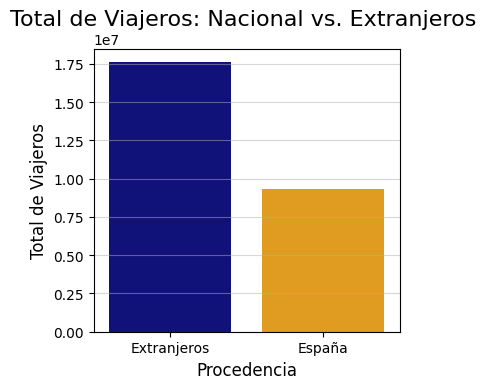

In [29]:
#  Agrupació global: 

df_nacionalidad_global = df_nac_extranjero.groupby('pais_residencia')['total_viajeros'].sum().reset_index()

# Ordenar 
df_nacionalidad_global = df_nacionalidad_global.sort_values(
    by='total_viajeros', ascending=False
)

# ---  Visualitzación ---

plt.figure(figsize=(4,4))

sns.barplot(
    data=df_nacionalidad_global, 
    x='pais_residencia', 
    y='total_viajeros',
    hue='pais_residencia', 
    legend=False,
    palette=['darkblue', 'orange']
)

plt.title('Total de Viajeros: Nacional vs. Extranjeros ', fontsize=16)
plt.xlabel('Procedencia', fontsize=12)
plt.ylabel('Total de Viajeros', fontsize=12)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()

### % total viajeros España/Extranjeros !!

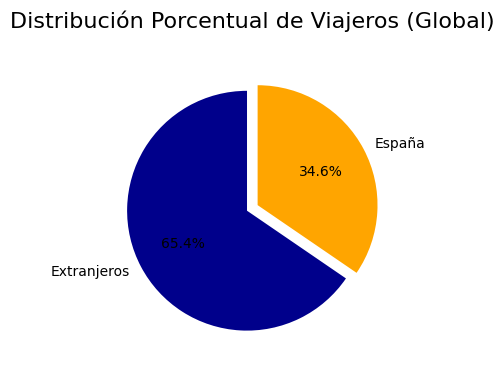

In [ ]:
#  Calcular (%)
total_global = df_nacionalidad_global['total_viajeros'].sum()
df_nacionalidad_global['porcentaje'] = (df_nacionalidad_global['total_viajeros'] / total_global) * 100

# Preparar etiquetas y valores del grafico
etiquetas = df_nacionalidad_global['pais_residencia']
valores = df_nacionalidad_global['porcentaje']

# --- Visualitzación --- 

plt.figure(figsize=(4,4))

plt.pie(
    valores, 
    labels=etiquetas, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['darkblue', 'orange'], 
    explode=[0.05] * len(valores) 
)

plt.title('Distribución Porcentual de Viajeros (Global)', fontsize=16)

plt.axis('equal') 

plt.tight_layout()
plt.show()

### Media Mensual de Viajeros: España vs. Extranjero (Período 2015-2019)  !!

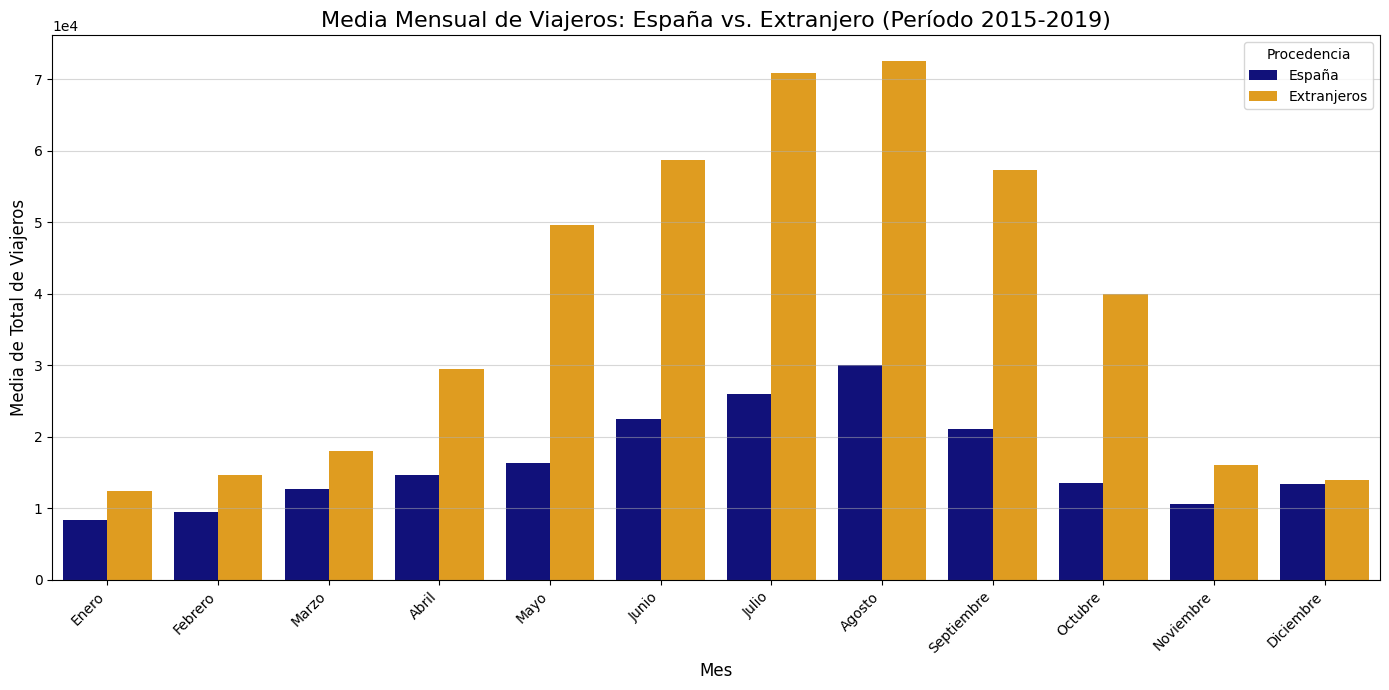

In [31]:
# --- 1. Filtrar, Preparar y Agrupar Datos ---

# 1. Filtrar datos para el período 2015-2019
df_pre_pandemia = df_nac_extranjero[df_nac_extranjero['año'].between(2015, 2019)].copy()

# 2. Asegurar la columna 'mes' ordenada
orden_meses = [
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
]
df_pre_pandemia['mes'] = pd.Categorical(
    df_pre_pandemia['mes'], 
    categories=orden_meses, 
    ordered=True
)

# 3. Agrupación CLAVE: Calcular la media de 'total_viajeros' por Mes y pais_residencia
df_media_mensual = df_pre_pandemia.groupby(['mes', 'pais_residencia'])['total_viajeros'].mean().reset_index()


# --- 2. Visualización (Gráfico de Barres Agrupadas) ---

plt.figure(figsize=(14, 7))

sns.barplot(
    data=df_media_mensual, 
    x='mes', 
    y='total_viajeros',
    hue='pais_residencia', # Usamos la nueva columna temporal para diferenciar
    palette=['darkblue', 'orange'] 
)

# 3. Configuración del Gráfico
plt.title('Media Mensual de Viajeros: España vs. Extranjero (Período 2015-2019)', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Media de Total de Viajeros', fontsize=12)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) 
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.legend(title='Procedencia')

plt.tight_layout()
plt.show()

Conclusiones: La tendencia general en los viajeros consiste en un incremento estacional en los meses de verano, siendo el grupo nacional más homogeneo en su distribución anual.

### Total de Viajeros Nacionales vs. Extranjeros por Mes y Año

C:\Users\irene\AppData\Local\Temp\ipykernel_30892\2872659.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nac_extranjero['mes'] = pd.Categorical(
C:\Users\irene\AppData\Local\Temp\ipykernel_30892\2872659.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_nac_extranjeros_mensual = df_nac_extranjero.groupby(['año', 'mes', 'pais_residencia'])['total_viajeros'].sum().reset_index()
C:\Users\irene\AppData\Local\Temp\ipykernel_30892\2872659.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or 

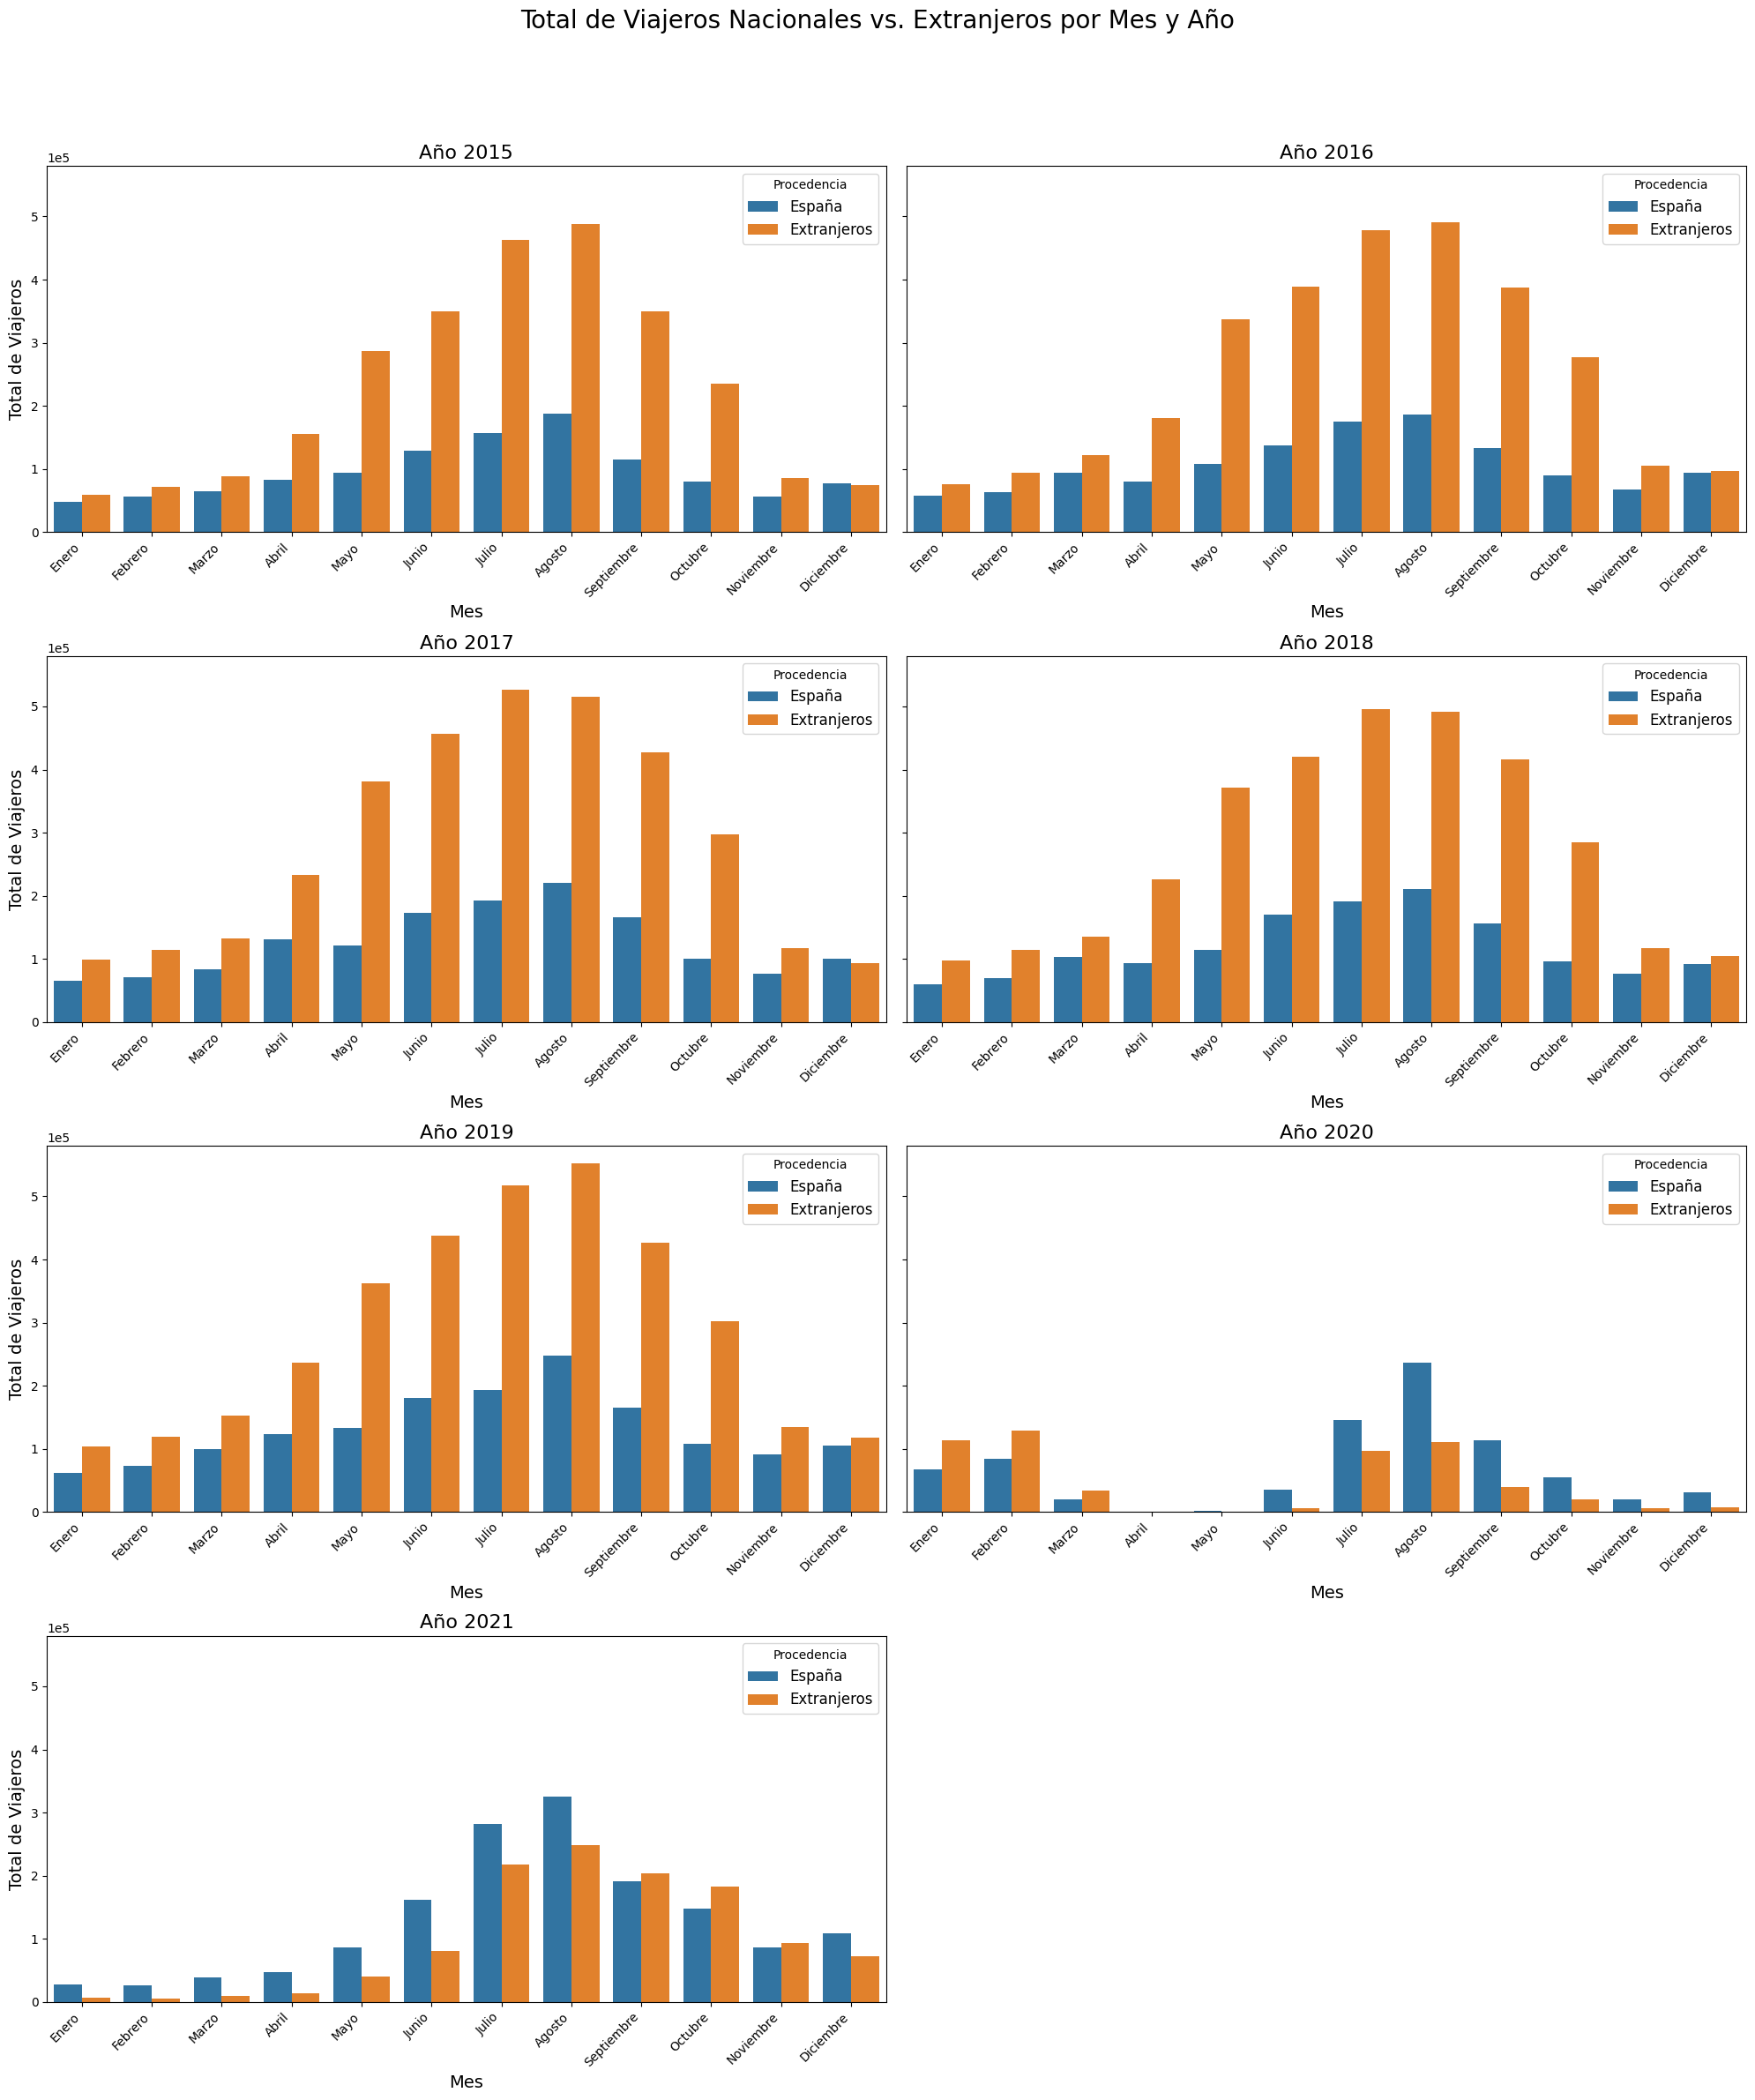

In [15]:
# --- 1. Preparación de Datos y Creación de Categorías Ordenadas ---

# Definir el orden correcto de los meses en español
orden_meses = [
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
]

# Convertir la columna 'mes' a tipo Categórico Ordenado
df_nac_extranjero['mes'] = pd.Categorical(
    df_nac_extranjero['mes'], 
    categories=orden_meses, 
    ordered=True)

# Agrupación
df_nac_extranjeros_mensual = df_nac_extranjero.groupby(['año', 'mes', 'pais_residencia'])['total_viajeros'].sum().reset_index()


# Obtener la lista de años para iterar
años_unicos = sorted(df_nac_extranjeros_mensual['año'].unique())
n_años = len(años_unicos)

# --- 2. Visualización ---

# Calcular el número de filas necesarias (usando math.ceil para redondear hacia arriba)
ncols = 2
nrows = math.ceil(n_años / ncols)

# Crea la figura y los ejes con la nueva estructura
# Ajustamos figsize para que los gráficos individuales sean más grandes (ej: 10x6)
fig, axes = plt.subplots(
    nrows=nrows, 
    ncols=ncols, 
    figsize=(ncols * 10, nrows * 6), # ¡Ajuste de tamaño aquí!
    sharey=True
)
plt.suptitle('Total de Viajeros Nacionales vs. Extranjeros por Mes y Año', fontsize=20, y=1.02)

# Aplanar el array de ejes si hay varias filas/columnas para poder iterar sobre él
axes = axes.flatten()

for i, año in enumerate(años_unicos):
    df_temp = df_nac_extranjeros_mensual[df_nac_extranjeros_mensual['año'] == año]
    
    # 1. Dibujar el gráfico de barras
    sns.barplot(
        ax=axes[i],
        data=df_temp,
        x='mes',
        y='total_viajeros',
        hue='pais_residencia',
    )
    
    # 2. Configuración del Eje X: Usar tick_params solo para la rotación
    axes[i].tick_params(axis='x', rotation=45) 
    
    # 3. Configuración del Eje X: Usar set_xticklabels para la alineación horizontal (ha)
    # Obtenemos las etiquetas existentes (nombres de los meses)
    tick_labels = axes[i].get_xticklabels()
    # Las re-establecemos con la rotación y alineación correctas
    axes[i].set_xticklabels(tick_labels, rotation=45, ha='right') 
    
    axes[i].set_title(f'Año {año}', fontsize=16)
    axes[i].set_xlabel('Mes', fontsize=14)
    axes[i].set_ylabel('Total de Viajeros', fontsize=14)
    axes[i].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axes[i].legend(title='Procedencia', fontsize=12)

# Ocultar los ejes sobrantes (si n_años no es par)
for j in range(n_años, nrows * ncols):
    fig.delaxes(axes[j])
    
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Ajuste final para mejorar el espaciado
plt.show()

## Total de Viajeros por Mes, Año y País de Residencia (df_paises)

C:\Users\irene\AppData\Local\Temp\ipykernel_30892\1651628047.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paises['mes'] = pd.Categorical(
C:\Users\irene\AppData\Local\Temp\ipykernel_30892\1651628047.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(tick_labels, rotation=45, ha='right')
C:\Users\irene\AppData\Local\Temp\ipykernel_30892\1651628047.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(tick_labels, rotation=45, ha='right')
C:\Users\irene\AppData\Local\Temp\ipykernel_30892\1651628047.py:69: UserWarning: set_ti

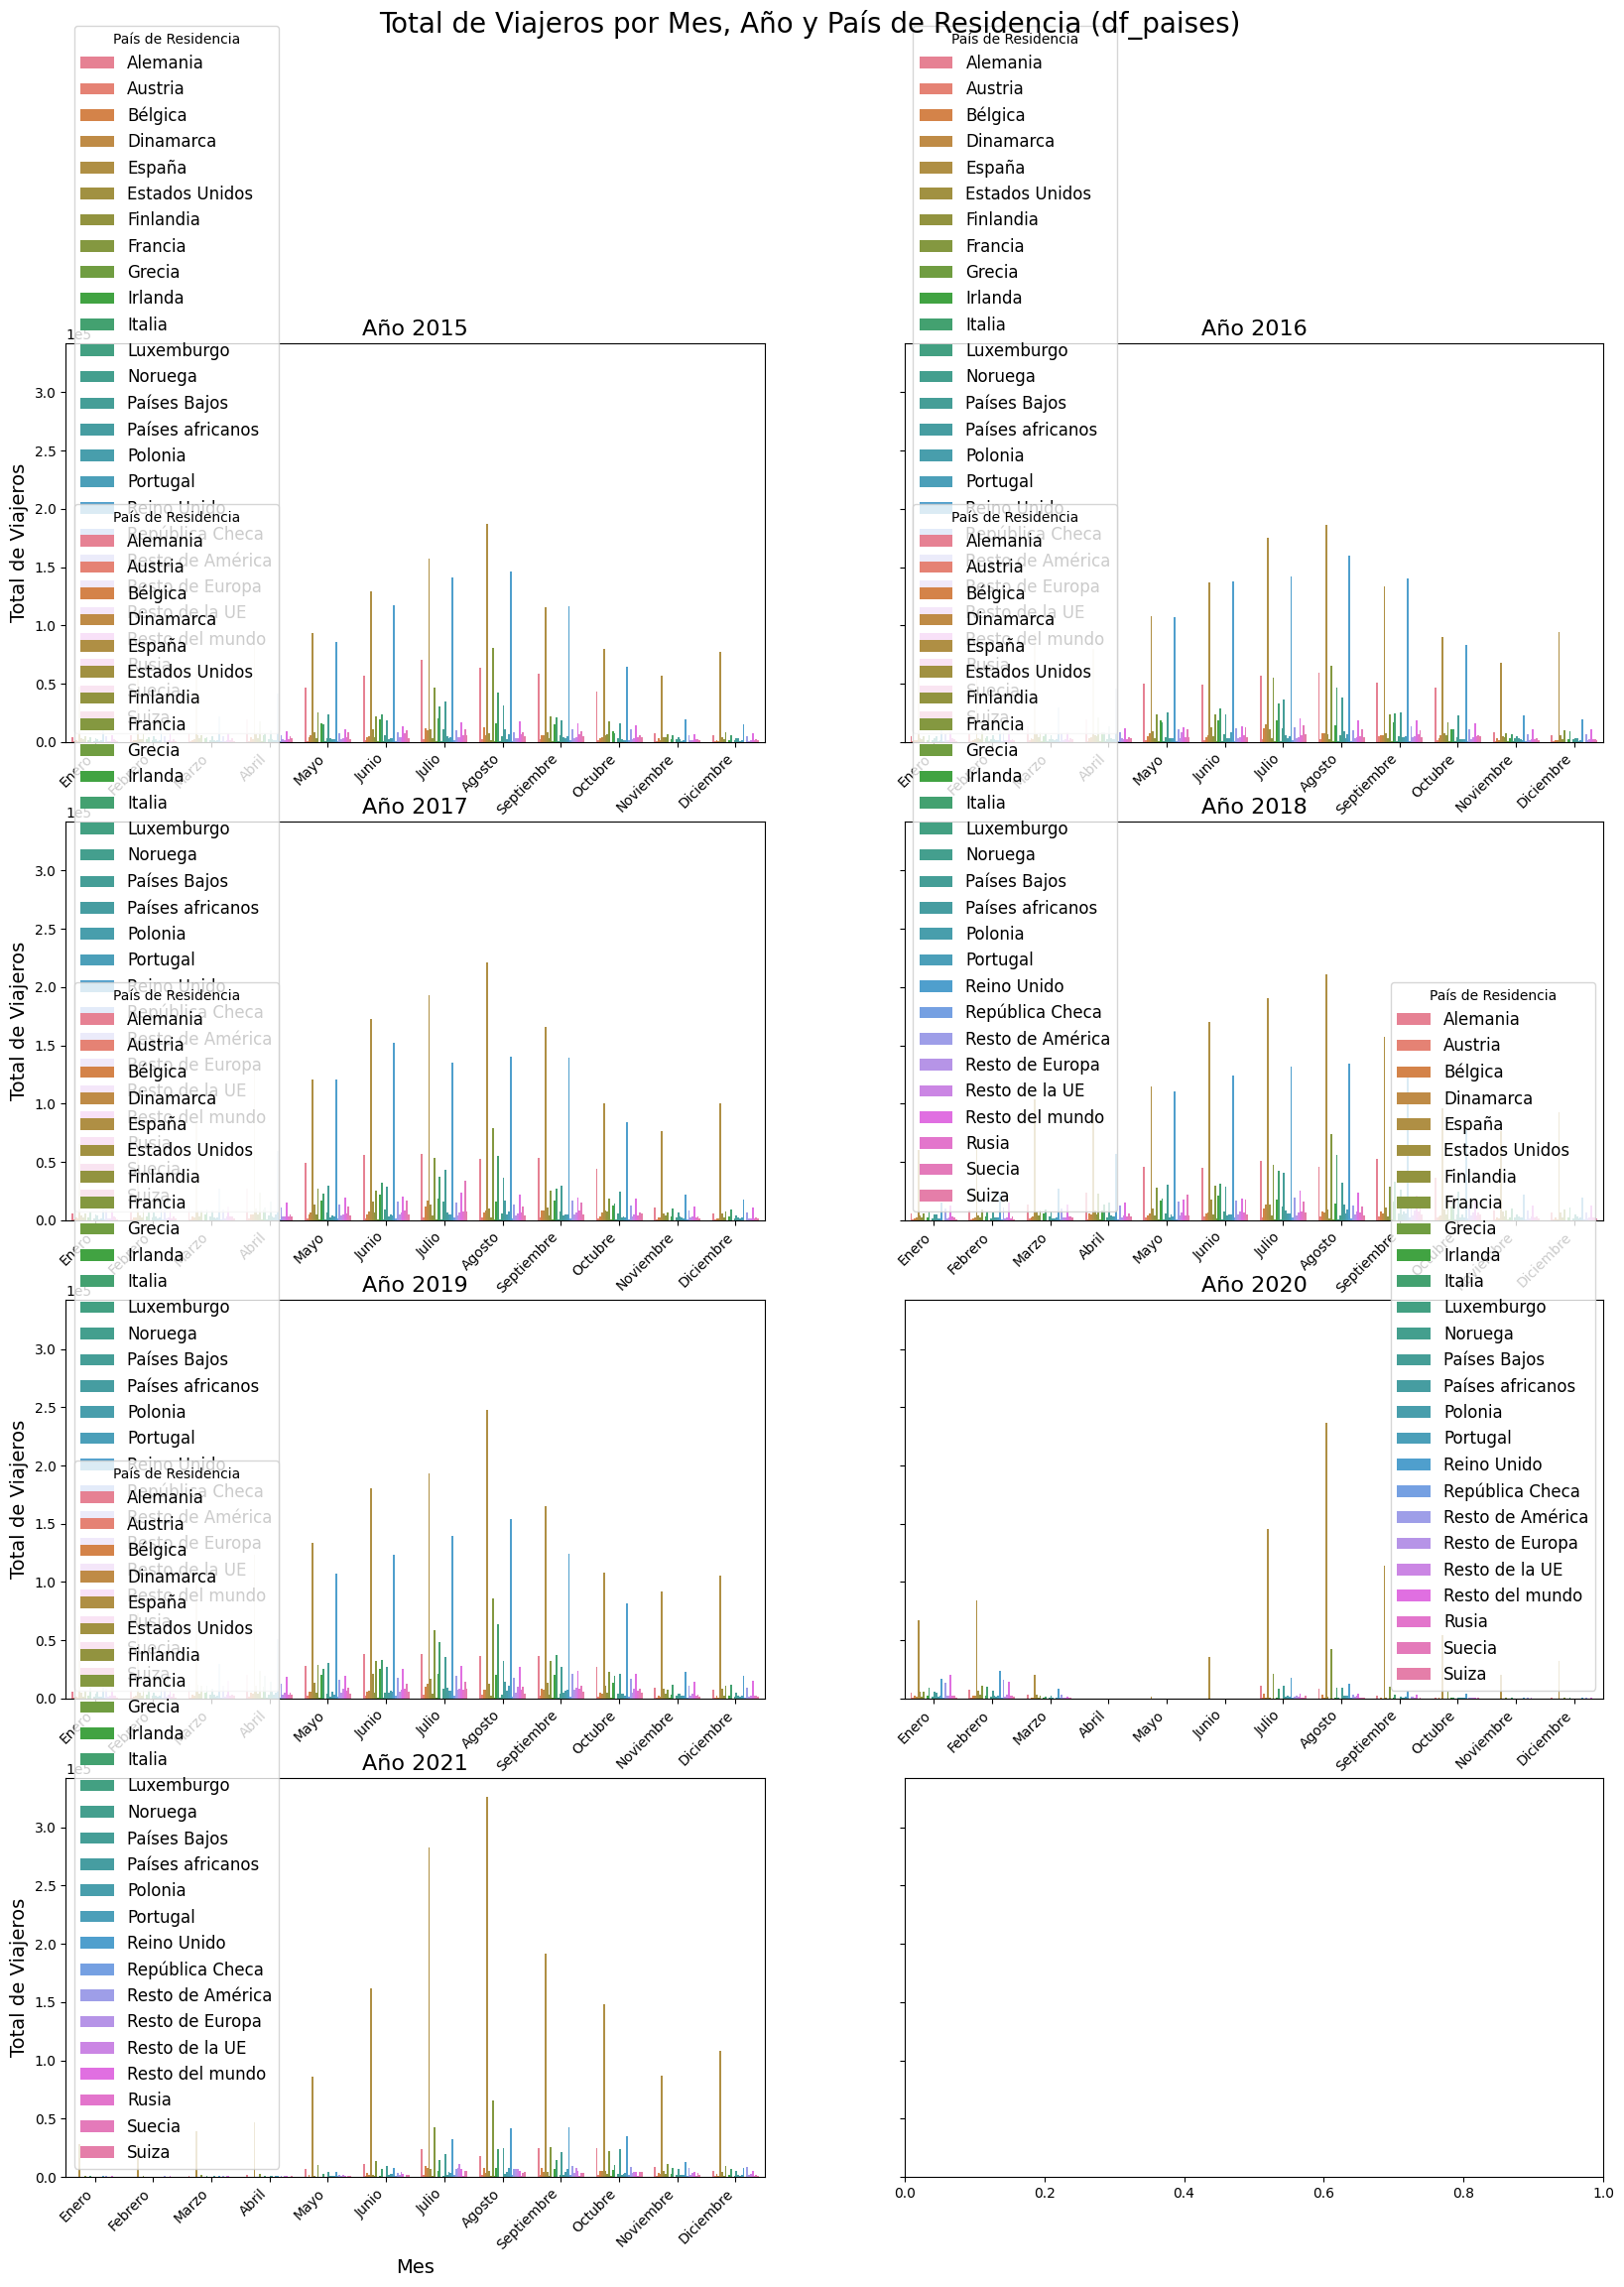

In [16]:
import warnings
# Esto ignora todas las FutureWarnings de todas las librerías
warnings.simplefilter(action='ignore', category=FutureWarning)

# --- 1. Preparación de Datos y Creación de Categorías Ordenadas ---

# Definir el orden correcto de los meses en español
orden_meses = [
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
]

# Convertir la columna 'mes' a tipo Categórico Ordenado para df_paises
# Esto es CRUCIAL para que los meses se ordenen correctamente.
df_paises['mes'] = pd.Categorical(
    df_paises['mes'], 
    categories=orden_meses, 
    ordered=True
)

# Agrupación: Agrupamos por año, mes y país de residencia, sumando el total de viajeros
df_paises_mensual = df_paises.groupby(['año', 'mes', 'pais_residencia'])['total_viajeros'].sum().reset_index()


# Obtener la lista de años para iterar
años_unicos = sorted(df_paises_mensual['año'].unique())
n_años = len(años_unicos)

# --- 2. Visualización con Estructura de 2 Columnas ---

# Calcular el número de filas necesarias
ncols = 2
nrows = math.ceil(n_años / ncols)

# Crea la figura y los ejes con la nueva estructura
fig, axes = plt.subplots(
    nrows=nrows, 
    ncols=ncols, 
    figsize=(ncols * 10, nrows * 6), # Ajuste de tamaño
    sharey=True
)
plt.suptitle('Total de Viajeros por Mes, Año y País de Residencia (df_paises)', fontsize=20, y=1.02)

# Gestión Robusta de Ejes (Asegura que 'axes' sea un array plano)
if n_años == 1:
    axes = [axes] # Si solo hay un año, lo convertimos en lista
elif n_años > 1:
    axes = axes.flatten() # Si hay varios, lo aplanamos

for i, año in enumerate(años_unicos):
    df_temp = df_paises_mensual[df_paises_mensual['año'] == año]
    
    # Nos aseguramos de que el índice 'i' sea válido
    if i < len(axes):
        # 1. Dibujar el gráfico de barras (usando 'pais_residencia' para el hue)
        sns.barplot(
            ax=axes[i],
            data=df_temp,
            x='mes',
            y='total_viajeros',
            hue='pais_residencia', # Utiliza directamente la columna para diferenciar
        )
        
        # 2. Configuración del Eje X: Usar tick_params solo para la rotación
        axes[i].tick_params(axis='x', rotation=45) 
        
        # 3. Configuración del Eje X: Usar set_xticklabels para la alineación horizontal (ha)
        tick_labels = axes[i].get_xticklabels()
        axes[i].set_xticklabels(tick_labels, rotation=45, ha='right') 
        
        axes[i].set_title(f'Año {año}', fontsize=16)
        axes[i].set_xlabel('Mes', fontsize=14)
        axes[i].set_ylabel('Total de Viajeros', fontsize=14)
        axes[i].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        # Nota: Si el número de países es muy alto, la leyenda puede ser ilegible.
        axes[i].legend(title='País de Residencia', fontsize=12)

# Ocultar los ejes sobrantes (si n_años no es par)

# top 10 paises de procedencia (sin españa)  !!

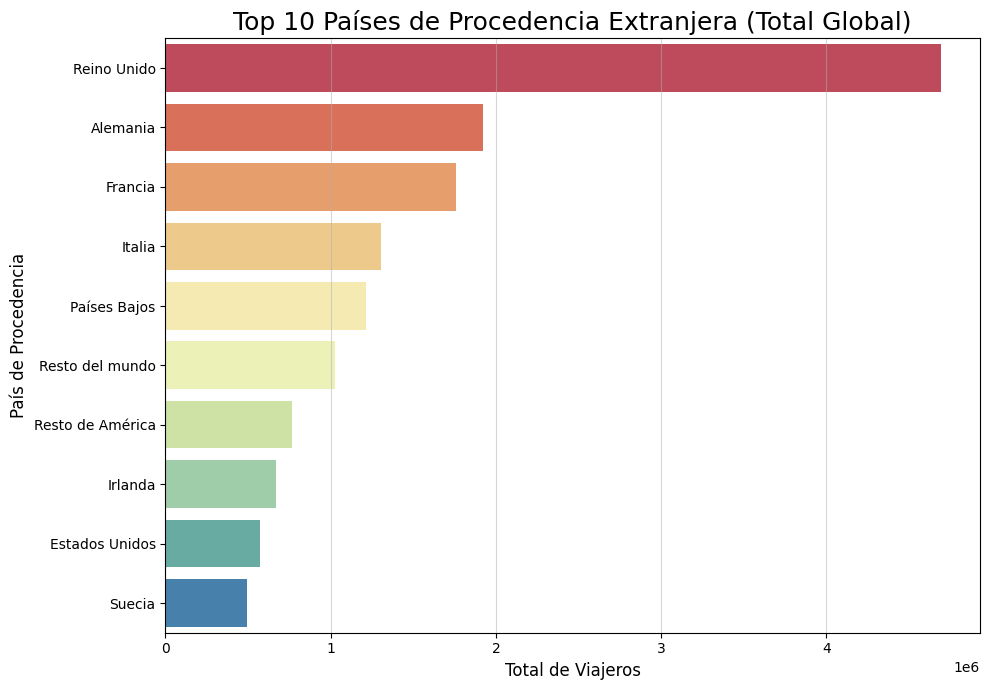

In [38]:
# --- 1. Preparación y Agrupación de Datos Globales ---

# 1. Agrupación global: Suma de 'total_viajeros' solo por 'pais_residencia'
df_top_base_global = df_paises.groupby('pais_residencia')['total_viajeros'].sum().reset_index()

# 2. Excluir España
df_top_base_extranjero = df_top_base_global[df_top_base_global['pais_residencia'] != 'España'].copy()

# 3. Obtener el Top 10 Global
df_top_10_extranjero = df_top_base_extranjero.sort_values(
    by='total_viajeros', 
    ascending=False
).head(10)

# --- 2. Generación del Gráfico Único ---

plt.figure(figsize=(10, 7))

# Dibujar el gráfico de barras horizontal
sns.barplot(
    data=df_top_10_extranjero, 
    x='total_viajeros', 
    y='pais_residencia',
    hue='pais_residencia', # Necesario para la paleta sin generar error
    legend=False,
    palette='Spectral'
)

# Configuración del Gráfico
plt.title('Top 10 Países de Procedencia Extranjera (Total Global)', fontsize=18)
plt.xlabel('Total de Viajeros', fontsize=12)
plt.ylabel('País de Procedencia', fontsize=12)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # Formato científico para el eje X
plt.grid(axis='x', alpha=0.5)

plt.tight_layout()
plt.show()

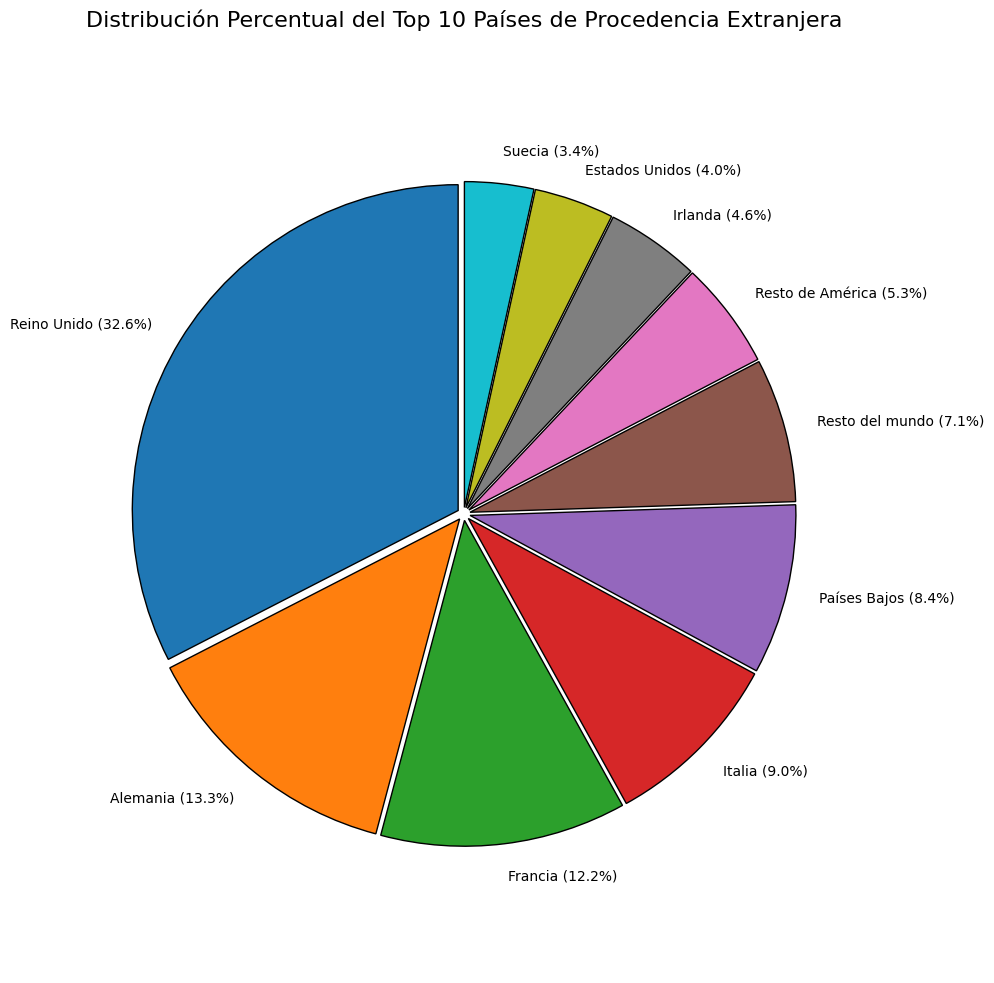

In [40]:
# Calcular el porcentaje que cada país representa *dentro* del Top 10
total_top_10_extranjero = df_top_10_extranjero['total_viajeros'].sum()
df_top_10_extranjero['porcentaje'] = (df_top_10_extranjero['total_viajeros'] / total_top_10_extranjero) * 100

# Preparar etiquetas: País + Porcentaje
etiquetas = [
    f"{row['pais_residencia']} ({row['porcentaje']:.1f}%)" 
    for index, row in df_top_10_extranjero.iterrows()
]
valores = df_top_10_extranjero['porcentaje']

# --- 2. Visualización (Gráfico de Pastís) --- 

plt.figure(figsize=(10, 10))

# Crear el gráfico circular
plt.pie(
    valores, 
    labels=etiquetas, 
    # No usamos autopct aquí porque la etiqueta ya incluye el porcentaje
    startangle=90, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}, # Contornos para mejorar la visibilidad
    explode=[0.02] * 10 # Separa ligeramente las porciones
)

# Configuración del Gráfico
plt.title('Distribución Percentual del Top 10 Países de Procedencia Extranjera', fontsize=16, pad=20)

# Asegura que el pastís sea un círculo
plt.axis('equal') 

plt.tight_layout()
plt.show()

# top 10 copn españa

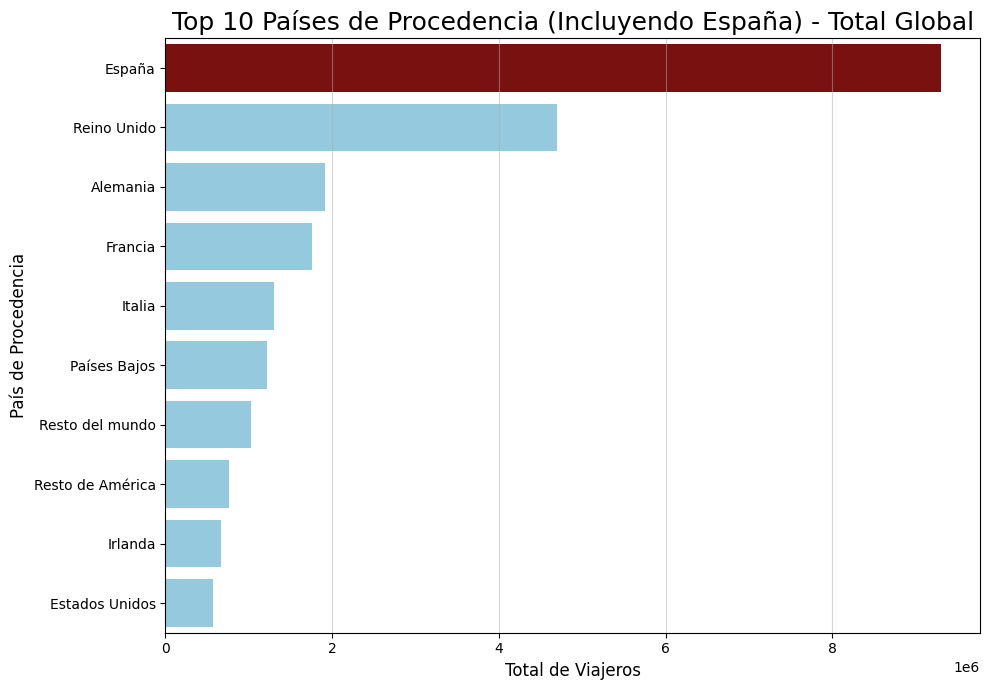

In [32]:
# --- 1. Preparación y Agrupación de Datos Globales ---

# 1. Agrupación global: Suma de 'total_viajeros' solo por 'pais_residencia'
# NOTA: NO se filtra 'España' en este paso.
df_top_base_global = df_paises.groupby('pais_residencia')['total_viajeros'].sum().reset_index()

# 2. Obtener el Top 10 Global (Incluyendo España)
df_top_10_global = df_top_base_global.sort_values(
    by='total_viajeros', 
    ascending=False
).head(10)

# --- 2. Generación del Gráfico Único ---

plt.figure(figsize=(10, 7))

# Definir una paleta personalizada para destacar a España si está en el Top 10
def create_custom_palette(df):
    colores = []
    # Itera sobre los países del Top 10
    for pais in df['pais_residencia']:
        if pais == 'España':
            colores.append('darkred') # Rojo oscuro para España
        else:
            colores.append('skyblue') # Color estándar para otros
    return colores

# Dibujar el gráfico de barras horizontal
sns.barplot(
    data=df_top_10_global, 
    x='total_viajeros', 
    y='pais_residencia',
    hue='pais_residencia', 
    legend=False,
    palette=create_custom_palette(df_top_10_global) # Usar paleta personalizada
)

# Configuración del Gráfico
plt.title('Top 10 Países de Procedencia (Incluyendo España) - Total Global', fontsize=18)
plt.xlabel('Total de Viajeros', fontsize=12)
plt.ylabel('País de Procedencia', fontsize=12)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # Formato científico para el eje X
plt.grid(axis='x', alpha=0.5)

plt.tight_layout()
plt.show()

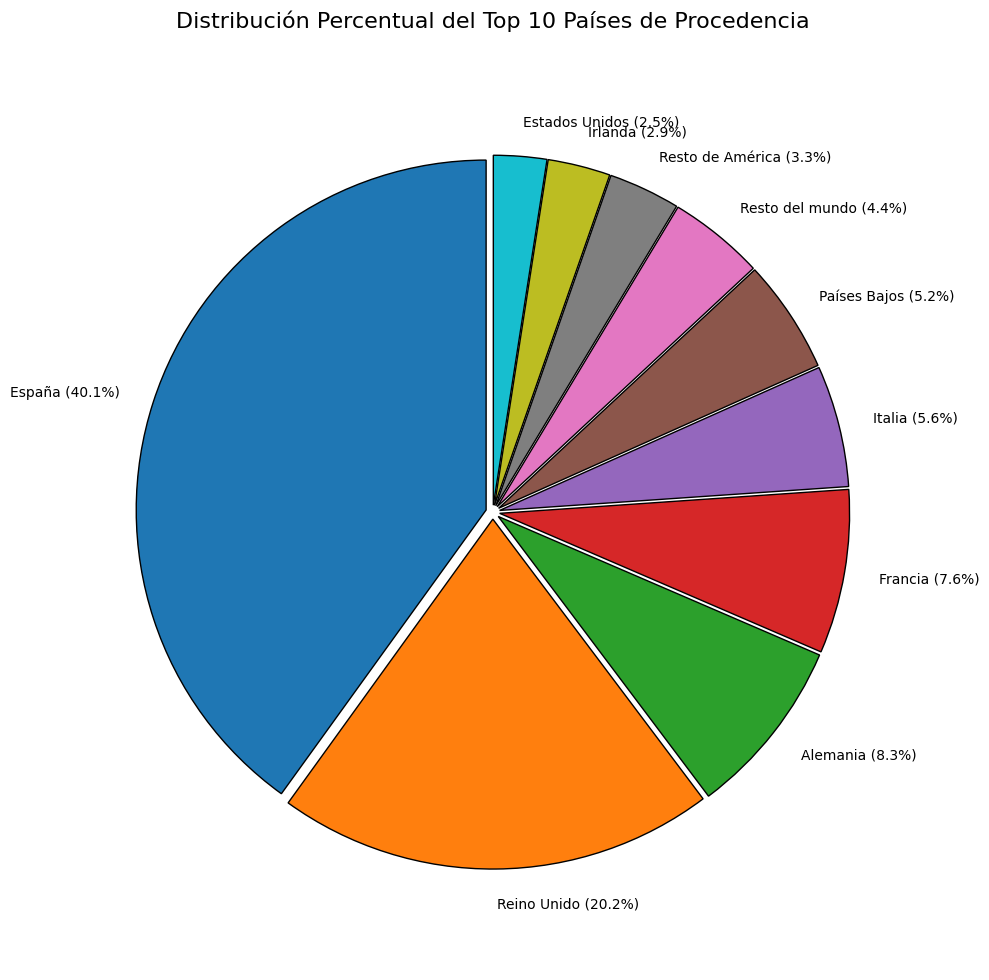

In [ ]:


# Calcular el porcentaje que cada país representa *dentro* del Top 10
total_top_10 = df_top_10_global['total_viajeros'].sum()
df_top_10_global['porcentaje'] = (df_top_10_global['total_viajeros'] / total_top_10) * 100

# Preparar etiquetas: País + Porcentaje
etiquetas = [
    f"{row['pais_residencia']} ({row['porcentaje']:.1f}%)" 
    for index, row in df_top_10_global.iterrows()
]
valores = df_top_10_global['porcentaje']

# --- Visualización (Gráfico de Pastís) --- 

plt.figure(figsize=(10,10))

plt.pie(
    valores, 
    labels=etiquetas, 
    # No usamos autopct aquí porque la etiqueta ya incluye el porcentaje
    startangle=90, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}, 
    explode=[0.02] * 10 
)

# Configuración del Gráfico
plt.title('Distribución Percentual del Top 10 Países de Procedencia', fontsize=16, pad=20)

# Asegura que el pastís sea un círculo
plt.axis('equal') 

plt.tight_layout()
plt.show()

# Evolución anual para el top 10 paises de procedencia 


## (solo extranjeros)

In [19]:
import warnings
# Esto ignora todas las FutureWarnings de todas las librerías
warnings.simplefilter(action='ignore', category=FutureWarning)

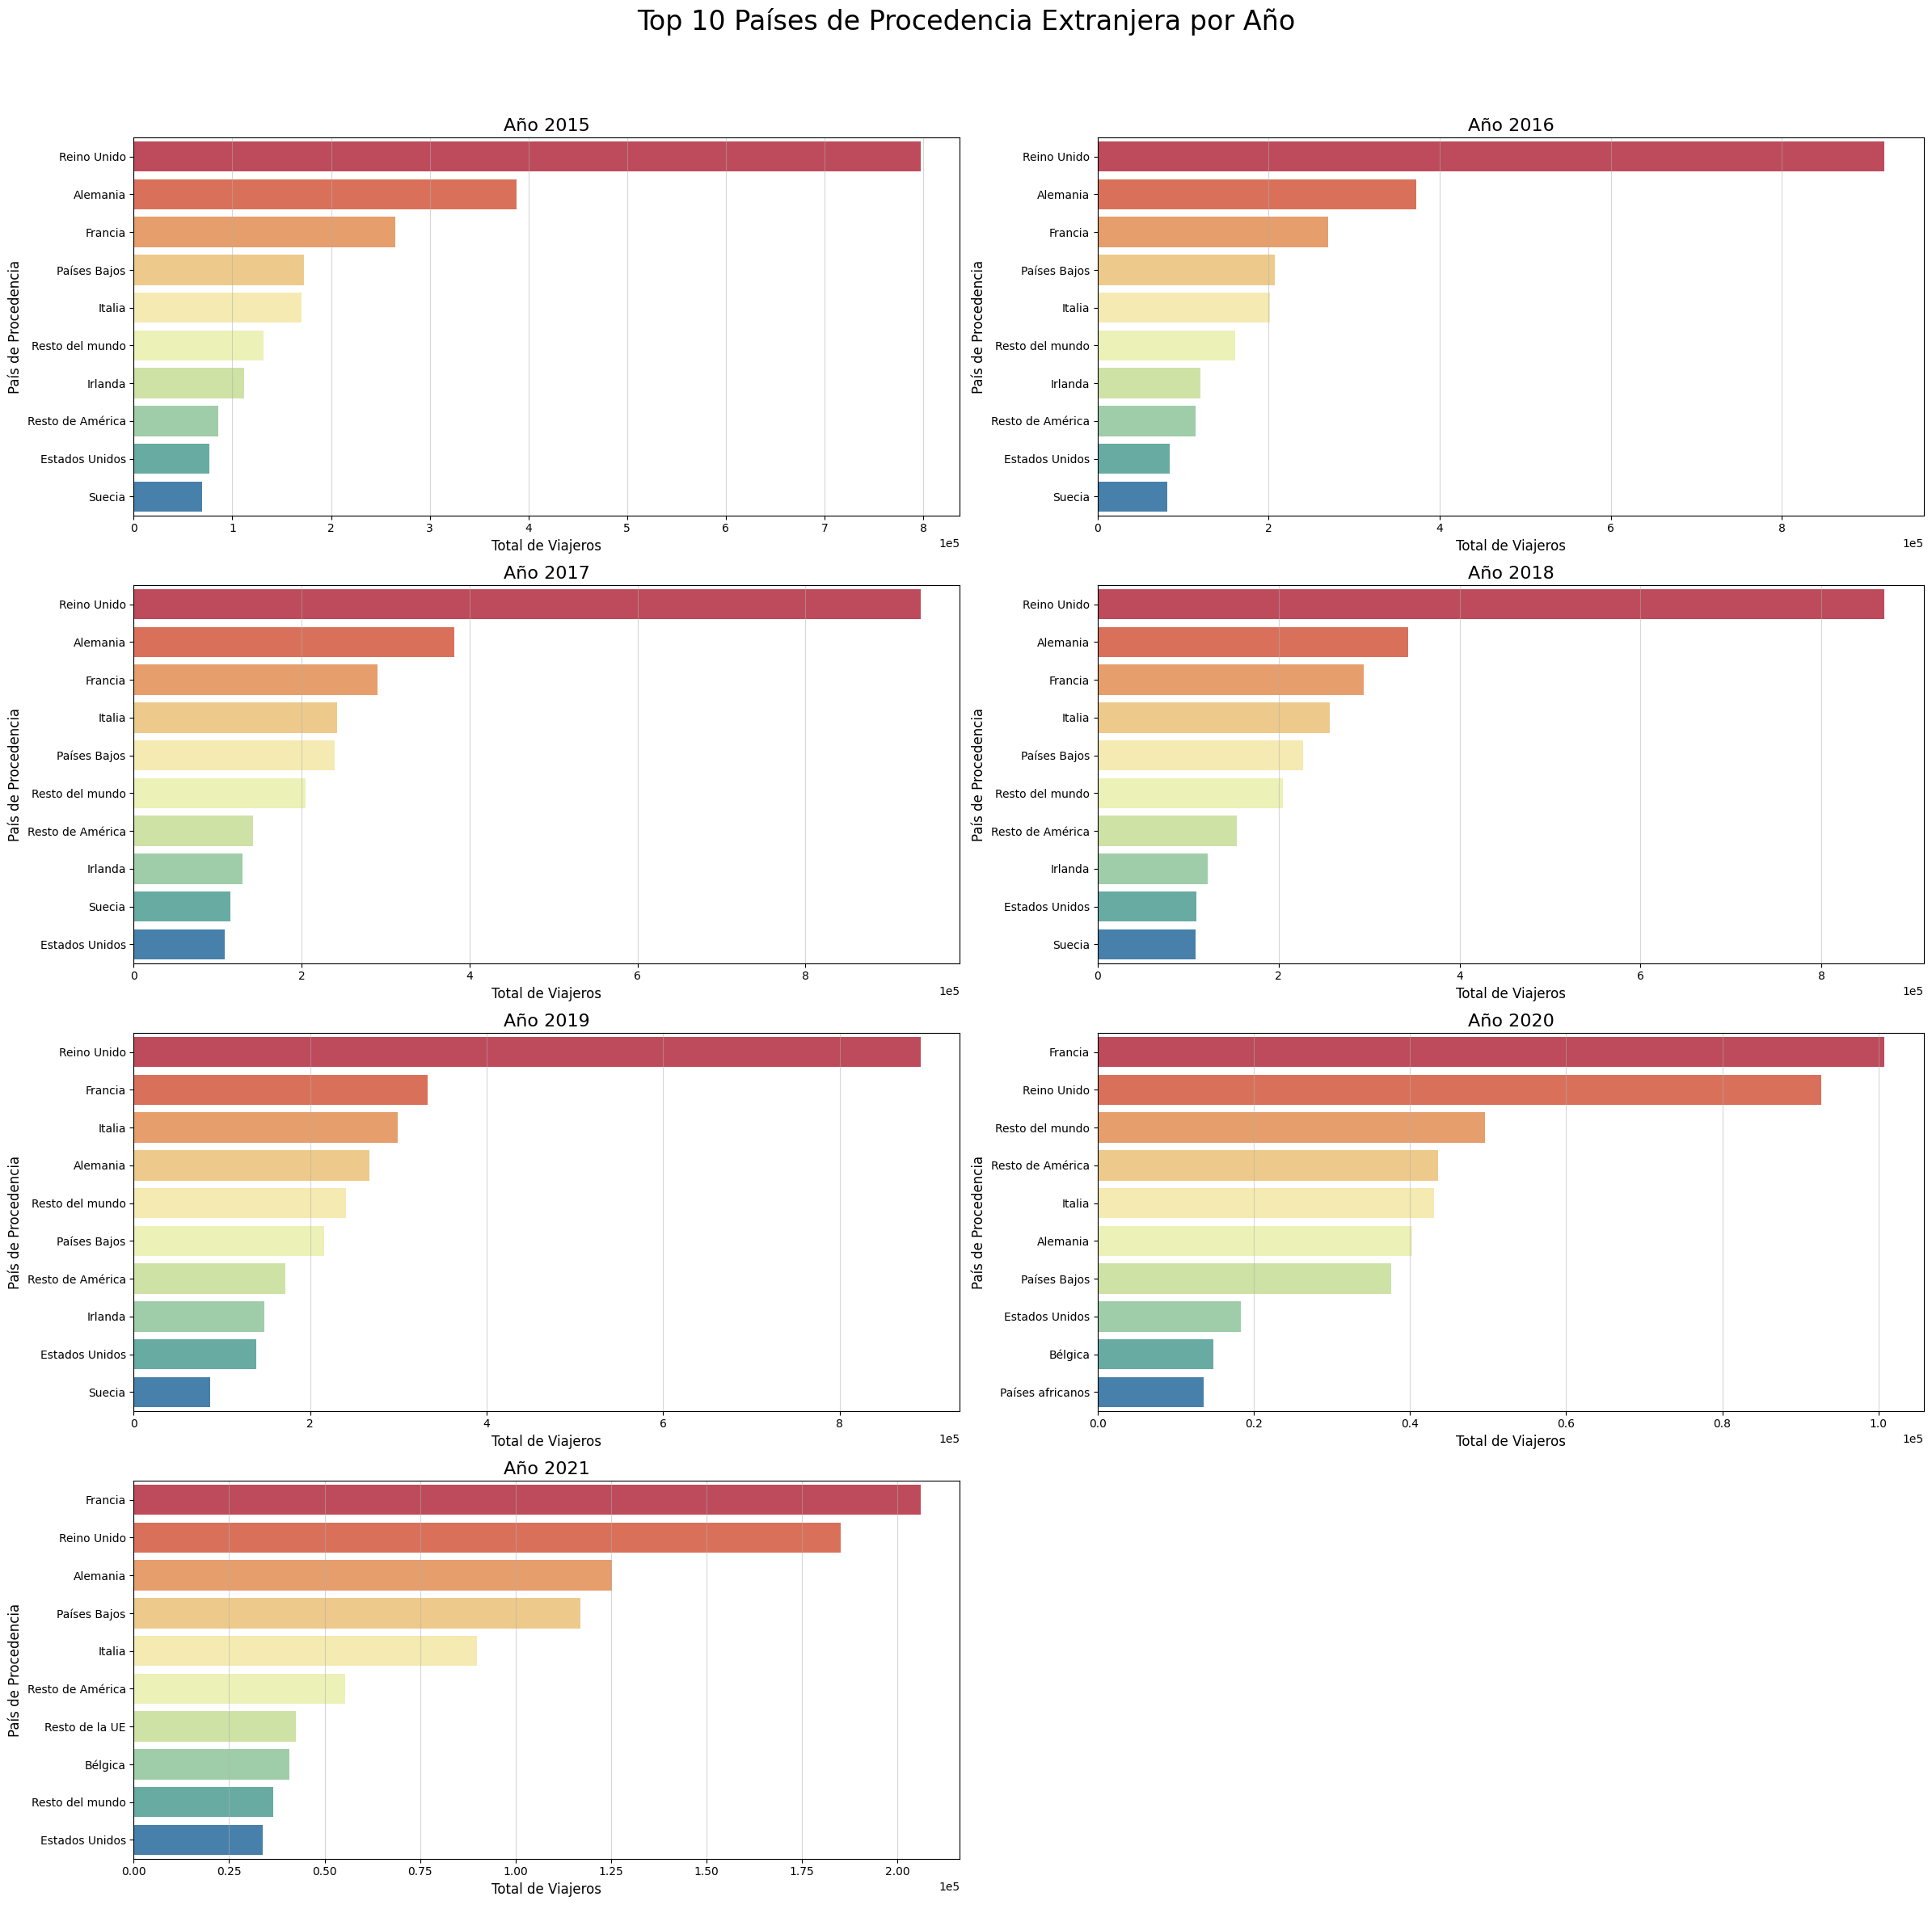

In [20]:
# --- 1. Preparación y Agrupación de Datos ---

# Agrupación base: Suma de viajeros por Año y País
df_top_base_anual = df_paises.groupby(['año', 'pais_residencia'])['total_viajeros'].sum().reset_index()

# Obtener la lista de años para iterar
años_unicos = sorted(df_top_base_anual['año'].unique())
n_años = len(años_unicos)

# --- 2. Generación de Gráficos (Estructura 2 Columnas) ---

# Calcular el número de filas necesarias
ncols = 2
nrows = math.ceil(n_años / ncols)

fig, axes = plt.subplots(
    nrows=nrows, 
    ncols=ncols, 
    figsize=(12 * ncols, 6 * nrows), # Tamaño grande para legibilidad
    sharex=False # No comparten el eje X (Viajeros)
)
plt.suptitle('Top 10 Países de Procedencia Extranjera por Año', fontsize=24, y=1.01)

# Gestión Robusta de Ejes
if n_años == 1:
    axes = [axes]
else:
    axes = axes.flatten()

for i, año in enumerate(años_unicos):
    ax = axes[i]
    
    # 2.1 Filtrar el DataFrame por el año actual y excluir España
    df_anual = df_top_base_anual[
        (df_top_base_anual['año'] == año) & 
        (df_top_base_anual['pais_residencia'] != 'España') 
    ].copy()

    # 2.2 Obtener el Top 10 para este año
    # Ordenamos el DataFrame de mayor a menor y tomamos los 10 primeros
    df_top_10 = df_anual.sort_values(by='total_viajeros', ascending=False).head(10)

    # 2.3 Dibujar el gráfico de barras (Horizontal para mejor lectura de países)
    sns.barplot(
        ax=ax, 
        data=df_top_10, 
        x='total_viajeros', 
        y='pais_residencia', 
        palette='Spectral'
    )
    
    # 2.4 Configuración del Eje y Título
    ax.set_title(f'Año {año}', fontsize=16)
    ax.set_xlabel('Total de Viajeros', fontsize=12)
    ax.set_ylabel('País de Procedencia', fontsize=12)
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # Formato científico para el eje X
    ax.grid(axis='x', alpha=0.5)

# 3. Ocultar ejes sobrantes
for j in range(n_años, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

## incluyendo españoles


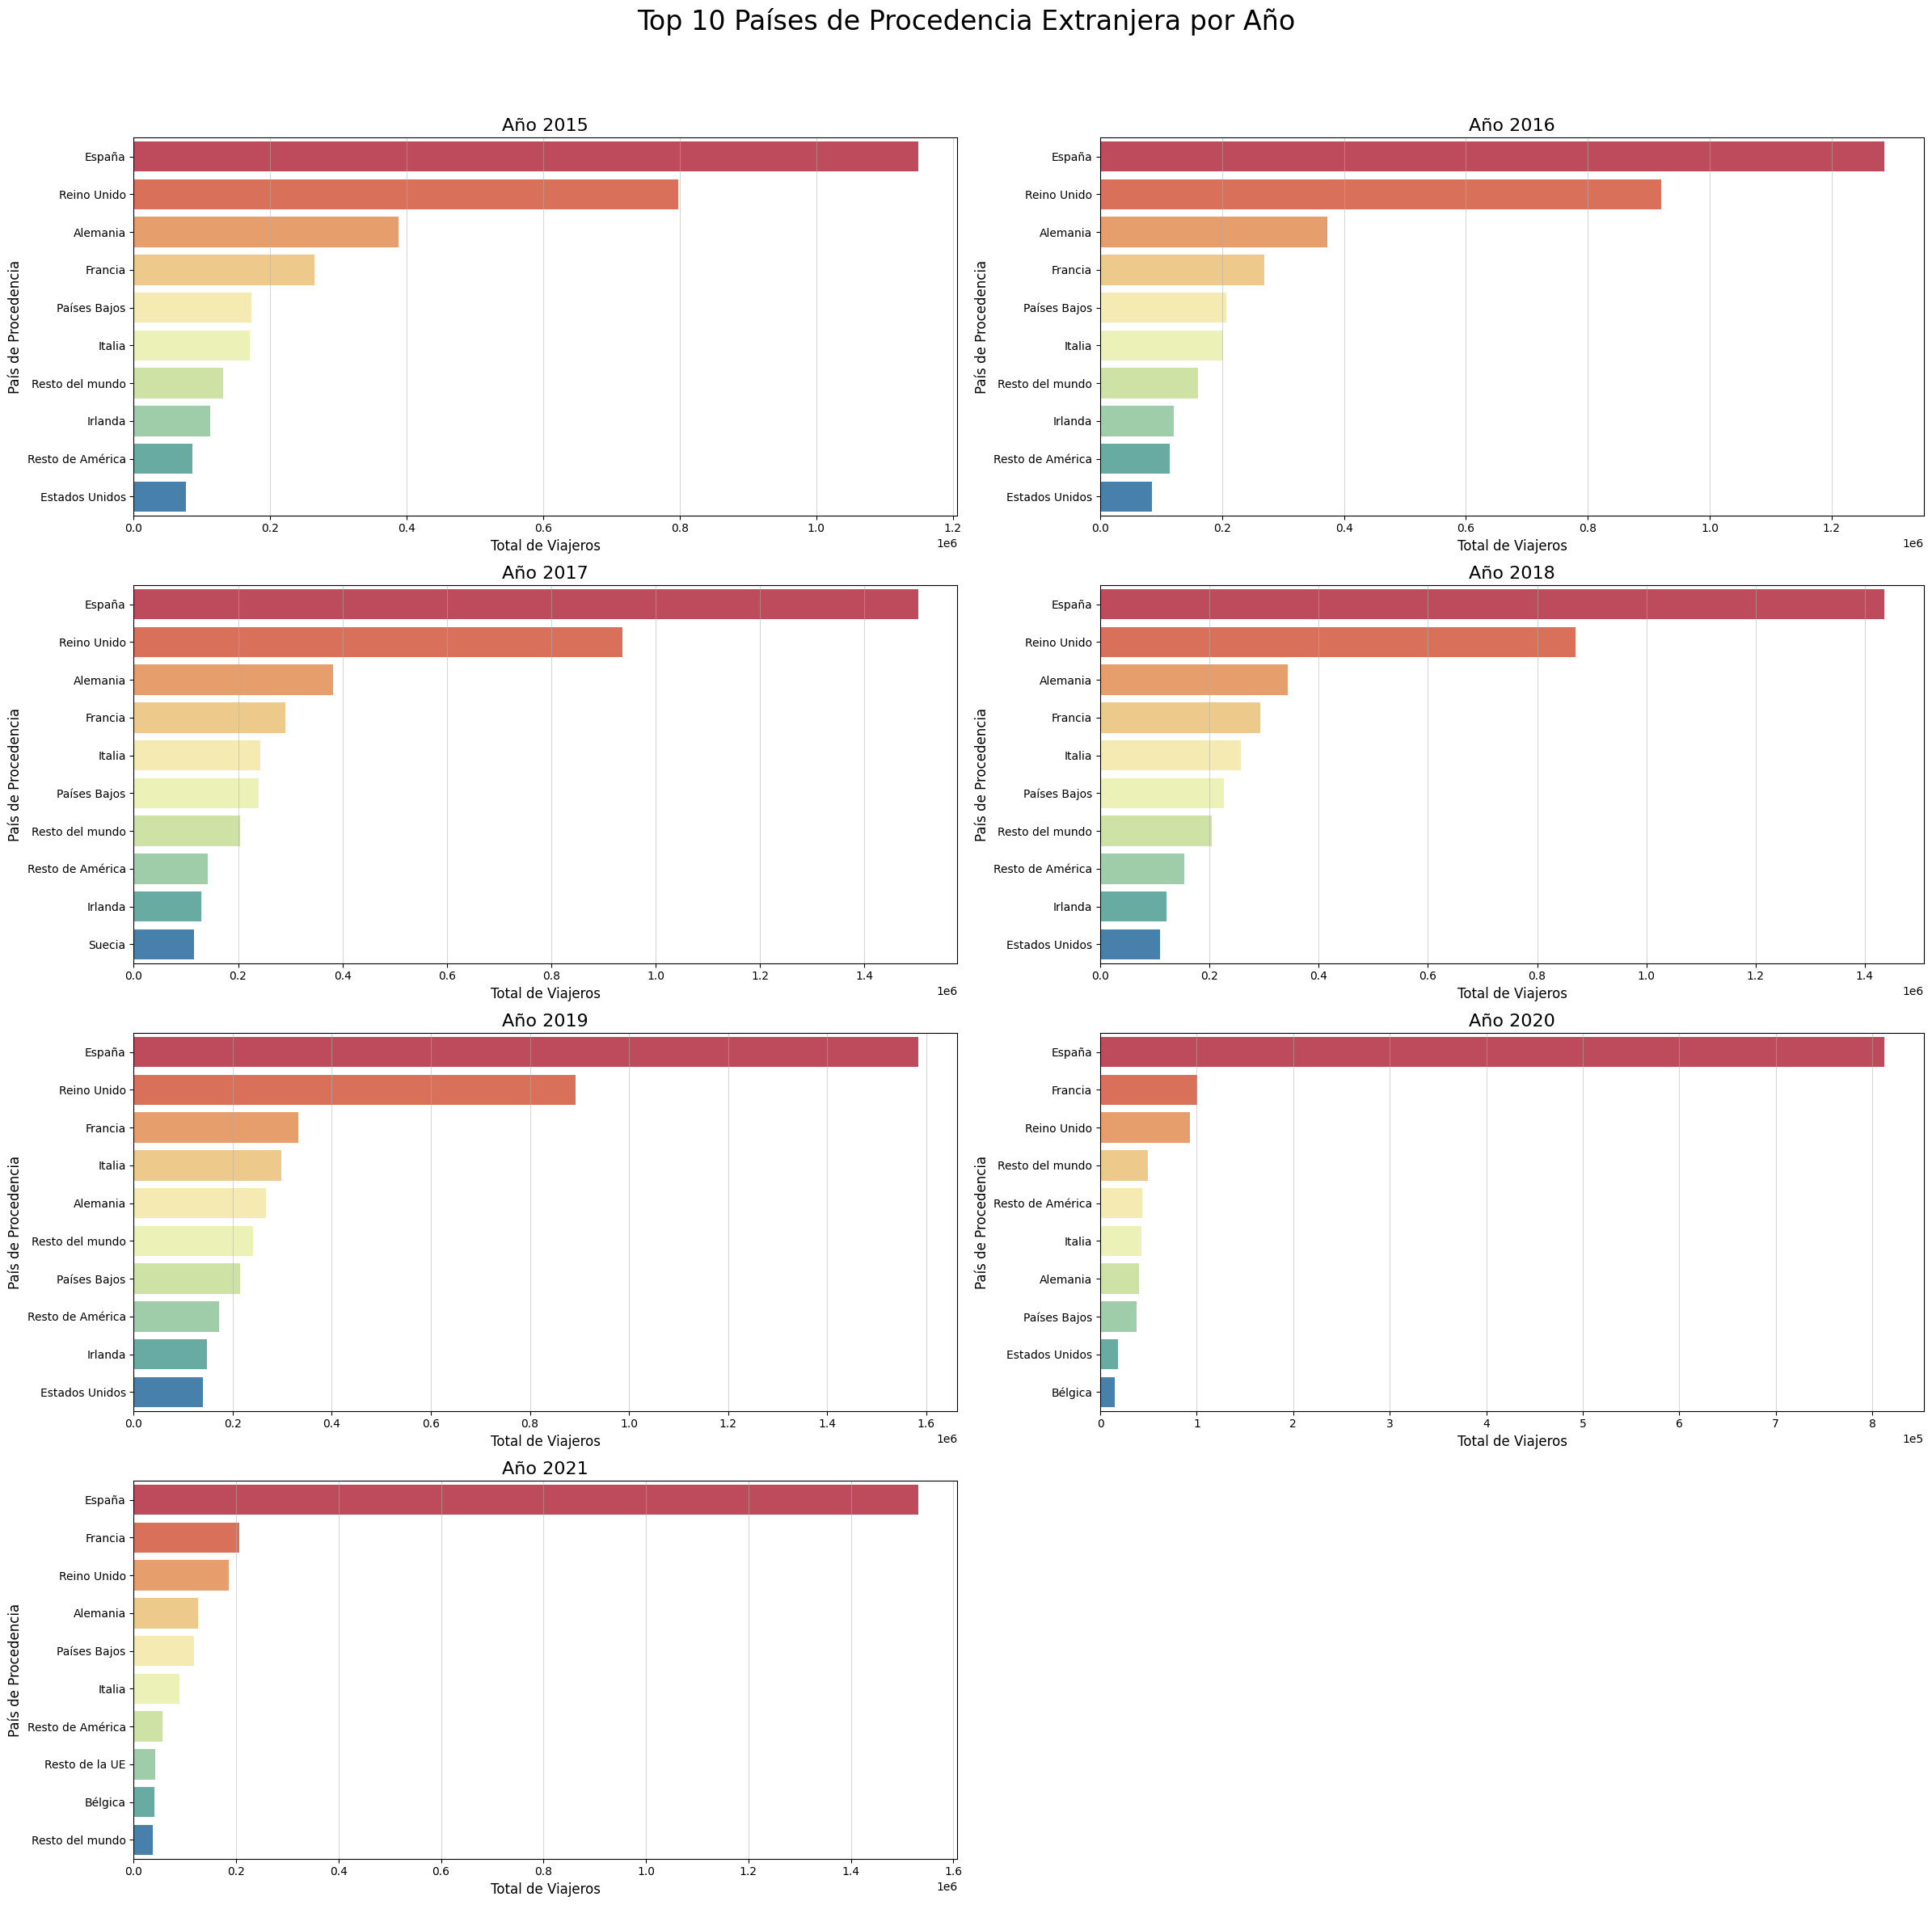

In [21]:
# --- 1. Preparación y Agrupación de Datos ---

# Agrupación base: Suma de viajeros por Año y País
df_top_base_anual = df_paises.groupby(['año', 'pais_residencia'])['total_viajeros'].sum().reset_index()

# Obtener la lista de años para iterar
años_unicos = sorted(df_top_base_anual['año'].unique())
n_años = len(años_unicos)

# --- 2. Generación de Gráficos (Estructura 2 Columnas) ---

# Calcular el número de filas necesarias
ncols = 2
nrows = math.ceil(n_años / ncols)

fig, axes = plt.subplots(
    nrows=nrows, 
    ncols=ncols, 
    figsize=(12 * ncols, 6 * nrows), # Tamaño grande para legibilidad
    sharex=False # No comparten el eje X (Viajeros)
)
plt.suptitle('Top 10 Países de Procedencia Extranjera por Año', fontsize=24, y=1.01)

# Gestión Robusta de Ejes
if n_años == 1:
    axes = [axes]
else:
    axes = axes.flatten()

for i, año in enumerate(años_unicos):
    ax = axes[i]
    
    # 2.1 Filtrar el DataFrame por el año actual y excluir España
    df_anual = df_top_base_anual[
        (df_top_base_anual['año'] == año) 
    ].copy()

    # 2.2 Obtener el Top 10 para este año
    # Ordenamos el DataFrame de mayor a menor y tomamos los 10 primeros
    df_top_10 = df_anual.sort_values(by='total_viajeros', ascending=False).head(10)

    # 2.3 Dibujar el gráfico de barras (Horizontal para mejor lectura de países)
    sns.barplot(
        ax=ax, 
        data=df_top_10, 
        x='total_viajeros', 
        y='pais_residencia', 
        palette='Spectral'
    )
    
    # 2.4 Configuración del Eje y Título
    ax.set_title(f'Año {año}', fontsize=16)
    ax.set_xlabel('Total de Viajeros', fontsize=12)
    ax.set_ylabel('País de Procedencia', fontsize=12)
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # Formato científico para el eje X
    ax.grid(axis='x', alpha=0.5)

# 3. Ocultar ejes sobrantes
for j in range(n_años, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

# Top 10 paises procedencia por provincia de acogida (sin españa) !!

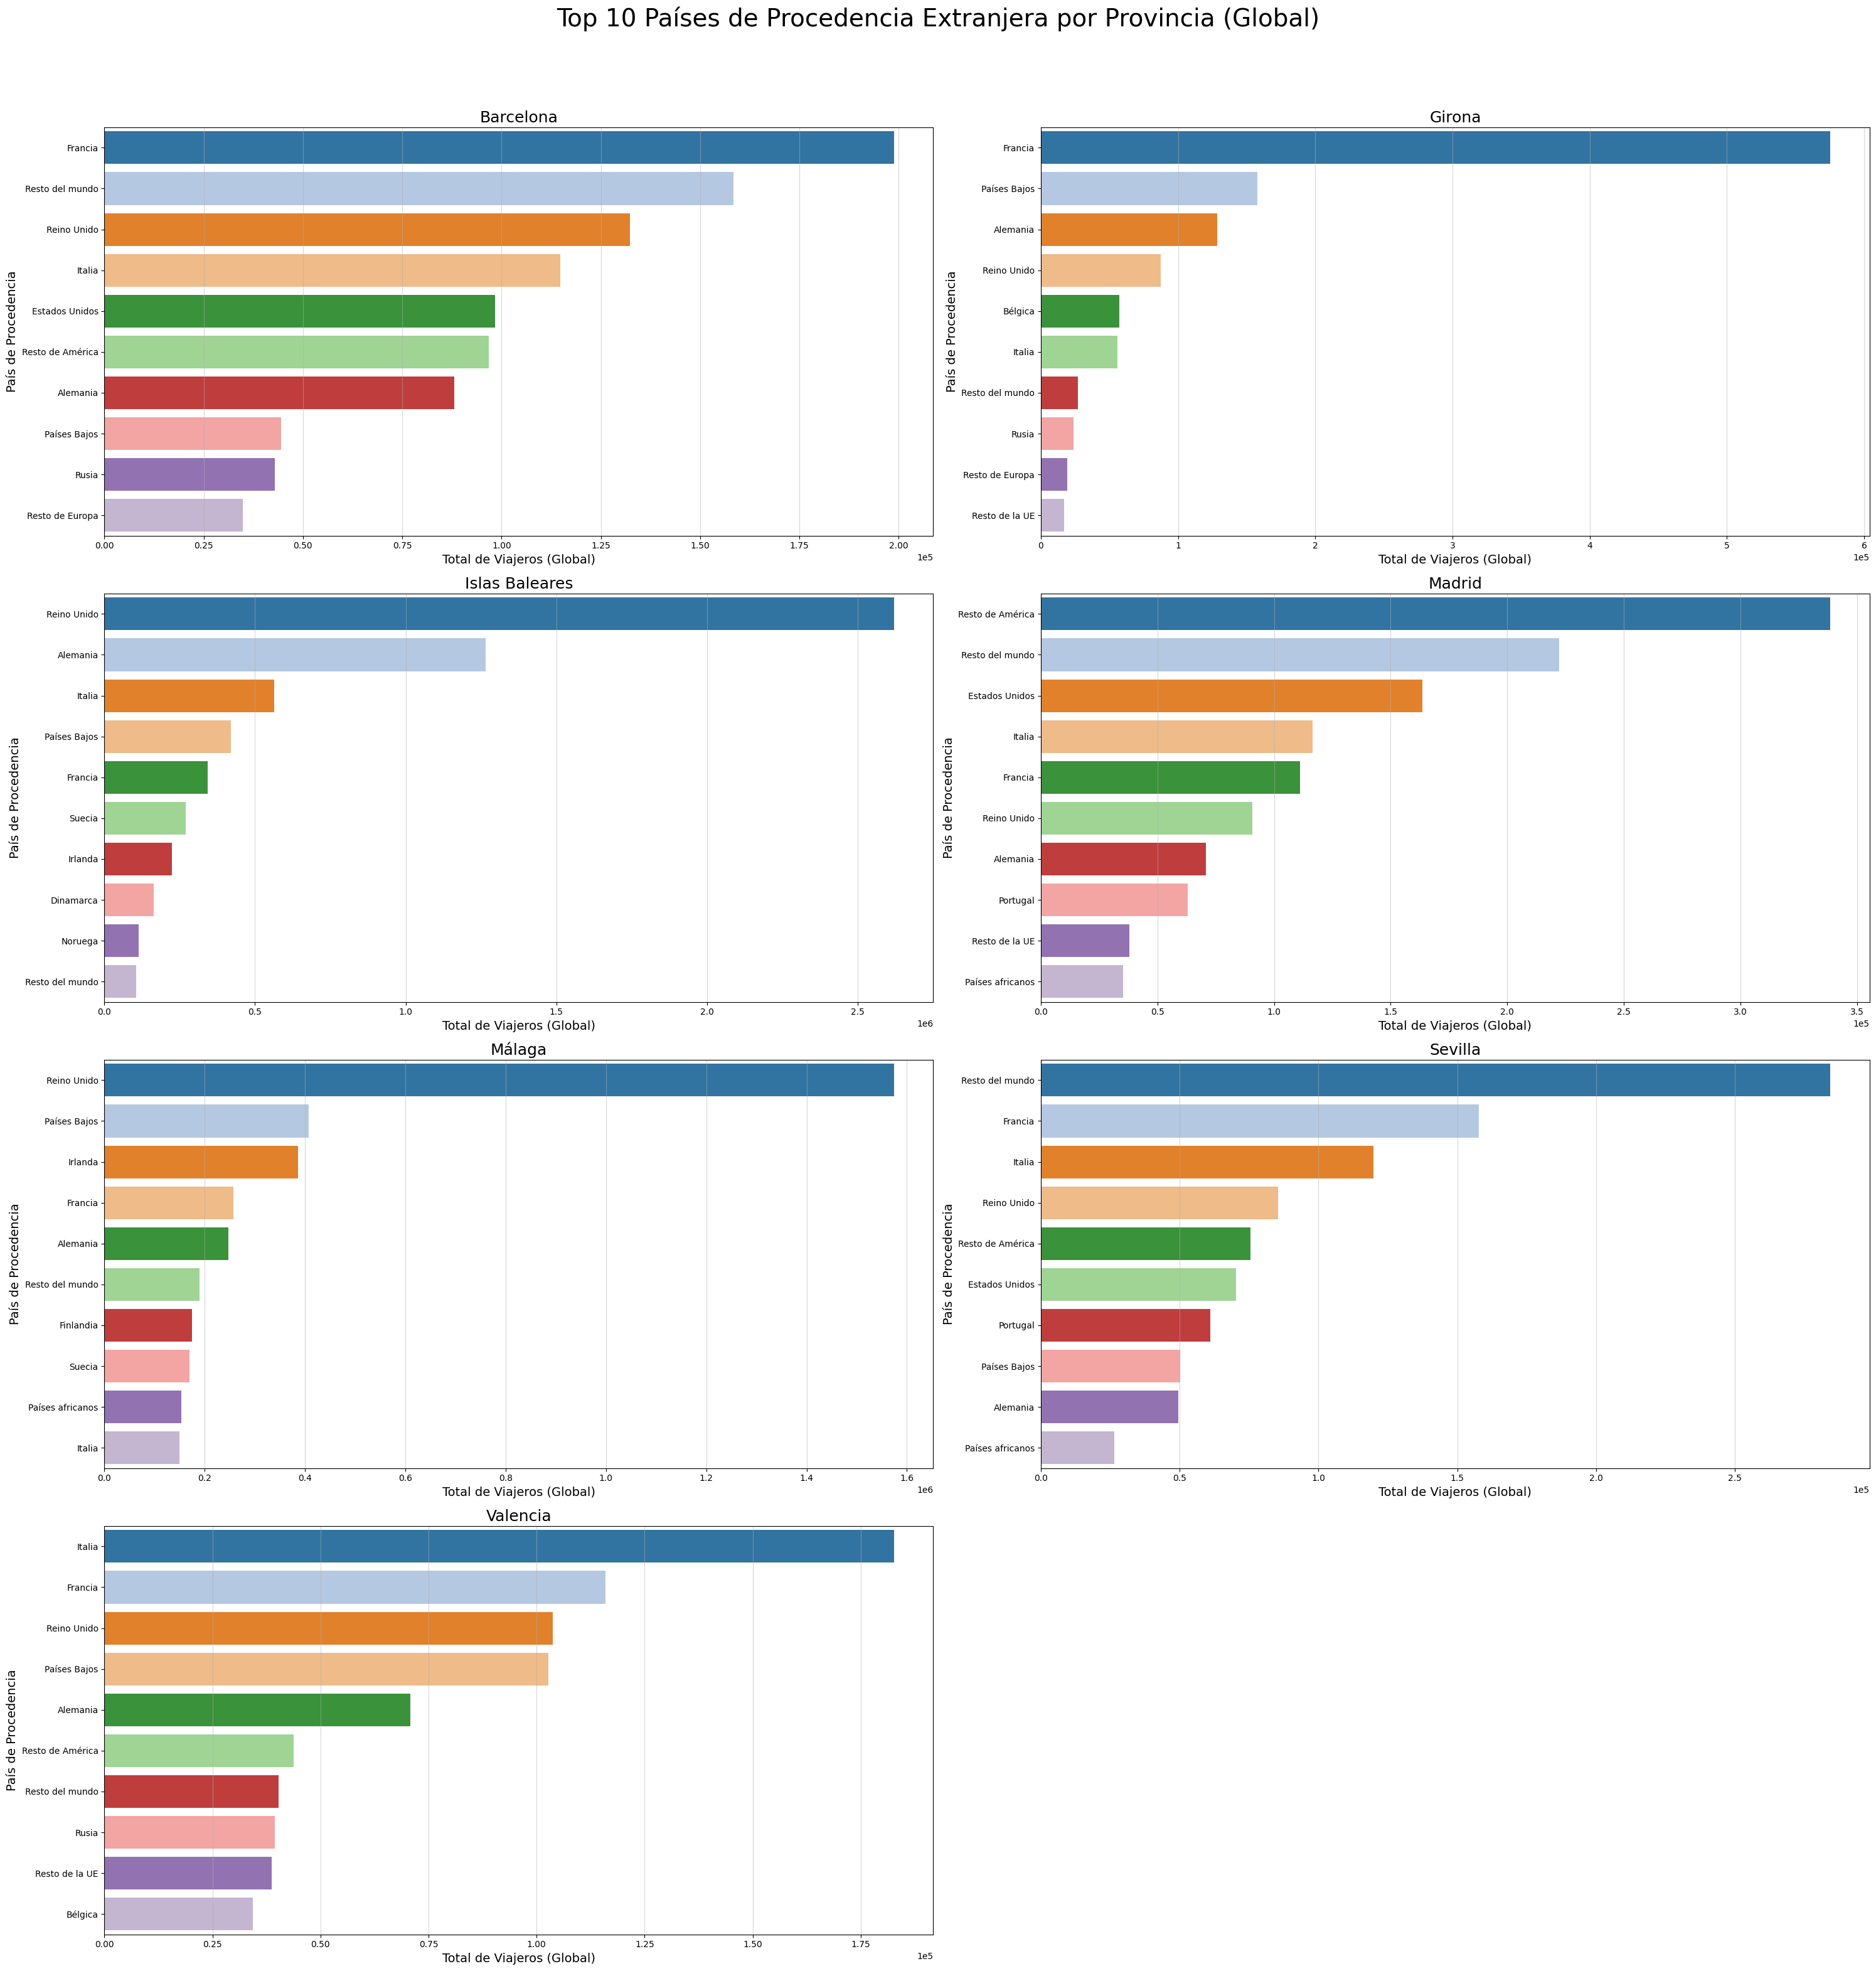

In [22]:
# --- 1. Preparación y Agrupación de Datos Globales ---

# Agrupación global: Suma de viajeros por Provincia y País de residencia (ignora el año)
df_grouped_global = df_paises.groupby(['provincia', 'pais_residencia'])['total_viajeros'].sum().reset_index()

# Excluir España (solo queremos procedencia extranjera)
df_grouped_extranjero_global = df_grouped_global[df_grouped_global['pais_residencia'] != 'España'].copy()

# Determinar provincias y layout para la figura
provincias_unicas = sorted(df_grouped_extranjero_global['provincia'].unique())
n_provincias = len(provincias_unicas)

# --- 2. Generación de la Figura Única (Estructura 2 Columnas) ---

# Calcular el número de filas necesarias
ncols = 2
nrows = math.ceil(n_provincias / ncols)

# Crear la única figura grande
fig, axes = plt.subplots(
    nrows=nrows, 
    ncols=ncols, 
    figsize=(15 * ncols, 8 * nrows), # Tamaño ajustado para subplots grandes
    sharex=False # Cada provincia tiene su propio rango de viajeros
)
plt.suptitle('Top 10 Países de Procedencia Extranjera por Provincia (Global)', fontsize=28, y=1.01)

# Aplanar los ejes para facilitar la indexación
if n_provincias == 1:
    axes = [axes]
else:
    axes = axes.flatten()

# 3. Bucle para dibujar cada provincia
for i, provincia in enumerate(provincias_unicas):
    ax = axes[i]
    
    # Filtrar por la provincia actual
    df_provincial = df_grouped_extranjero_global[df_grouped_extranjero_global['provincia'] == provincia]
    
    # Obtener el Top 10 global para esta provincia
    df_top_10 = df_provincial.sort_values(by='total_viajeros', ascending=False).head(10)

    # Dibujar el gráfico de barras (Horizontal)
    sns.barplot(
        ax=ax, 
        data=df_top_10, 
        x='total_viajeros', 
        y='pais_residencia',
        hue='pais_residencia',
        legend=False,
        palette='tab20'
    )
    
    # Configuración del Gráfico
    ax.set_title(f'{provincia}', fontsize=18)
    ax.set_xlabel('Total de Viajeros (Global)', fontsize=14)
    ax.set_ylabel('País de Procedencia', fontsize=14)
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax.grid(axis='x', alpha=0.5)

# 4. Ocultar ejes sobrantes
for j in range(n_provincias, nrows * ncols):
    fig.delaxes(axes[j])

# Mostrar la figura
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()



# Evolución anual de top 10 paises extranjeros de procedencia por provincias de acogida, por año  ELIMINAR


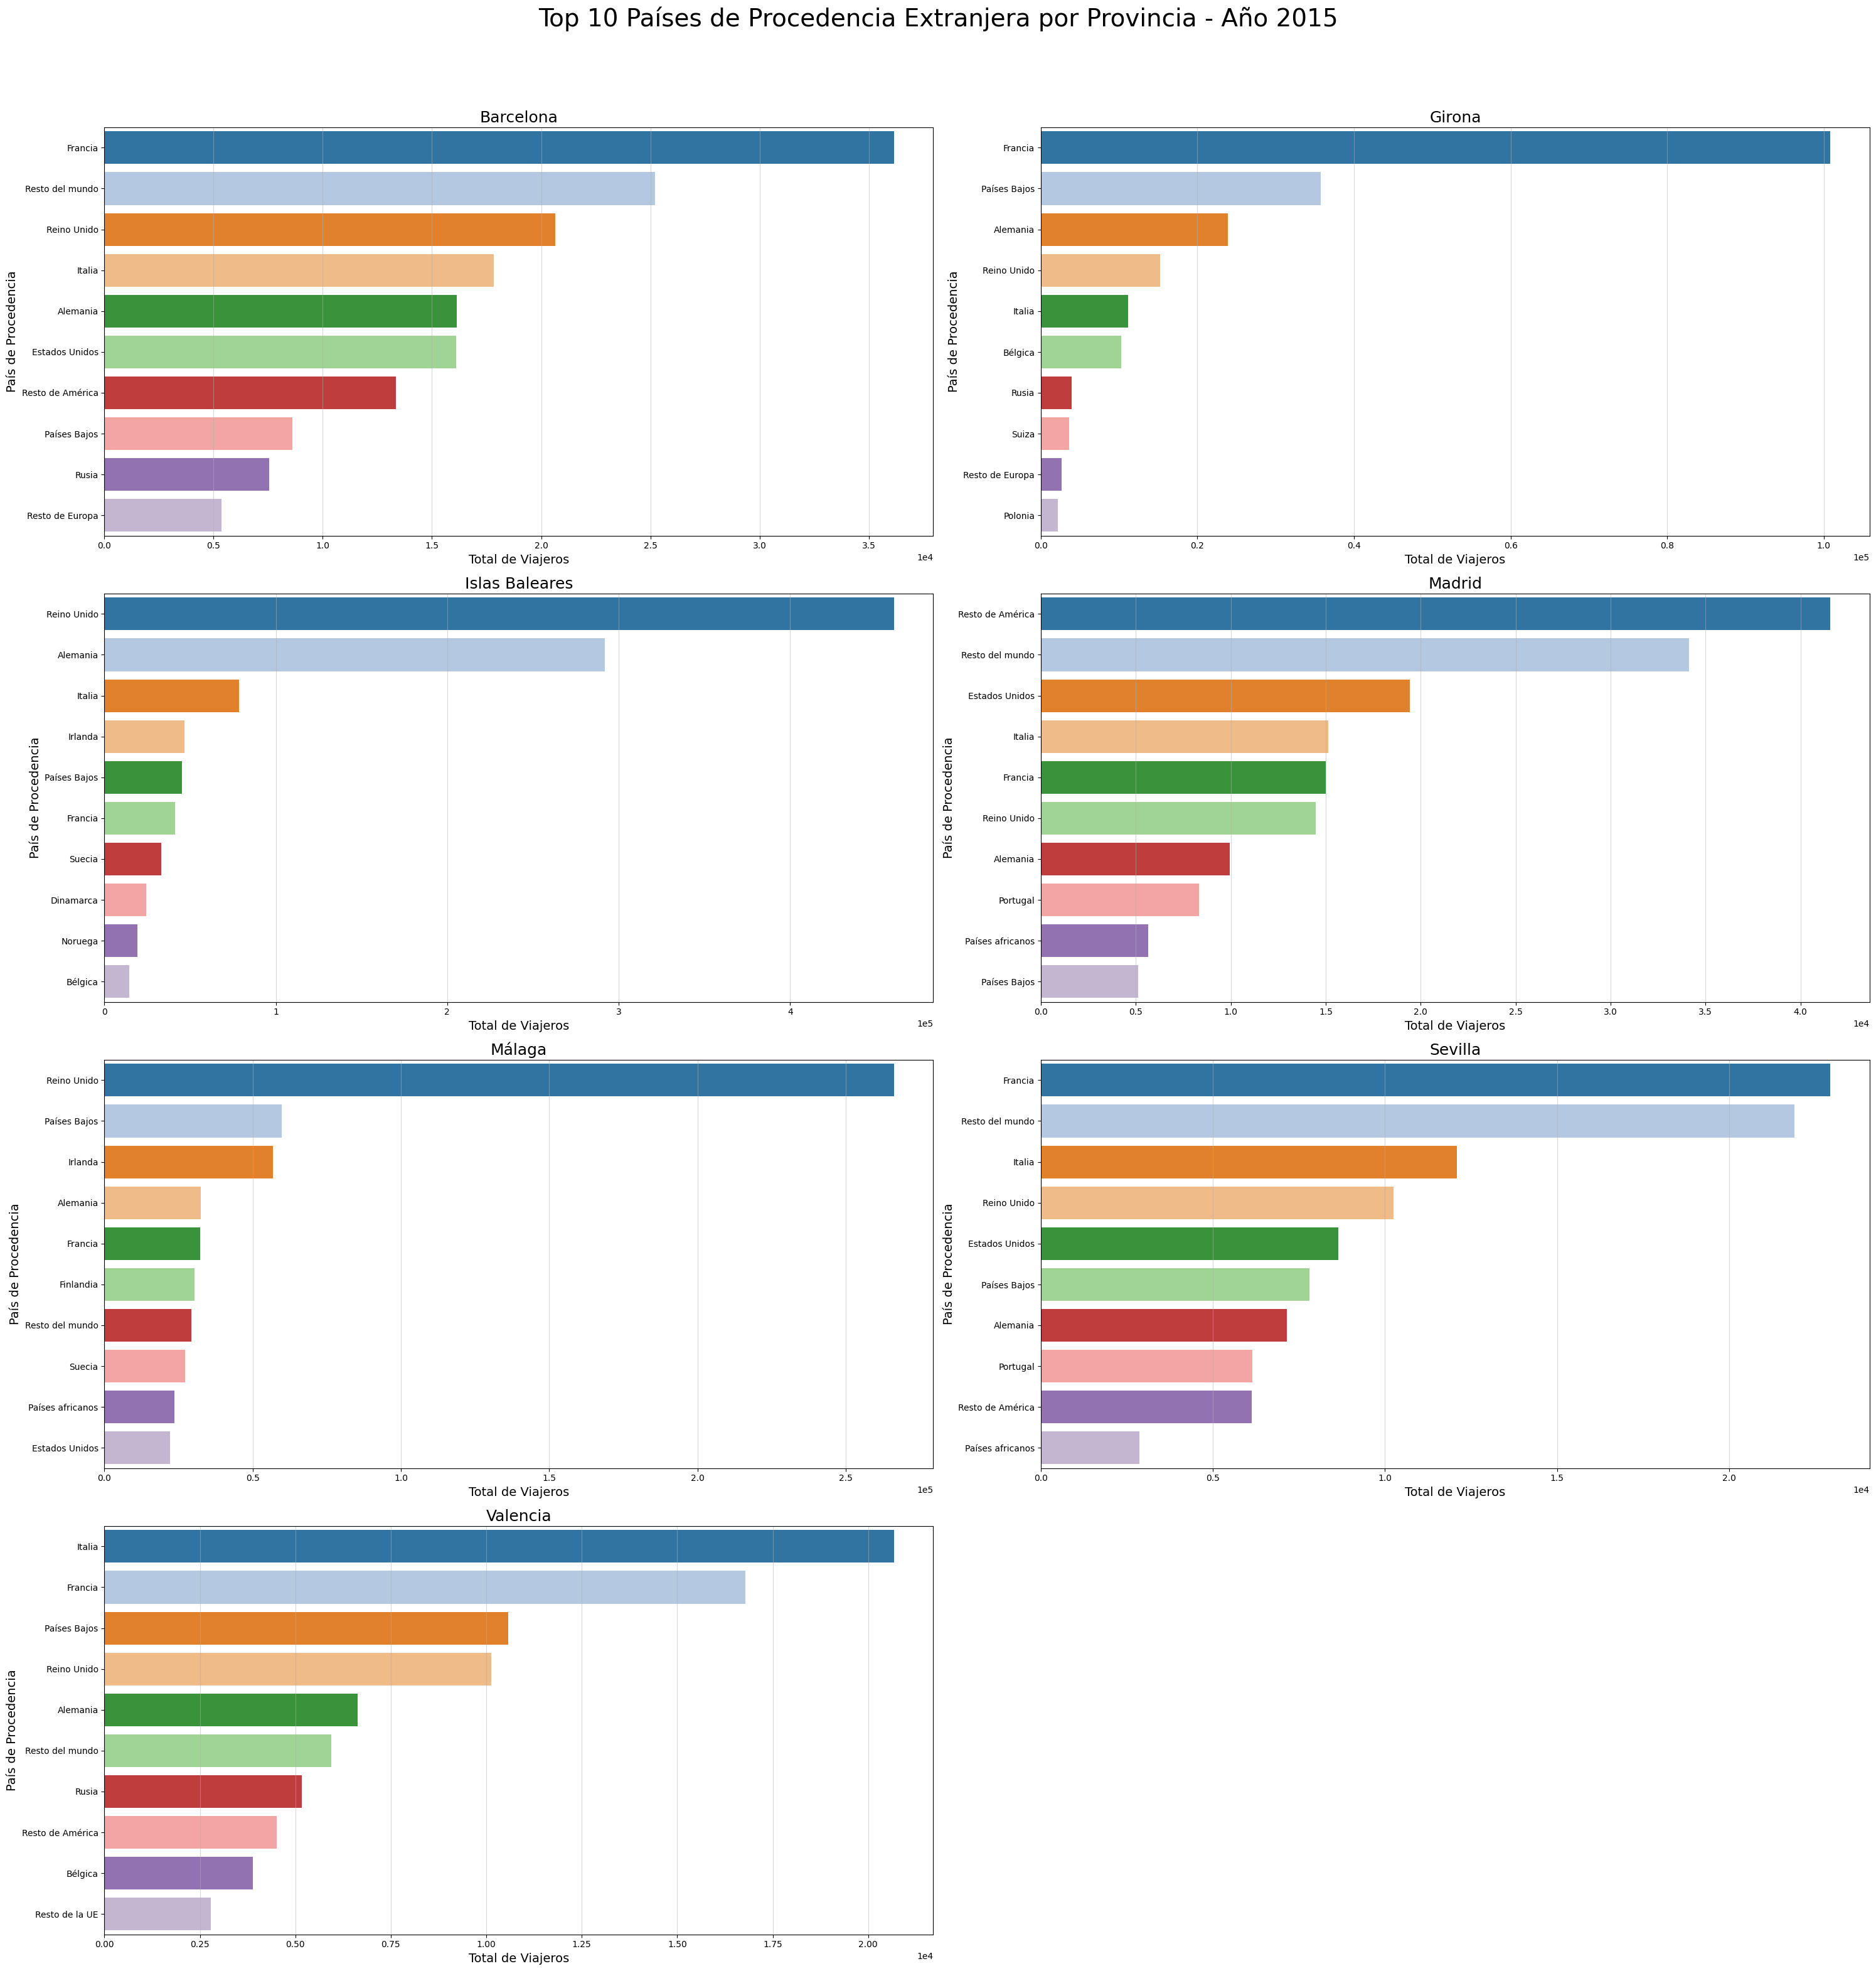

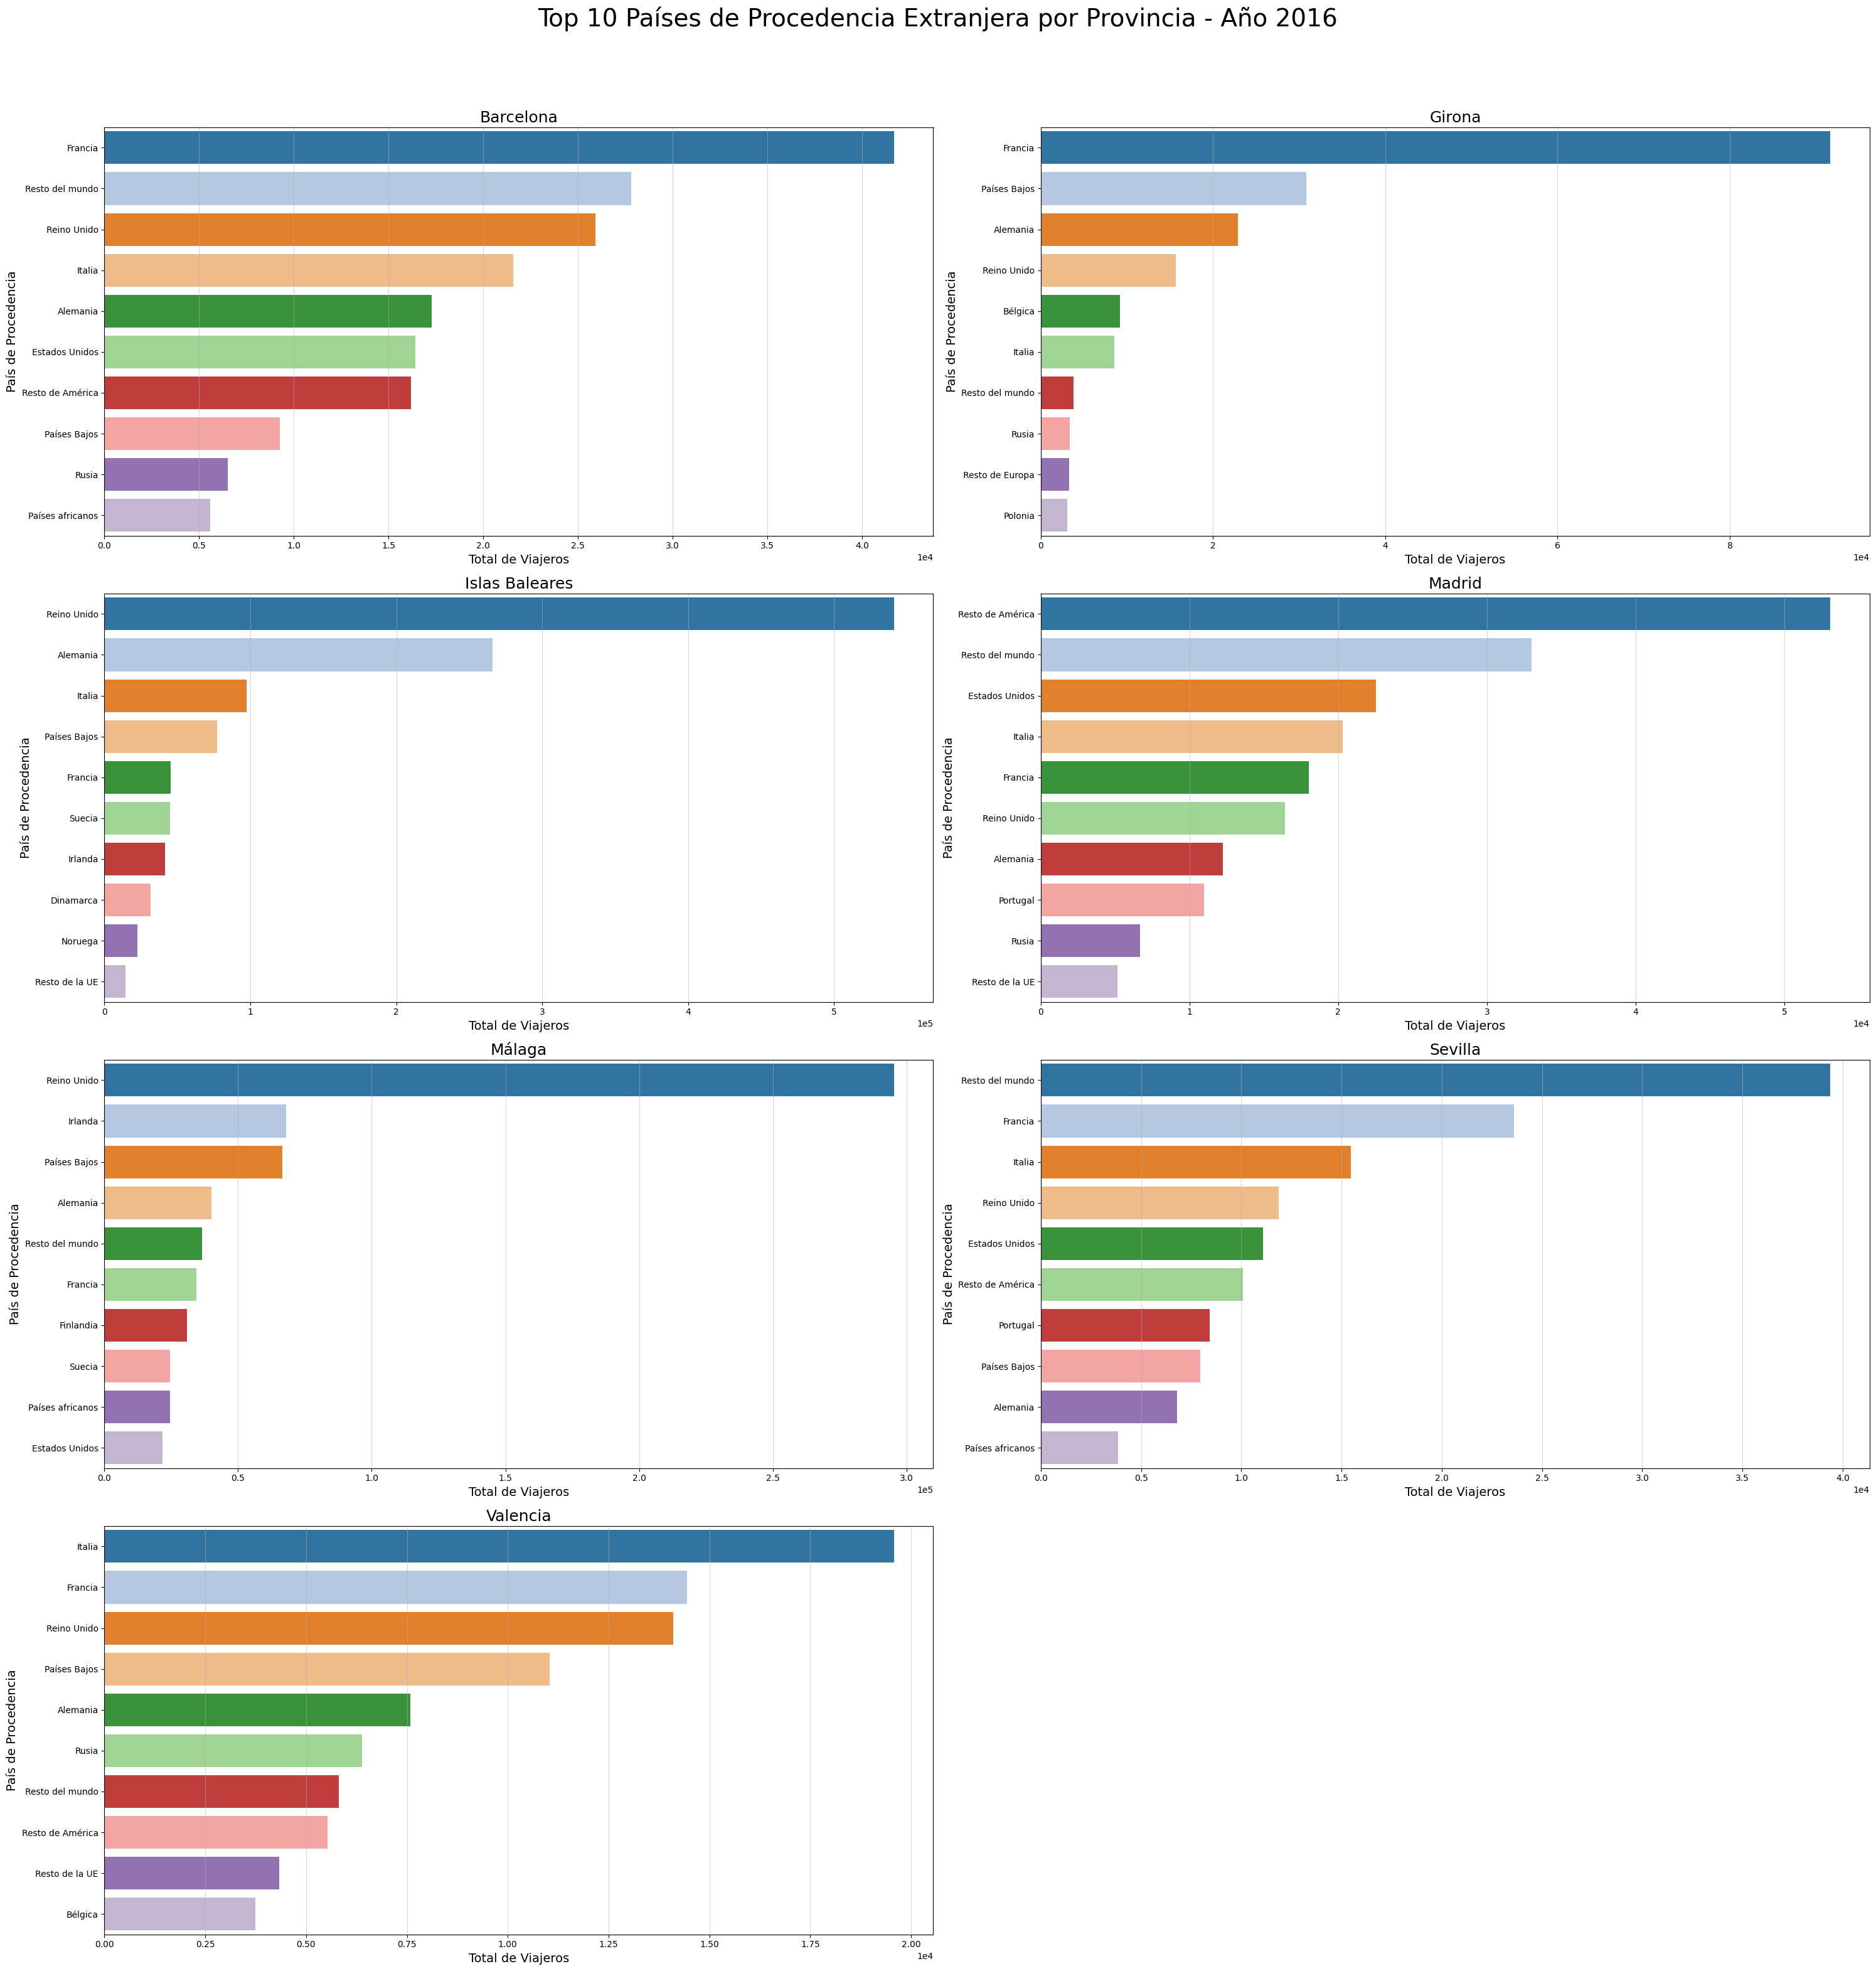

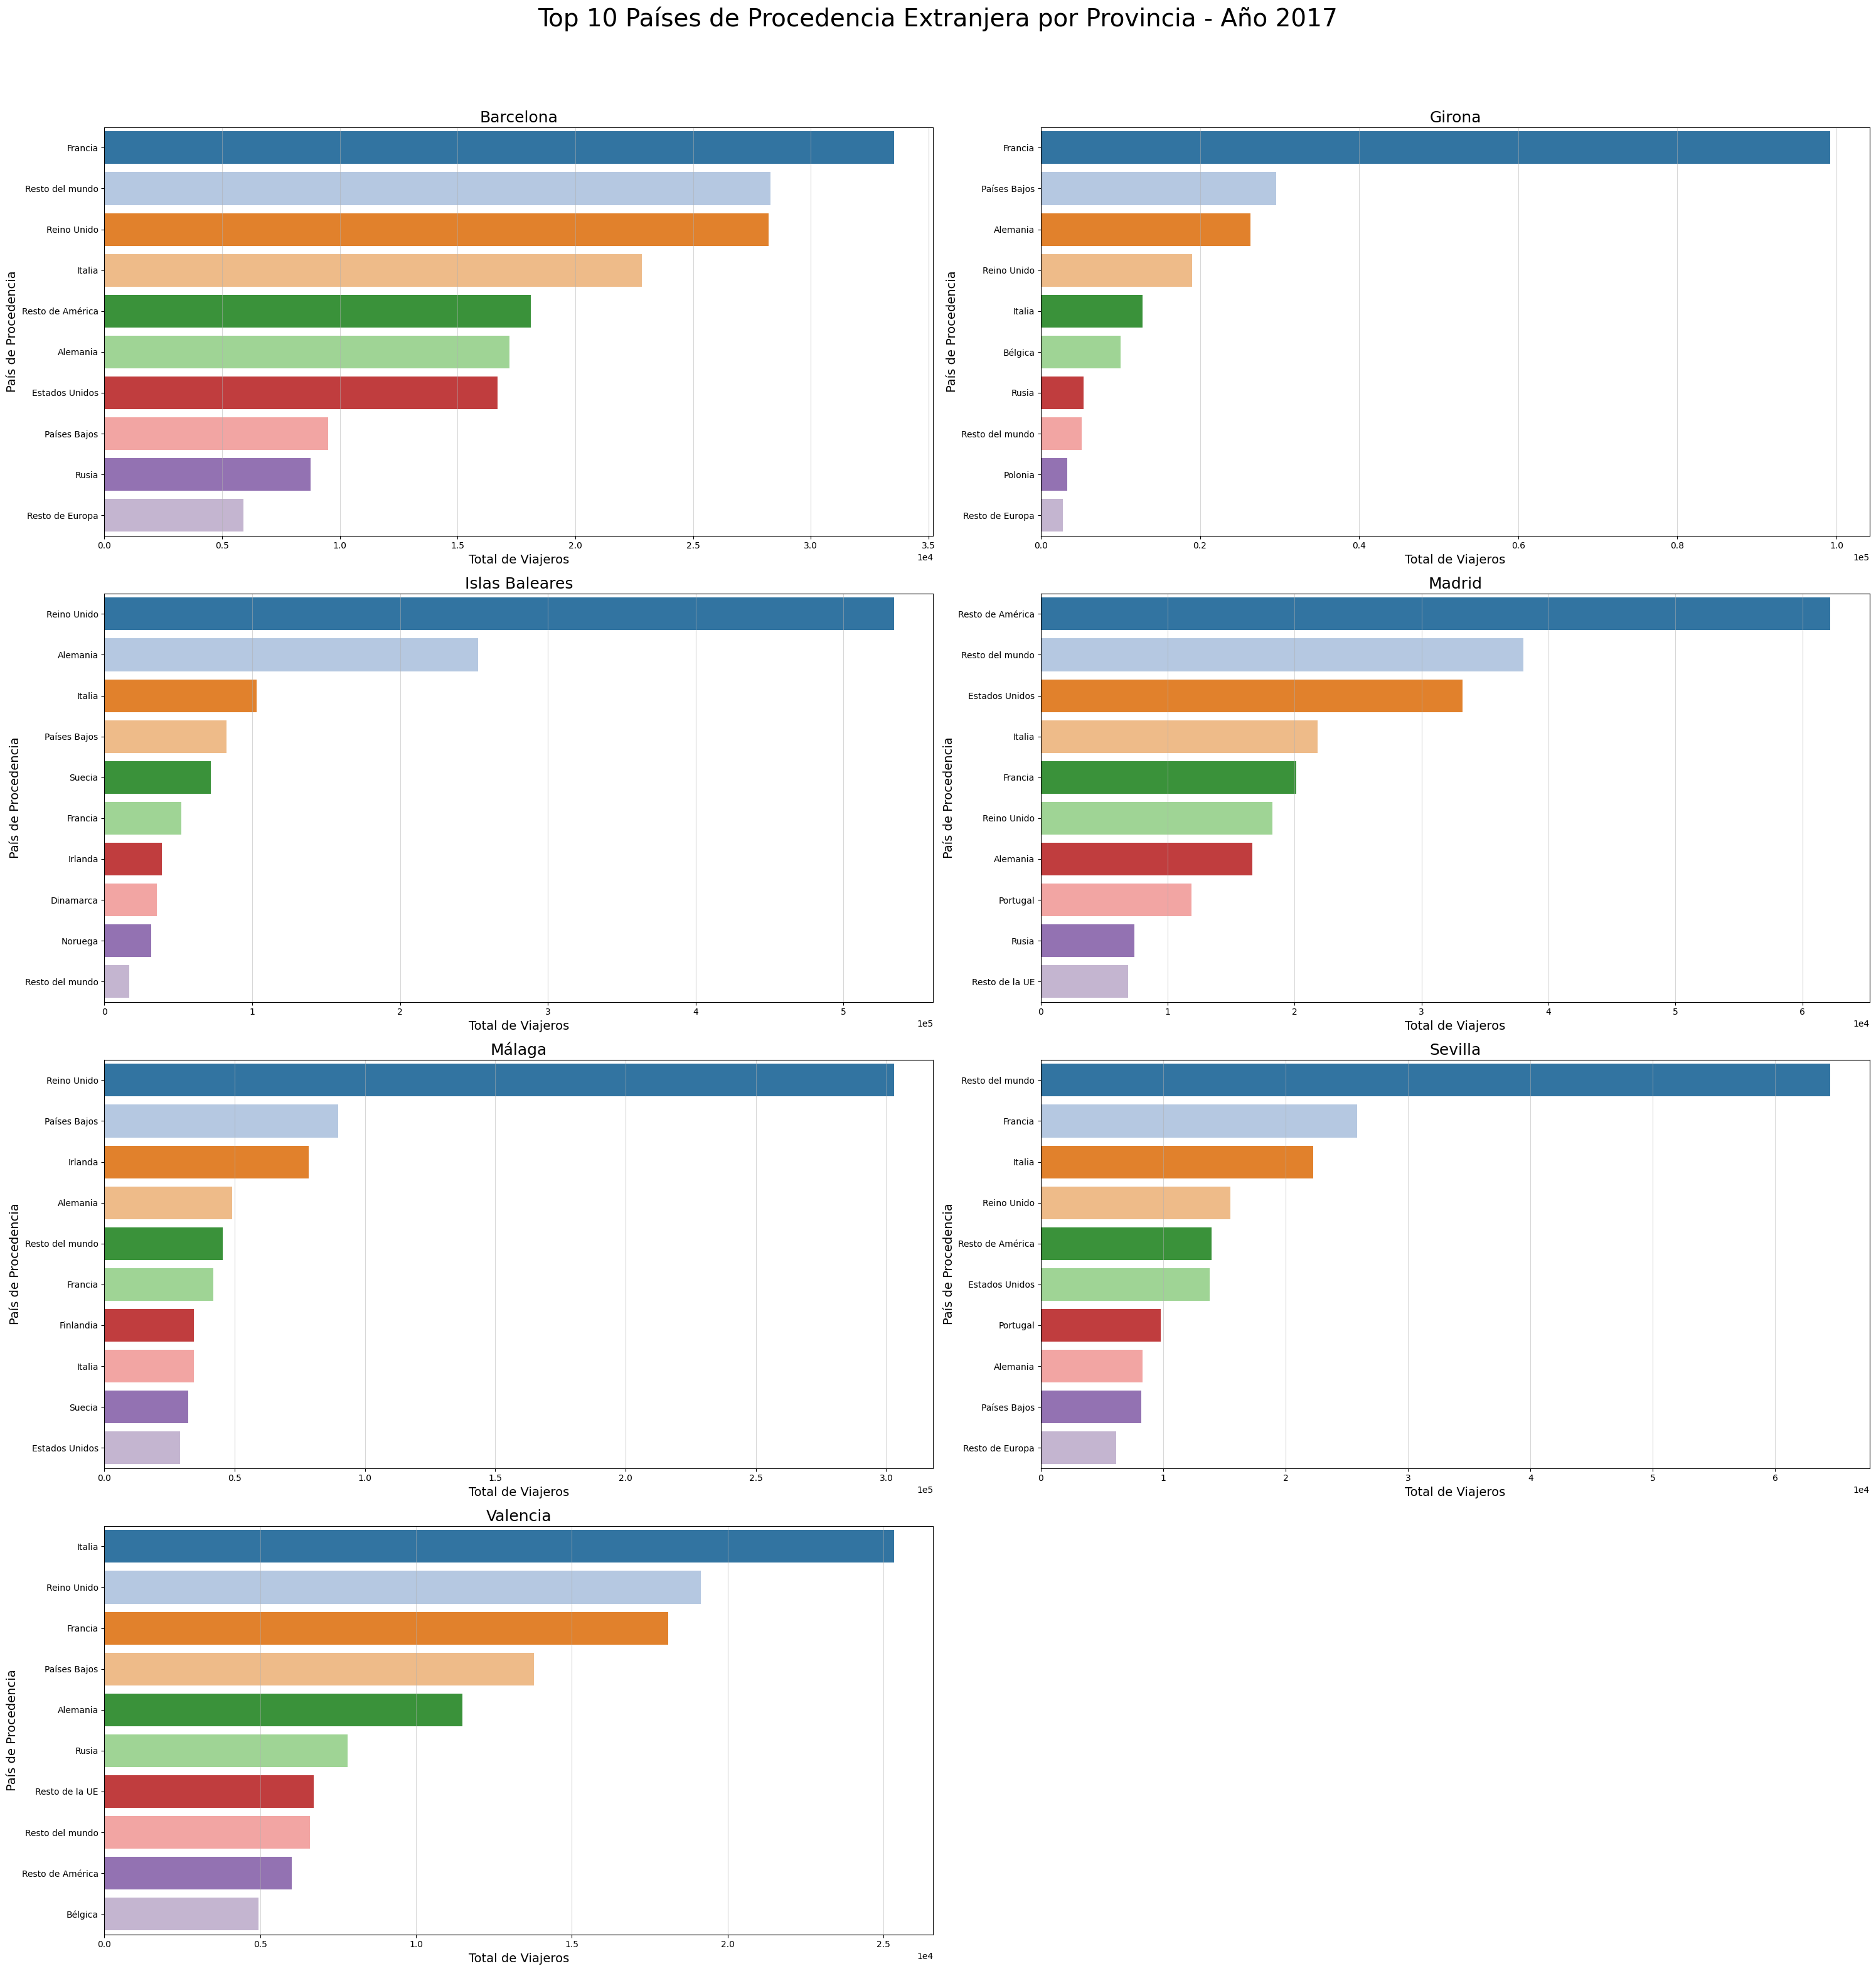

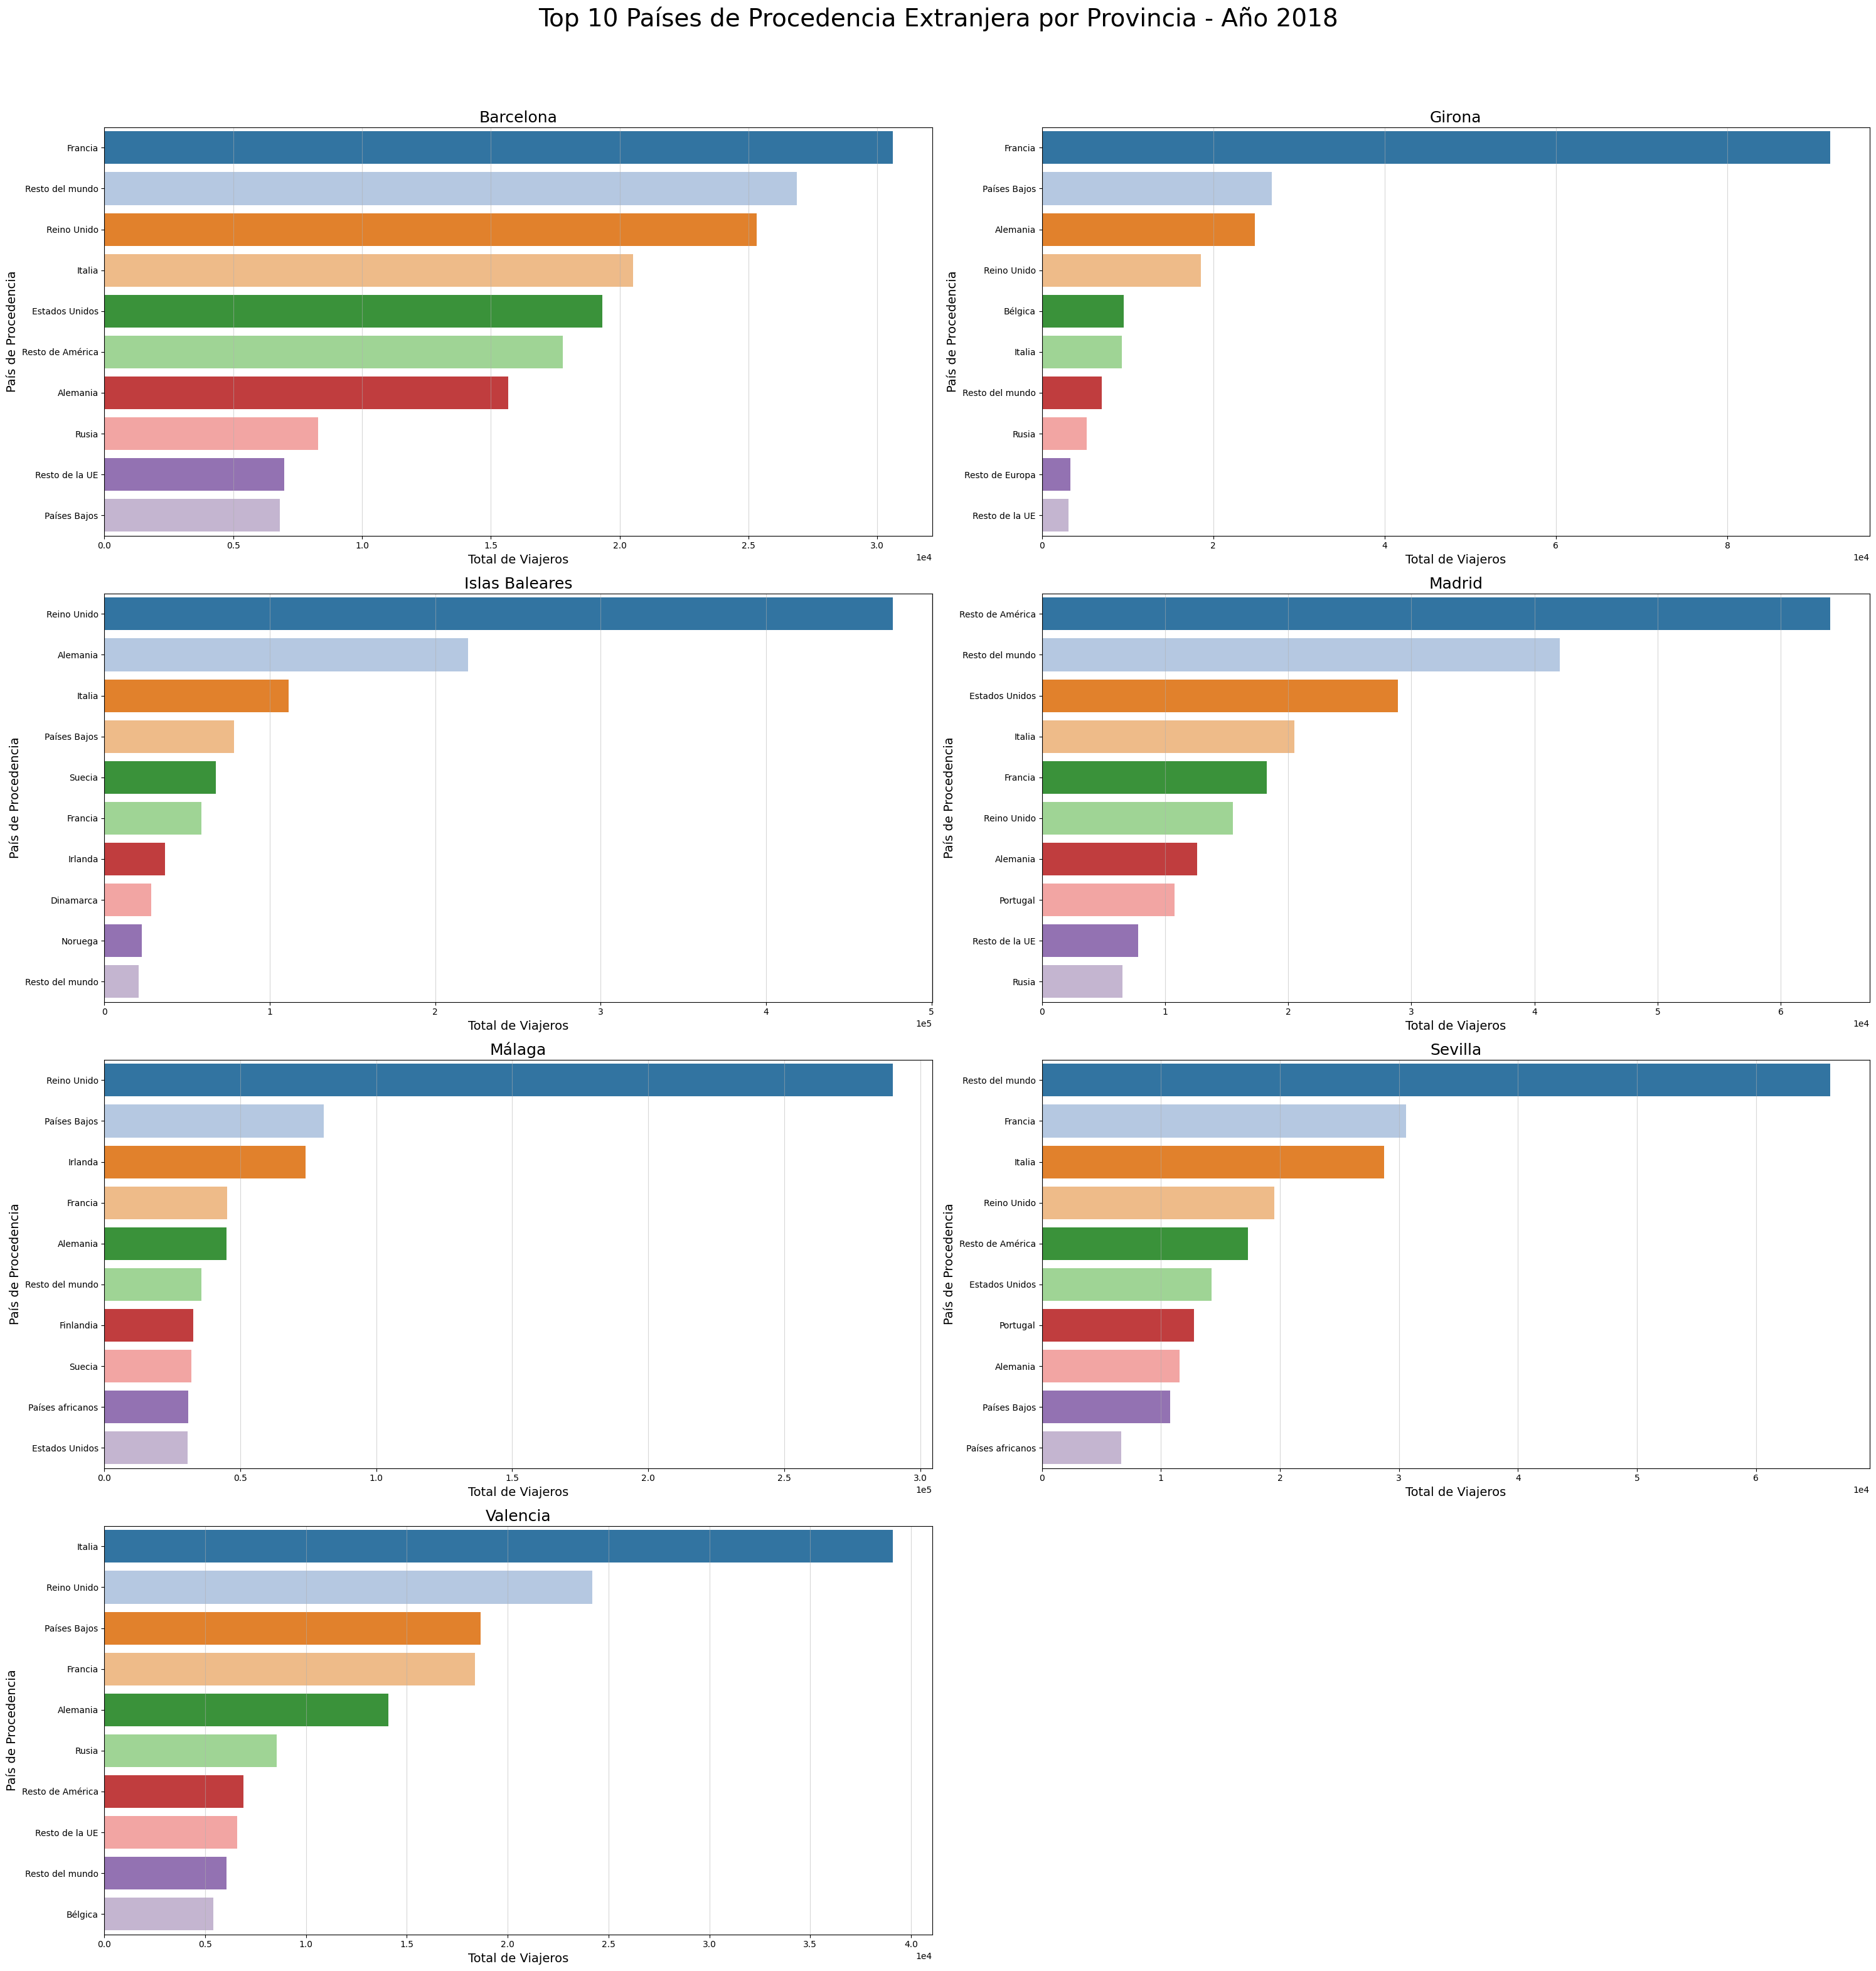

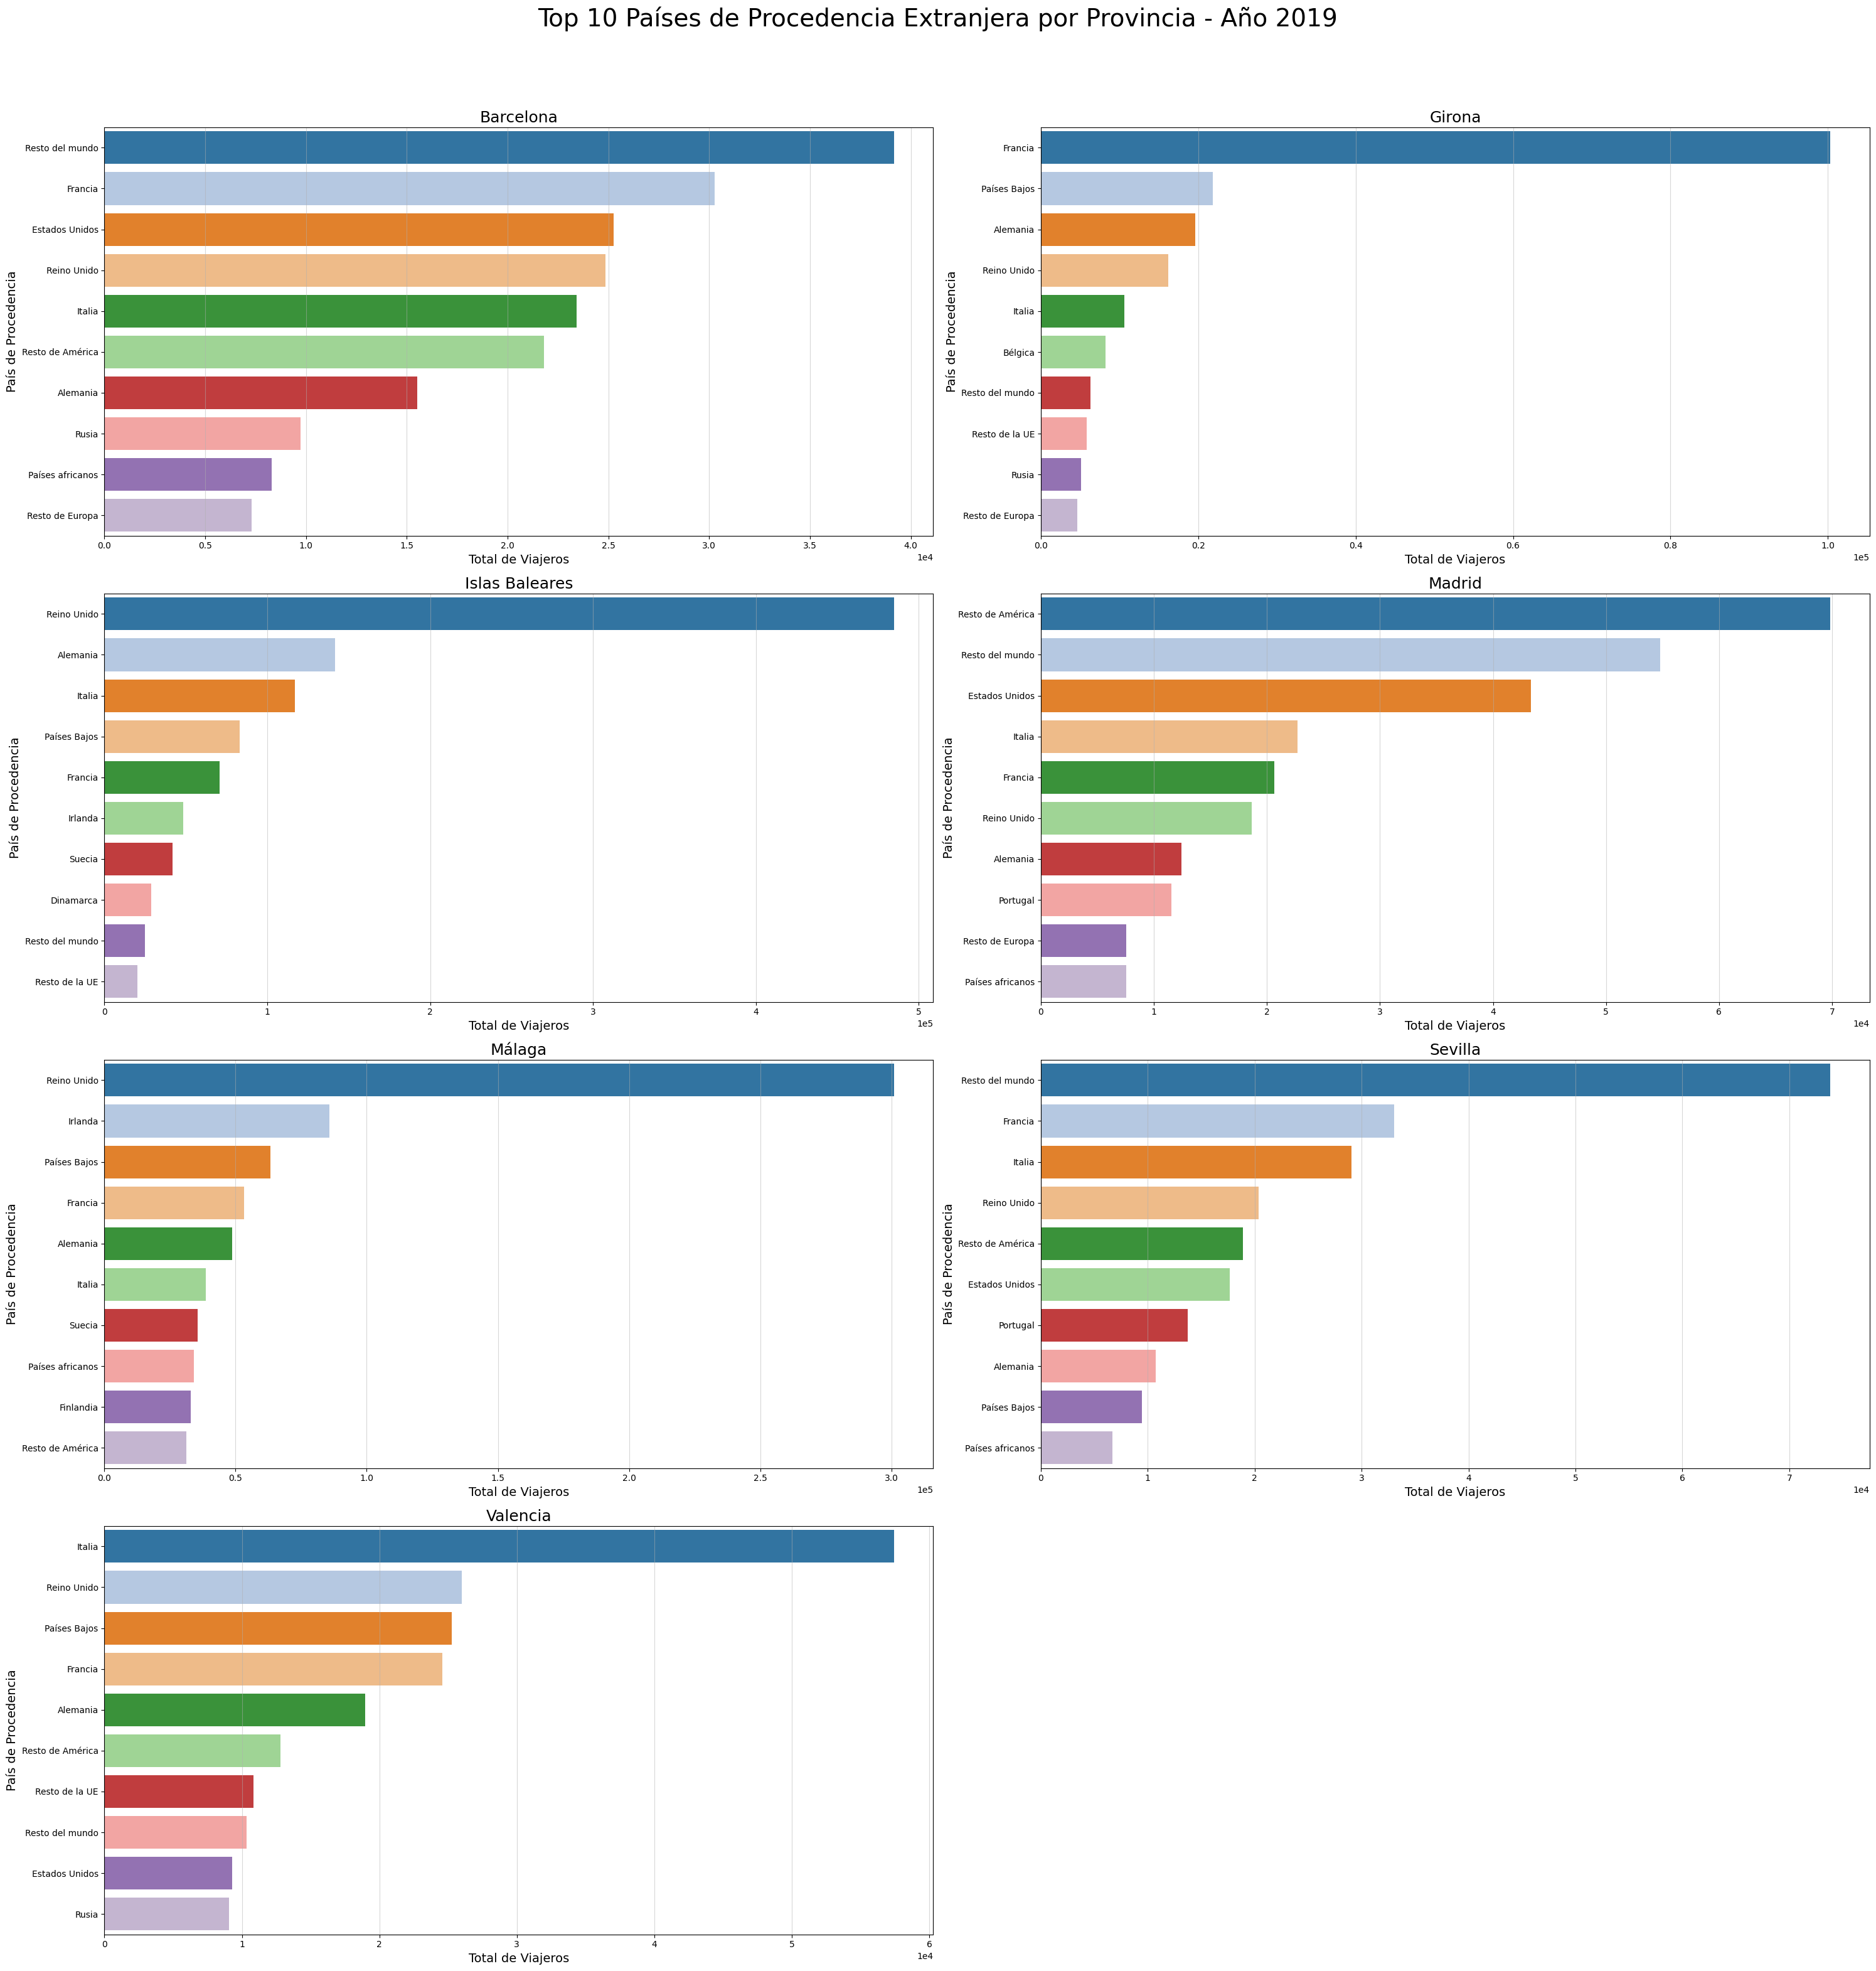

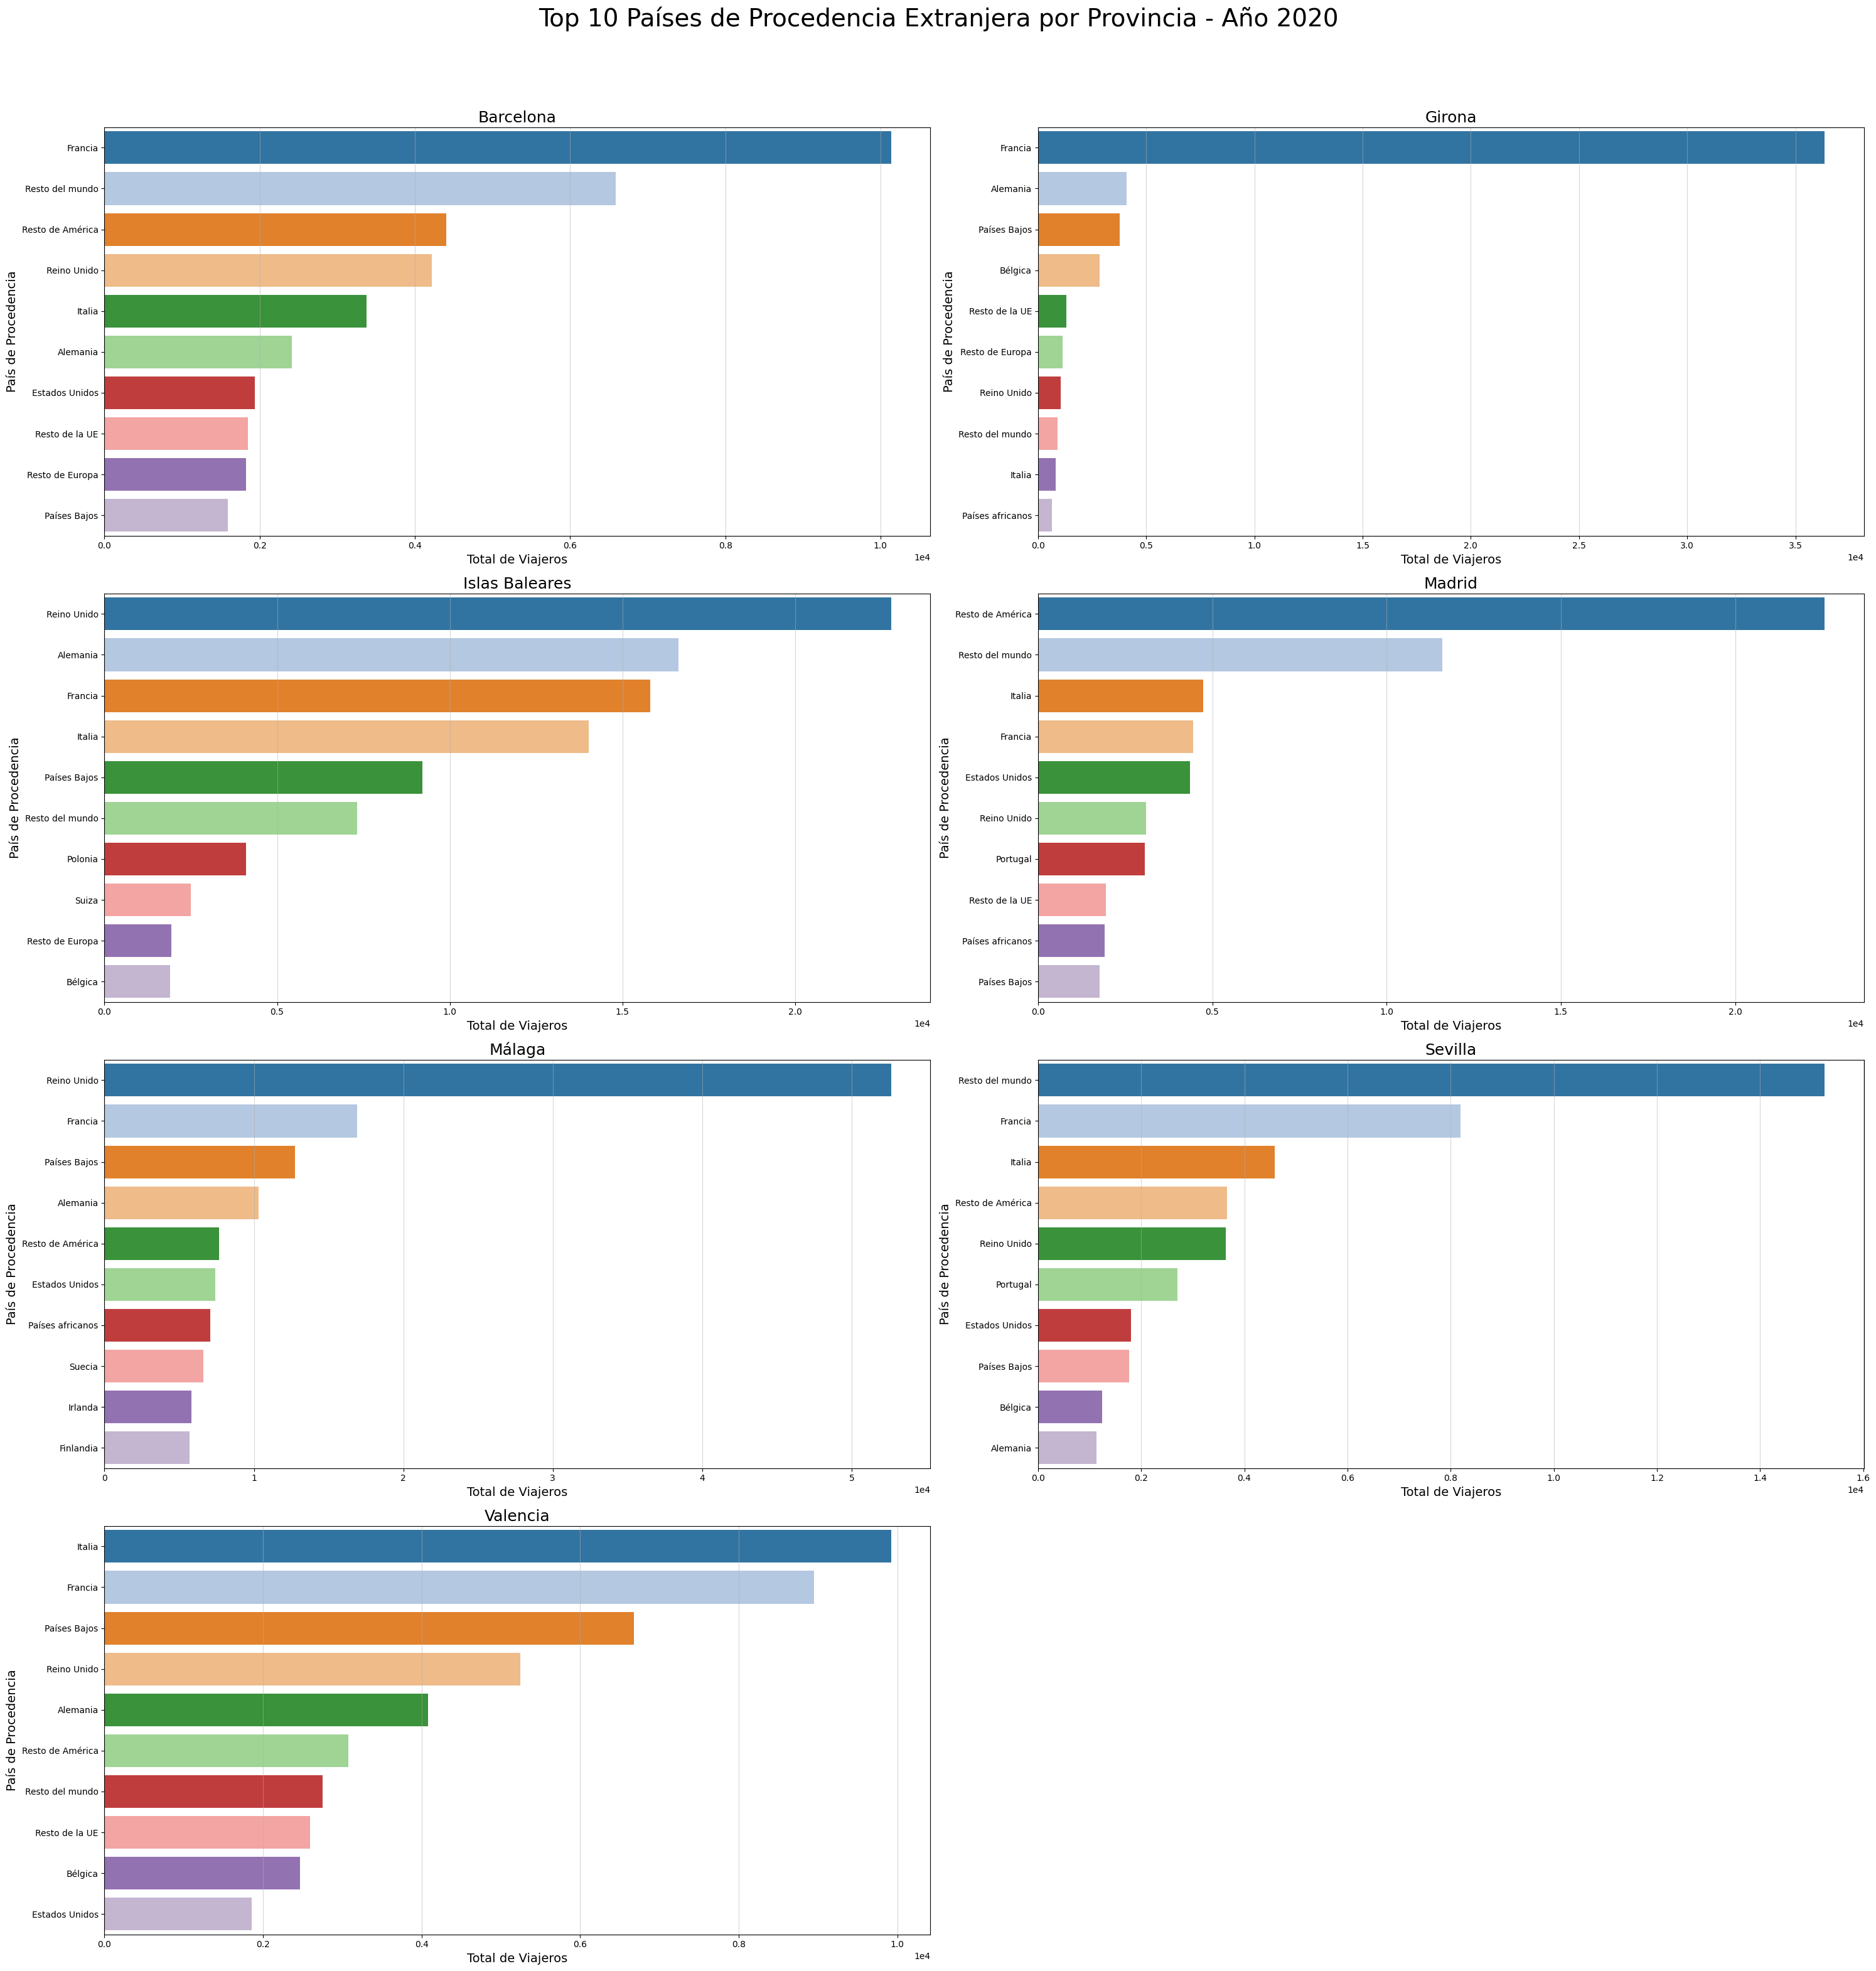

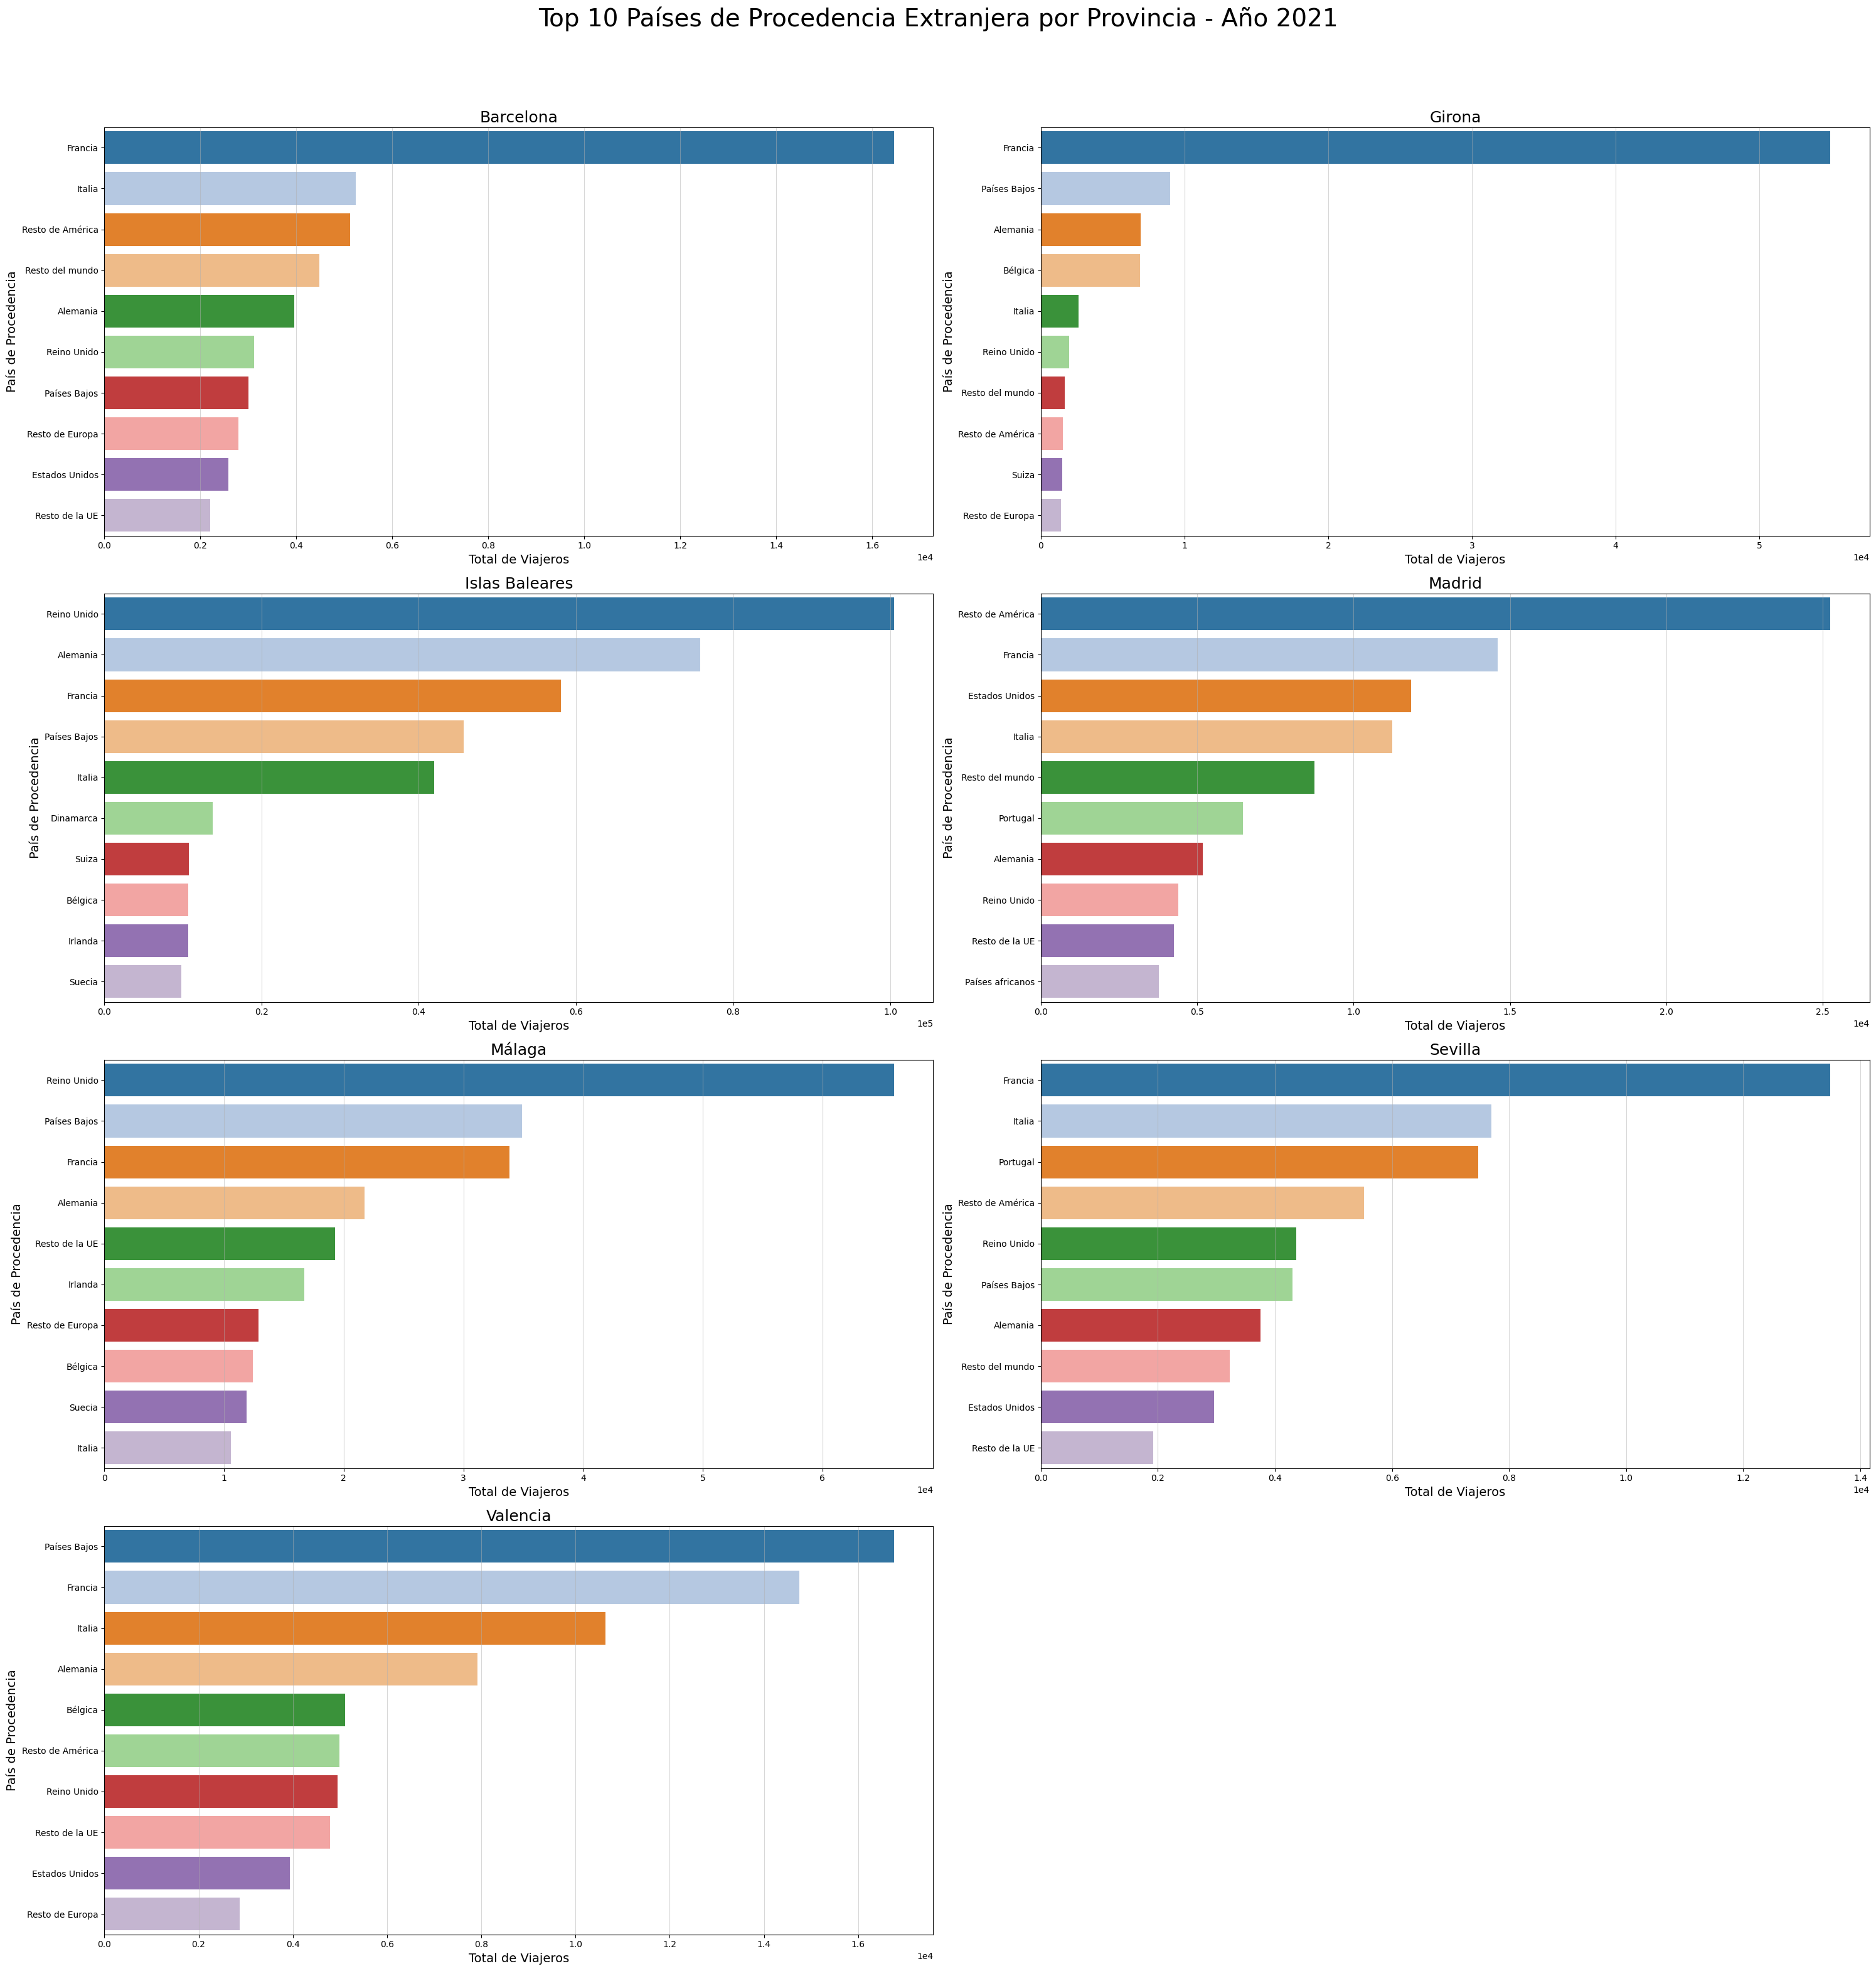

In [23]:
# --- 1. Preparación y Agrupación de Datos ---

# Agrupación base: Suma de viajeros por Año, Provincia y País
df_grouped = df_paises.groupby(['año', 'provincia', 'pais_residencia'])['total_viajeros'].sum().reset_index()

# Excluir España (solo queremos procedencia extranjera)
df_grouped_extranjero = df_grouped[df_grouped['pais_residencia'] != 'España'].copy()

# Obtener la lista de años para el bucle principal
años_unicos = sorted(df_grouped_extranjero['año'].unique())

# --- 2. Generación de Gráficos (Bucle Anidado) ---

for año in años_unicos:
    # 2.1 Filtrar datos por el año actual
    df_anual = df_grouped_extranjero[df_grouped_extranjero['año'] == año]
    
    # 2.2 Determinar provincias y layout para el año
    provincias_unicas = sorted(df_anual['provincia'].unique())
    n_provincias = len(provincias_unicas)
    
    # Se usará una estructura de 2 columnas para organizar las provincias
    ncols = 2
    nrows = math.ceil(n_provincias / ncols)
    
    # 2.3 Crear la figura para el año
    fig, axes = plt.subplots(
        nrows=nrows, 
        ncols=ncols, 
        figsize=(15 * ncols, 8 * nrows), # Tamaño ajustado para subplots
        sharex=False # Cada provincia tiene su propio rango de viajeros
    )
    plt.suptitle(f'Top 10 Países de Procedencia Extranjera por Provincia - Año {año}', fontsize=28, y=1.01)
    
    # Aplanar los ejes para facilitar la indexación
    if n_provincias == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    # 2.4 Bucle interno: Iterar sobre las provincias
    for i, provincia in enumerate(provincias_unicas):
        ax = axes[i]
        
        # Filtrar por la provincia actual
        df_provincial = df_anual[df_anual['provincia'] == provincia]
        
        # Obtener el Top 10 por total_viajeros para esta provincia y año
        df_top_10 = df_provincial.sort_values(by='total_viajeros', ascending=False).head(10)

        # 2.5 Dibujar el gráfico de barras (Horizontal para mejor lectura de nombres de países)
        sns.barplot(
            ax=ax, 
            data=df_top_10, 
            x='total_viajeros', 
            y='pais_residencia',
            hue='pais_residencia', # Corrección de Seaborn para evitar el FutureWarning
            legend=False,
            palette='tab20' # Paleta con más colores
        )
        
        # 2.6 Configuración del Gráfico
        ax.set_title(f'{provincia}', fontsize=18)
        ax.set_xlabel('Total de Viajeros', fontsize=14)
        ax.set_ylabel('País de Procedencia', fontsize=14)
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # Formato científico en eje X
        ax.grid(axis='x', alpha=0.5)

    # 2.7 Ocultar ejes sobrantes
    for j in range(n_provincias, nrows * ncols):
        fig.delaxes(axes[j])

    # Mostrar la figura completa del año
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    plt.show()

# Evolucion mensual, año a año, para el top 10 paises  ELIMINAR

C:\Users\irene\AppData\Local\Temp\ipykernel_30892\1290350371.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paises['mes'] = pd.Categorical(


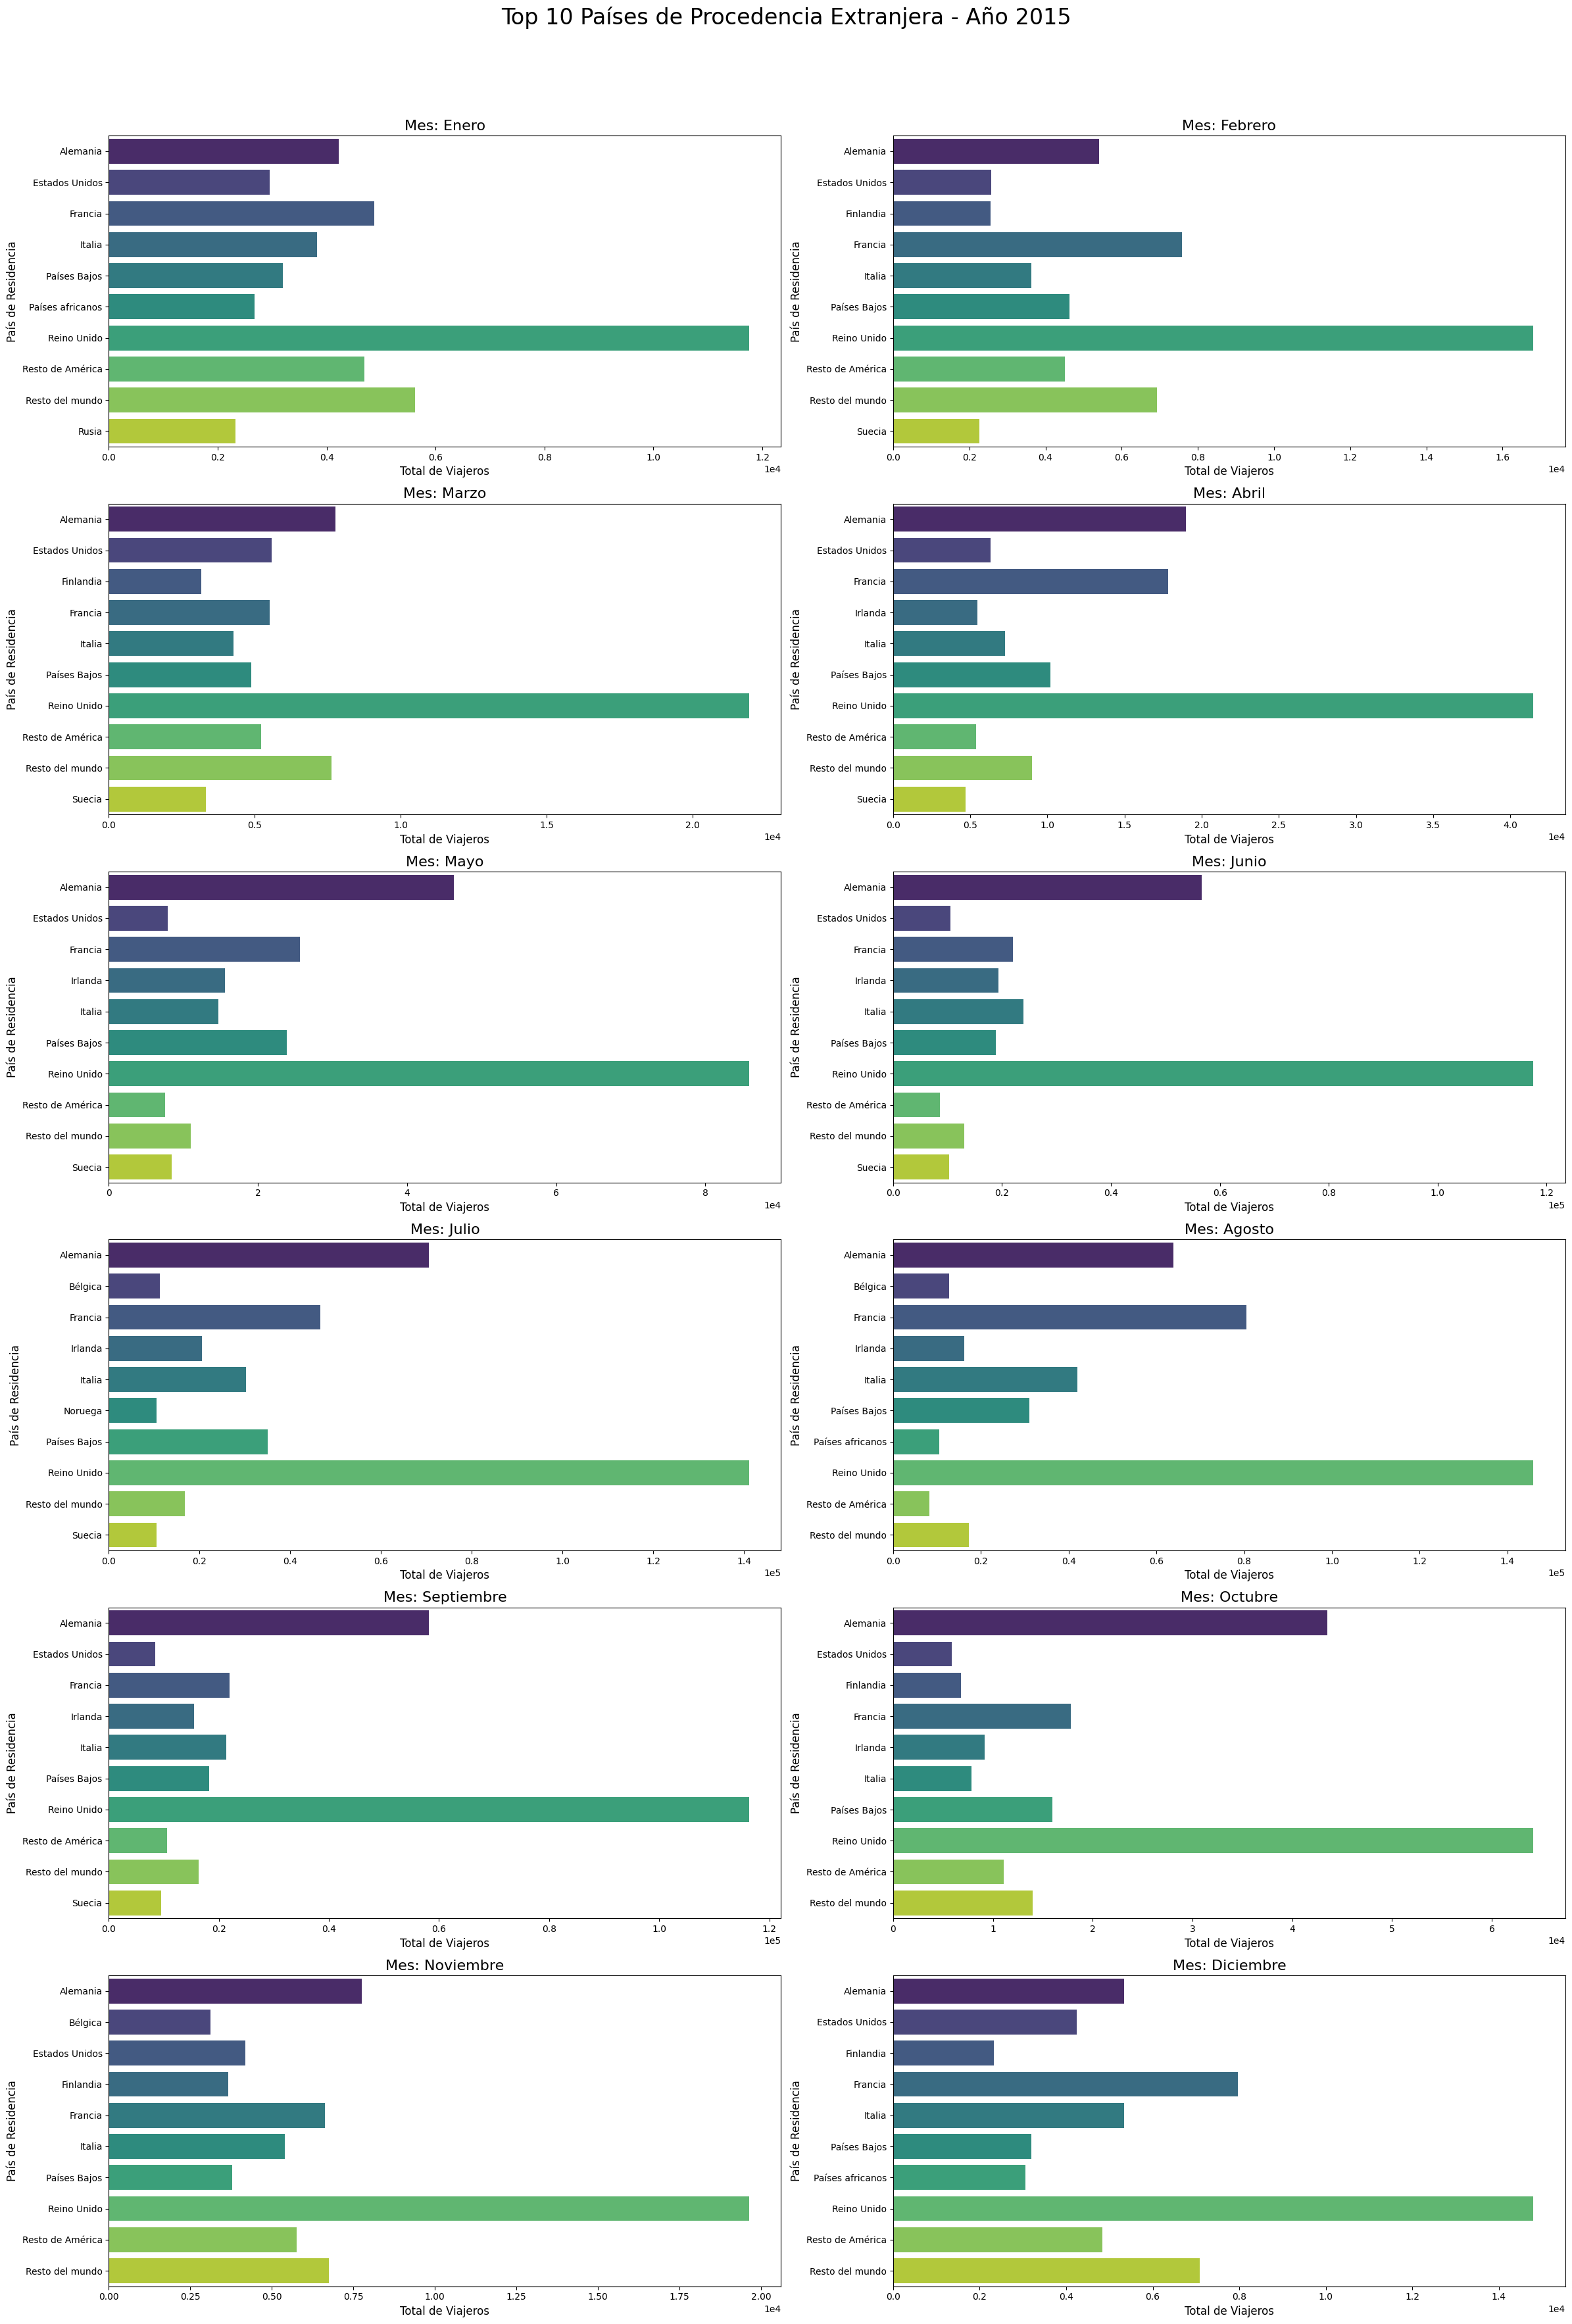

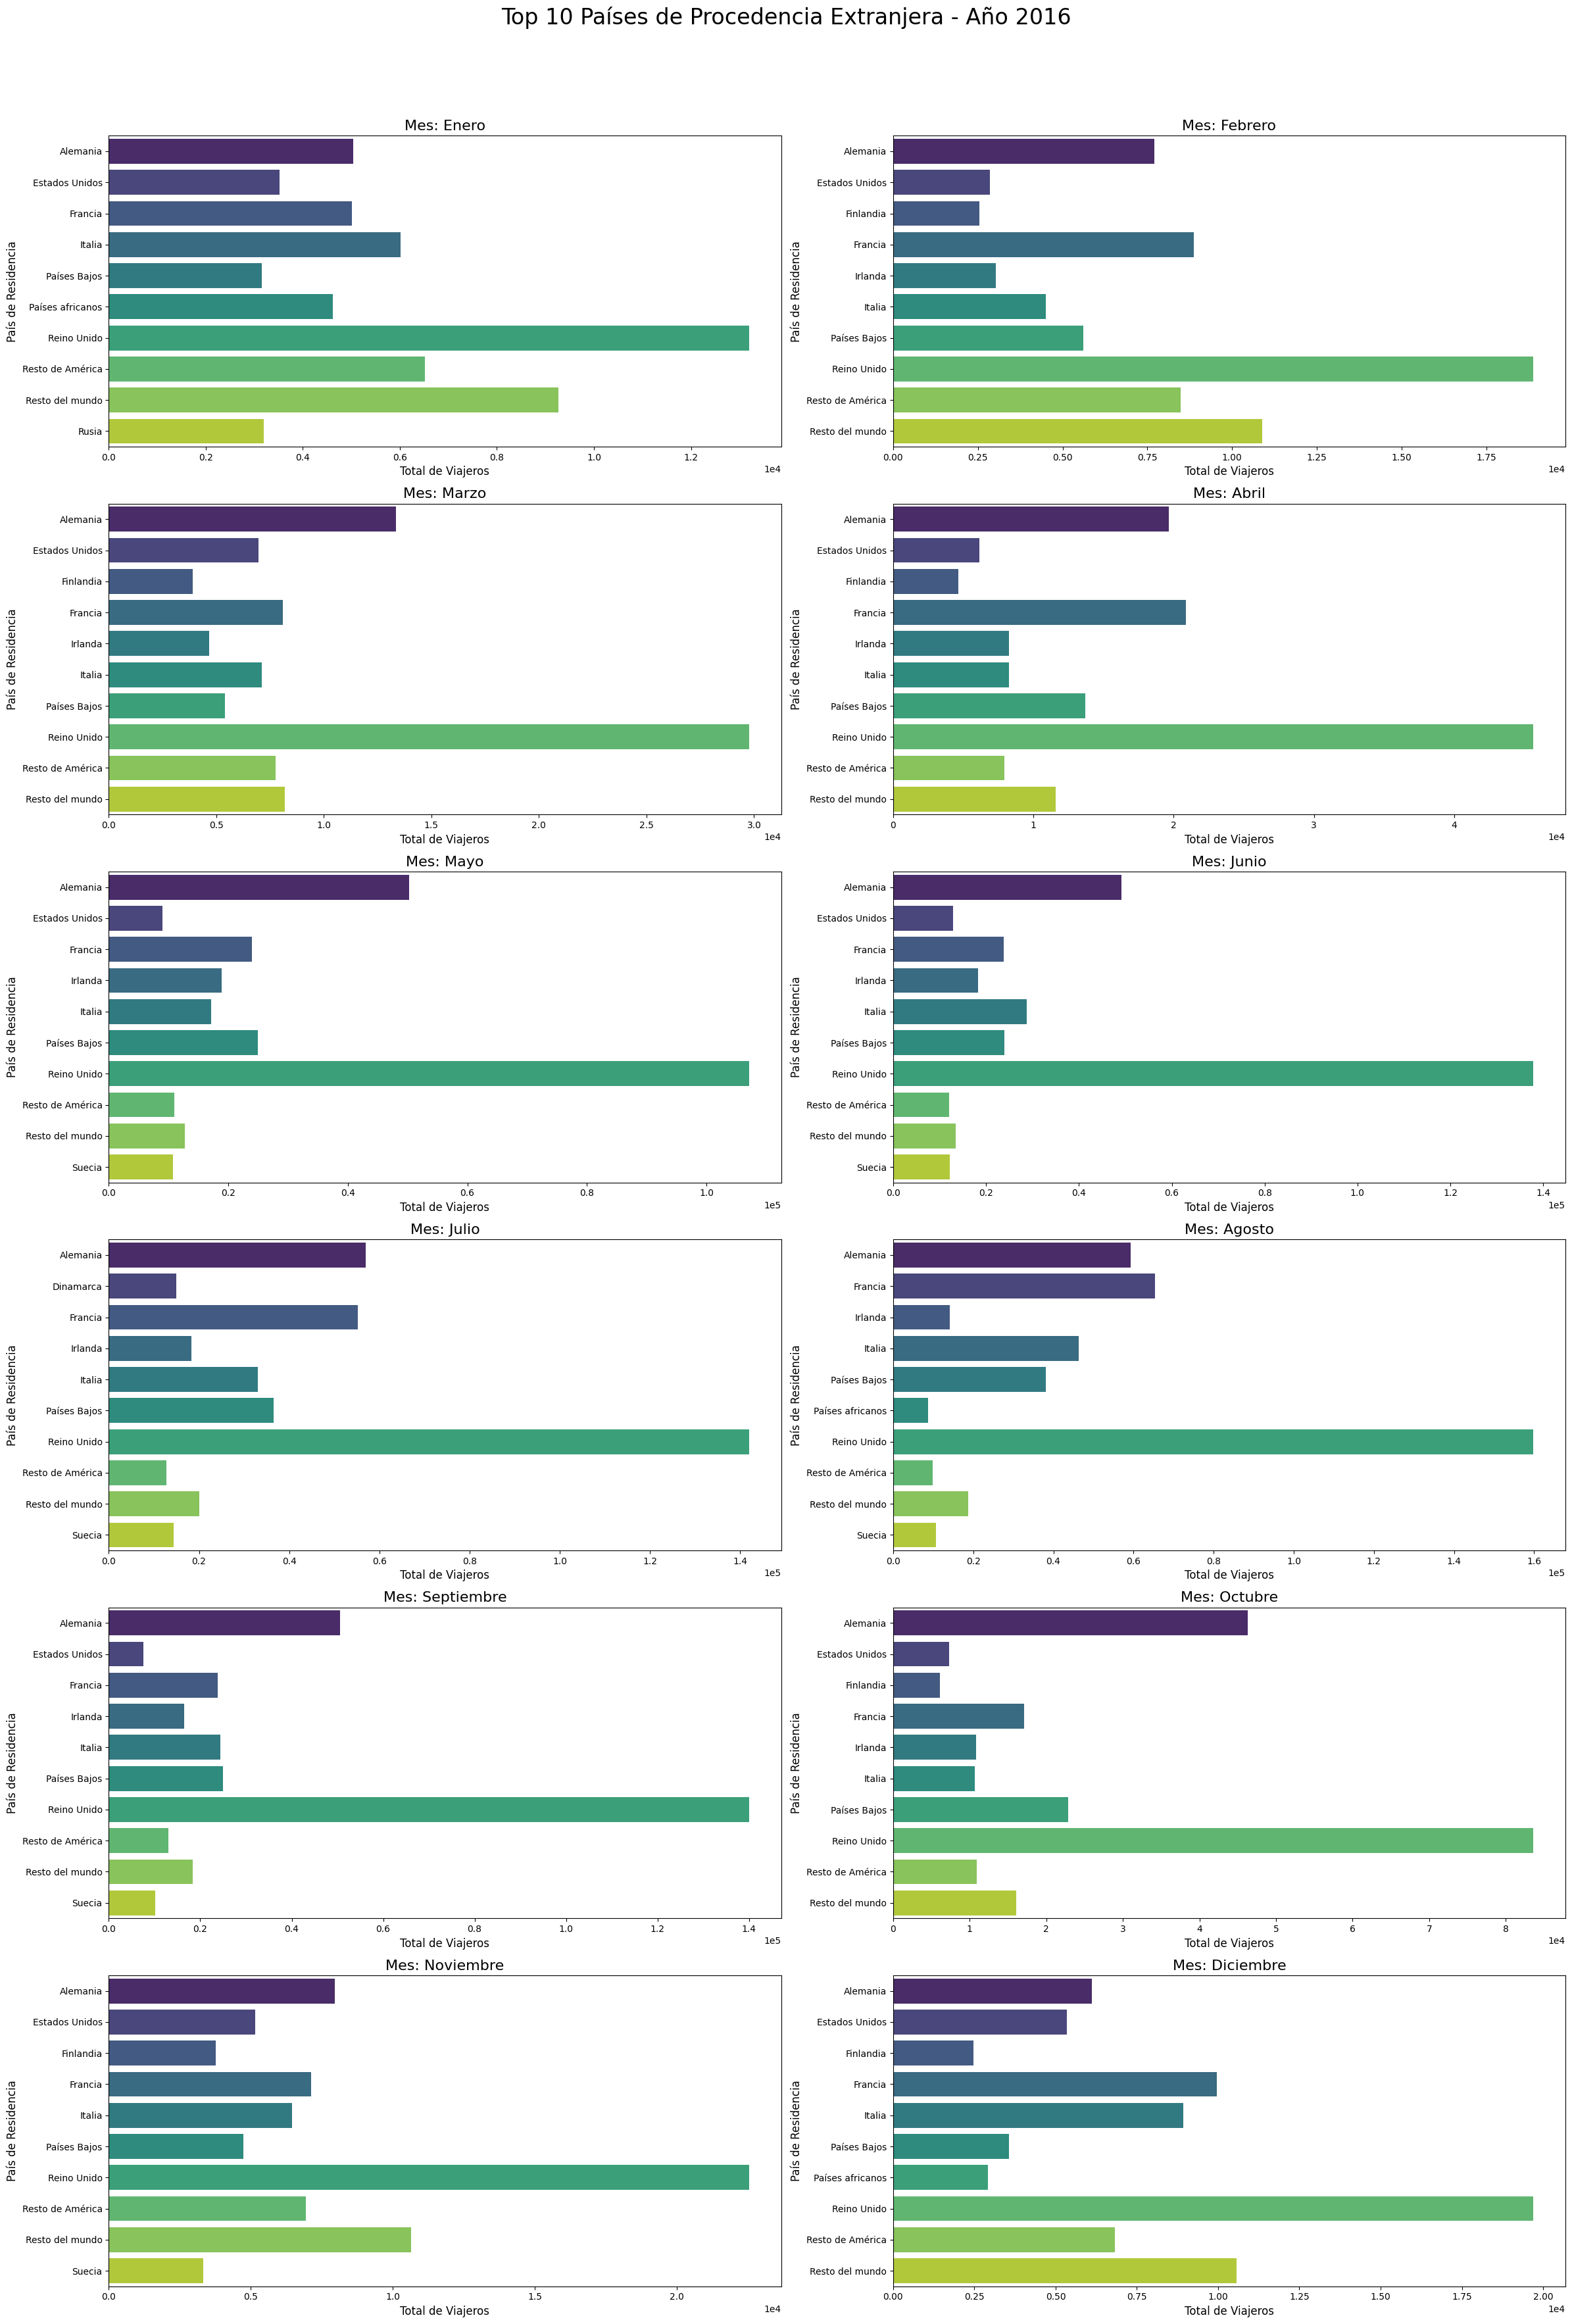

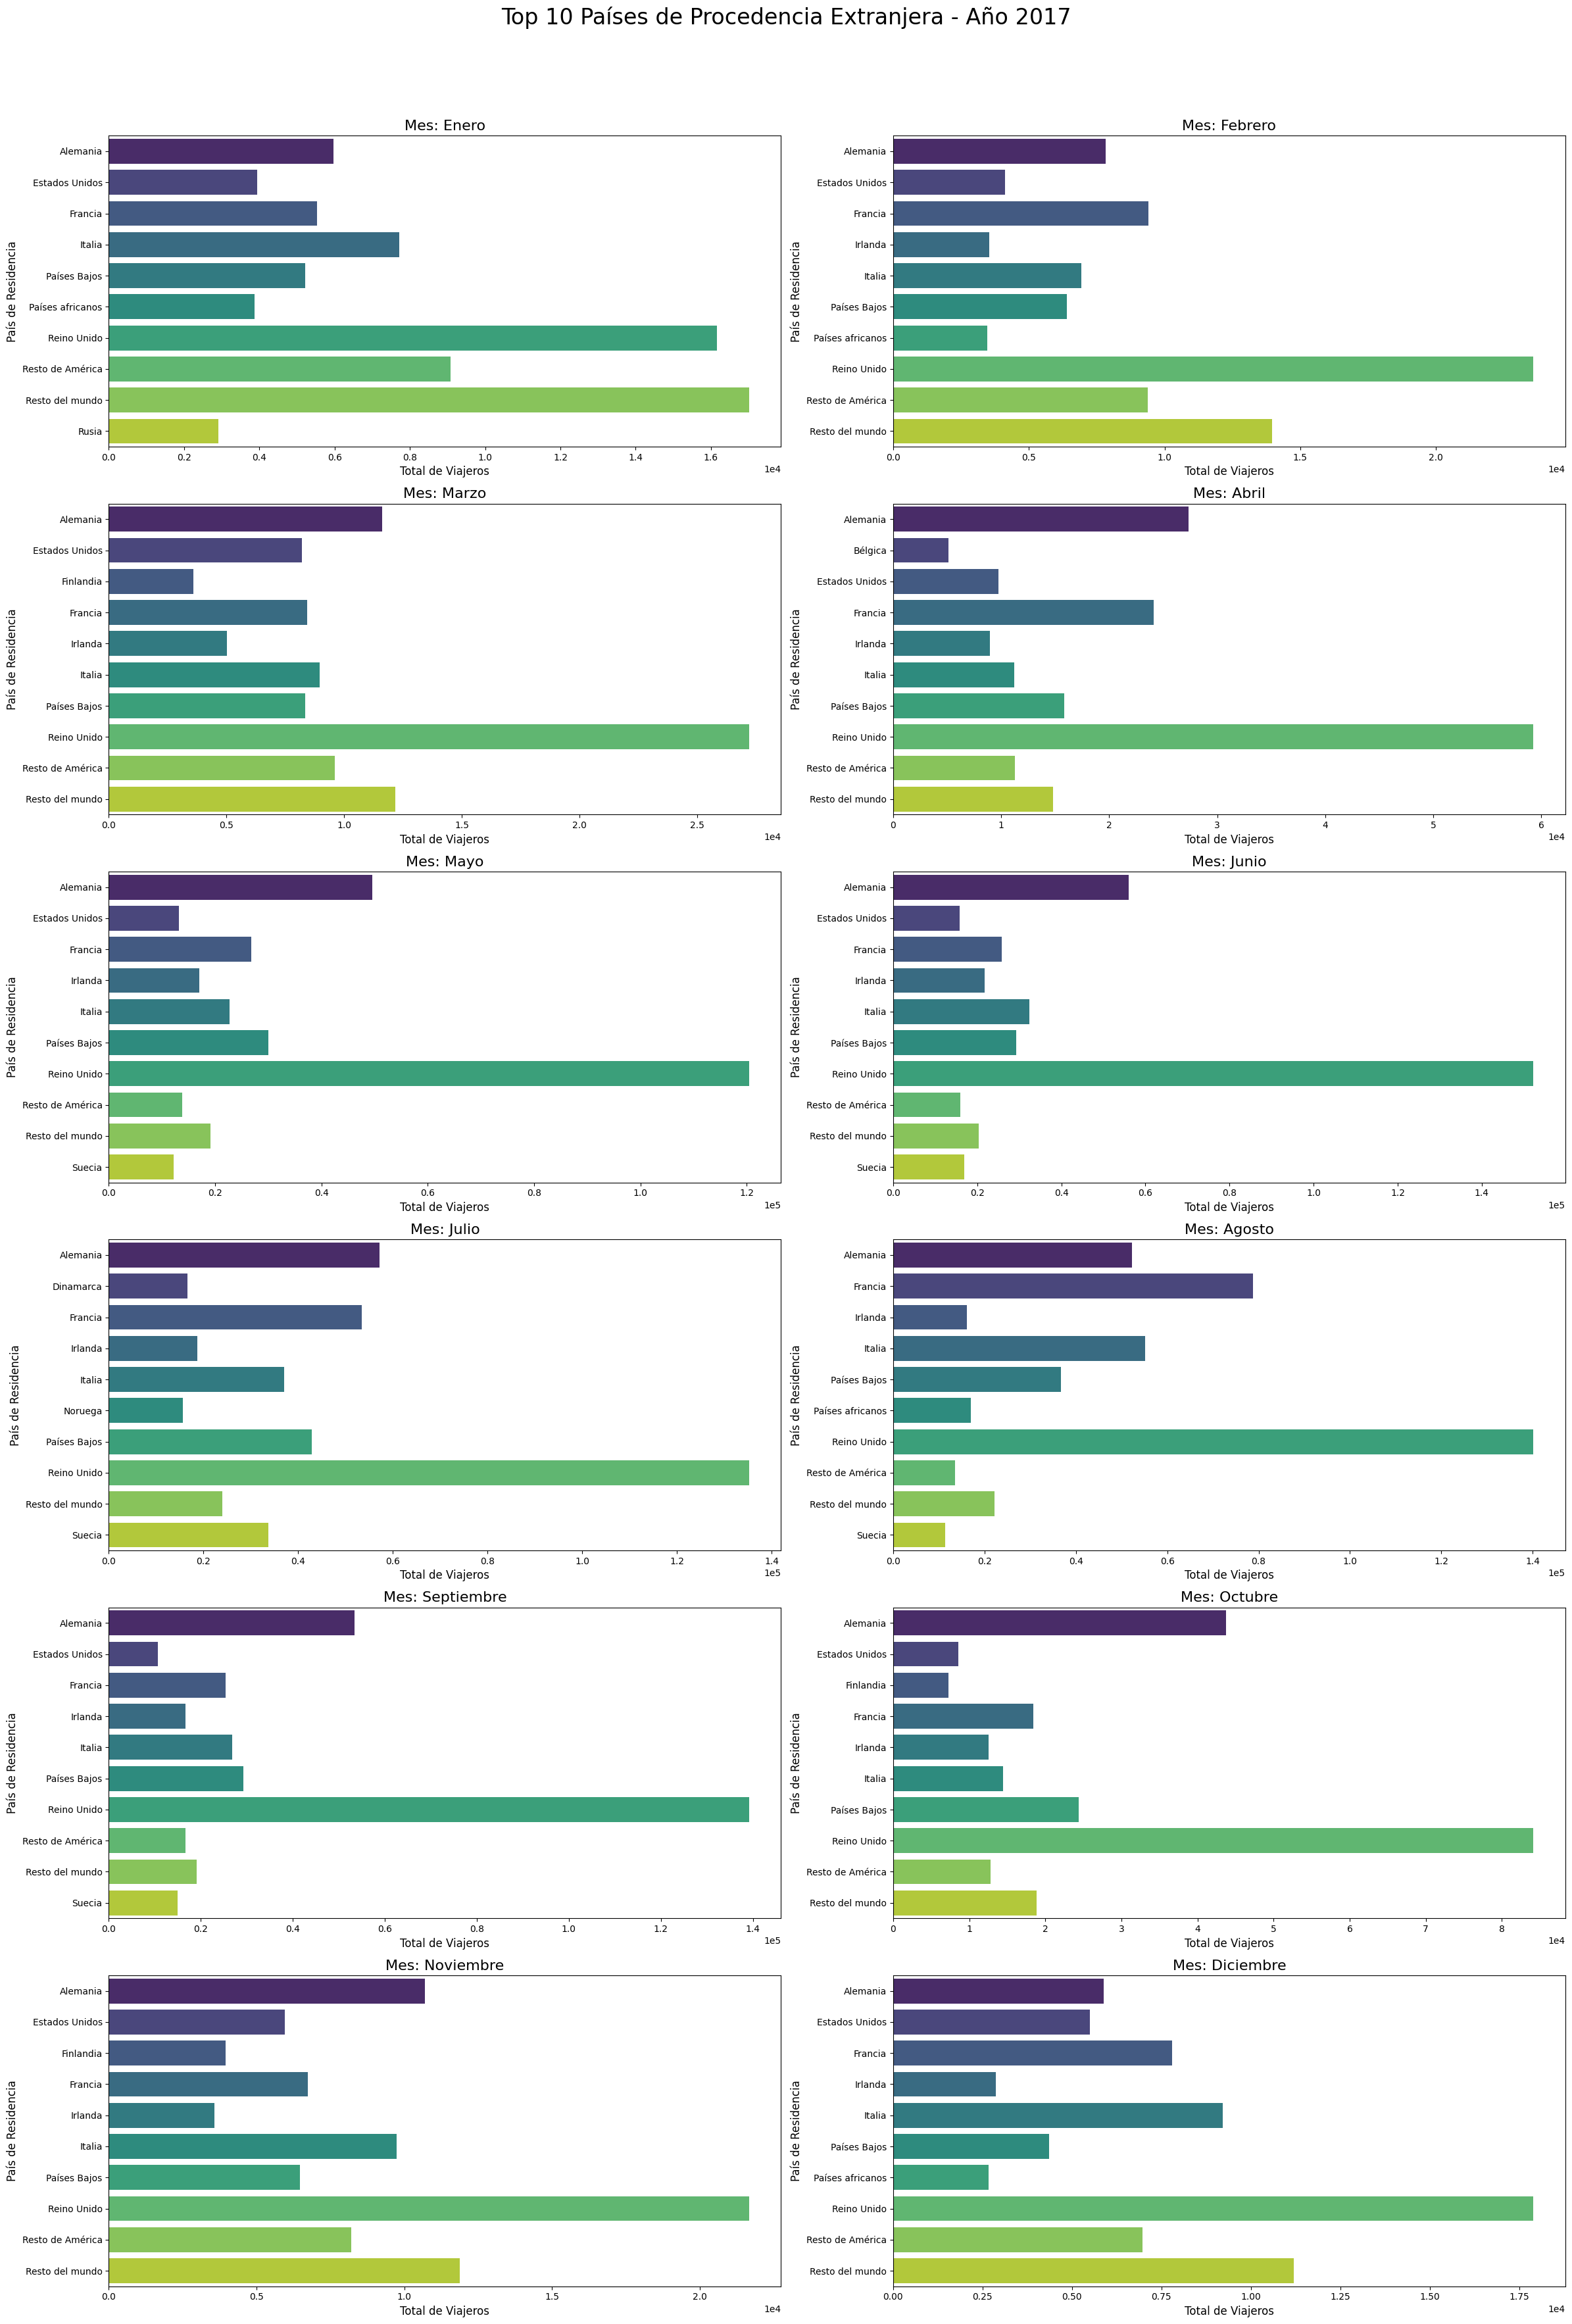

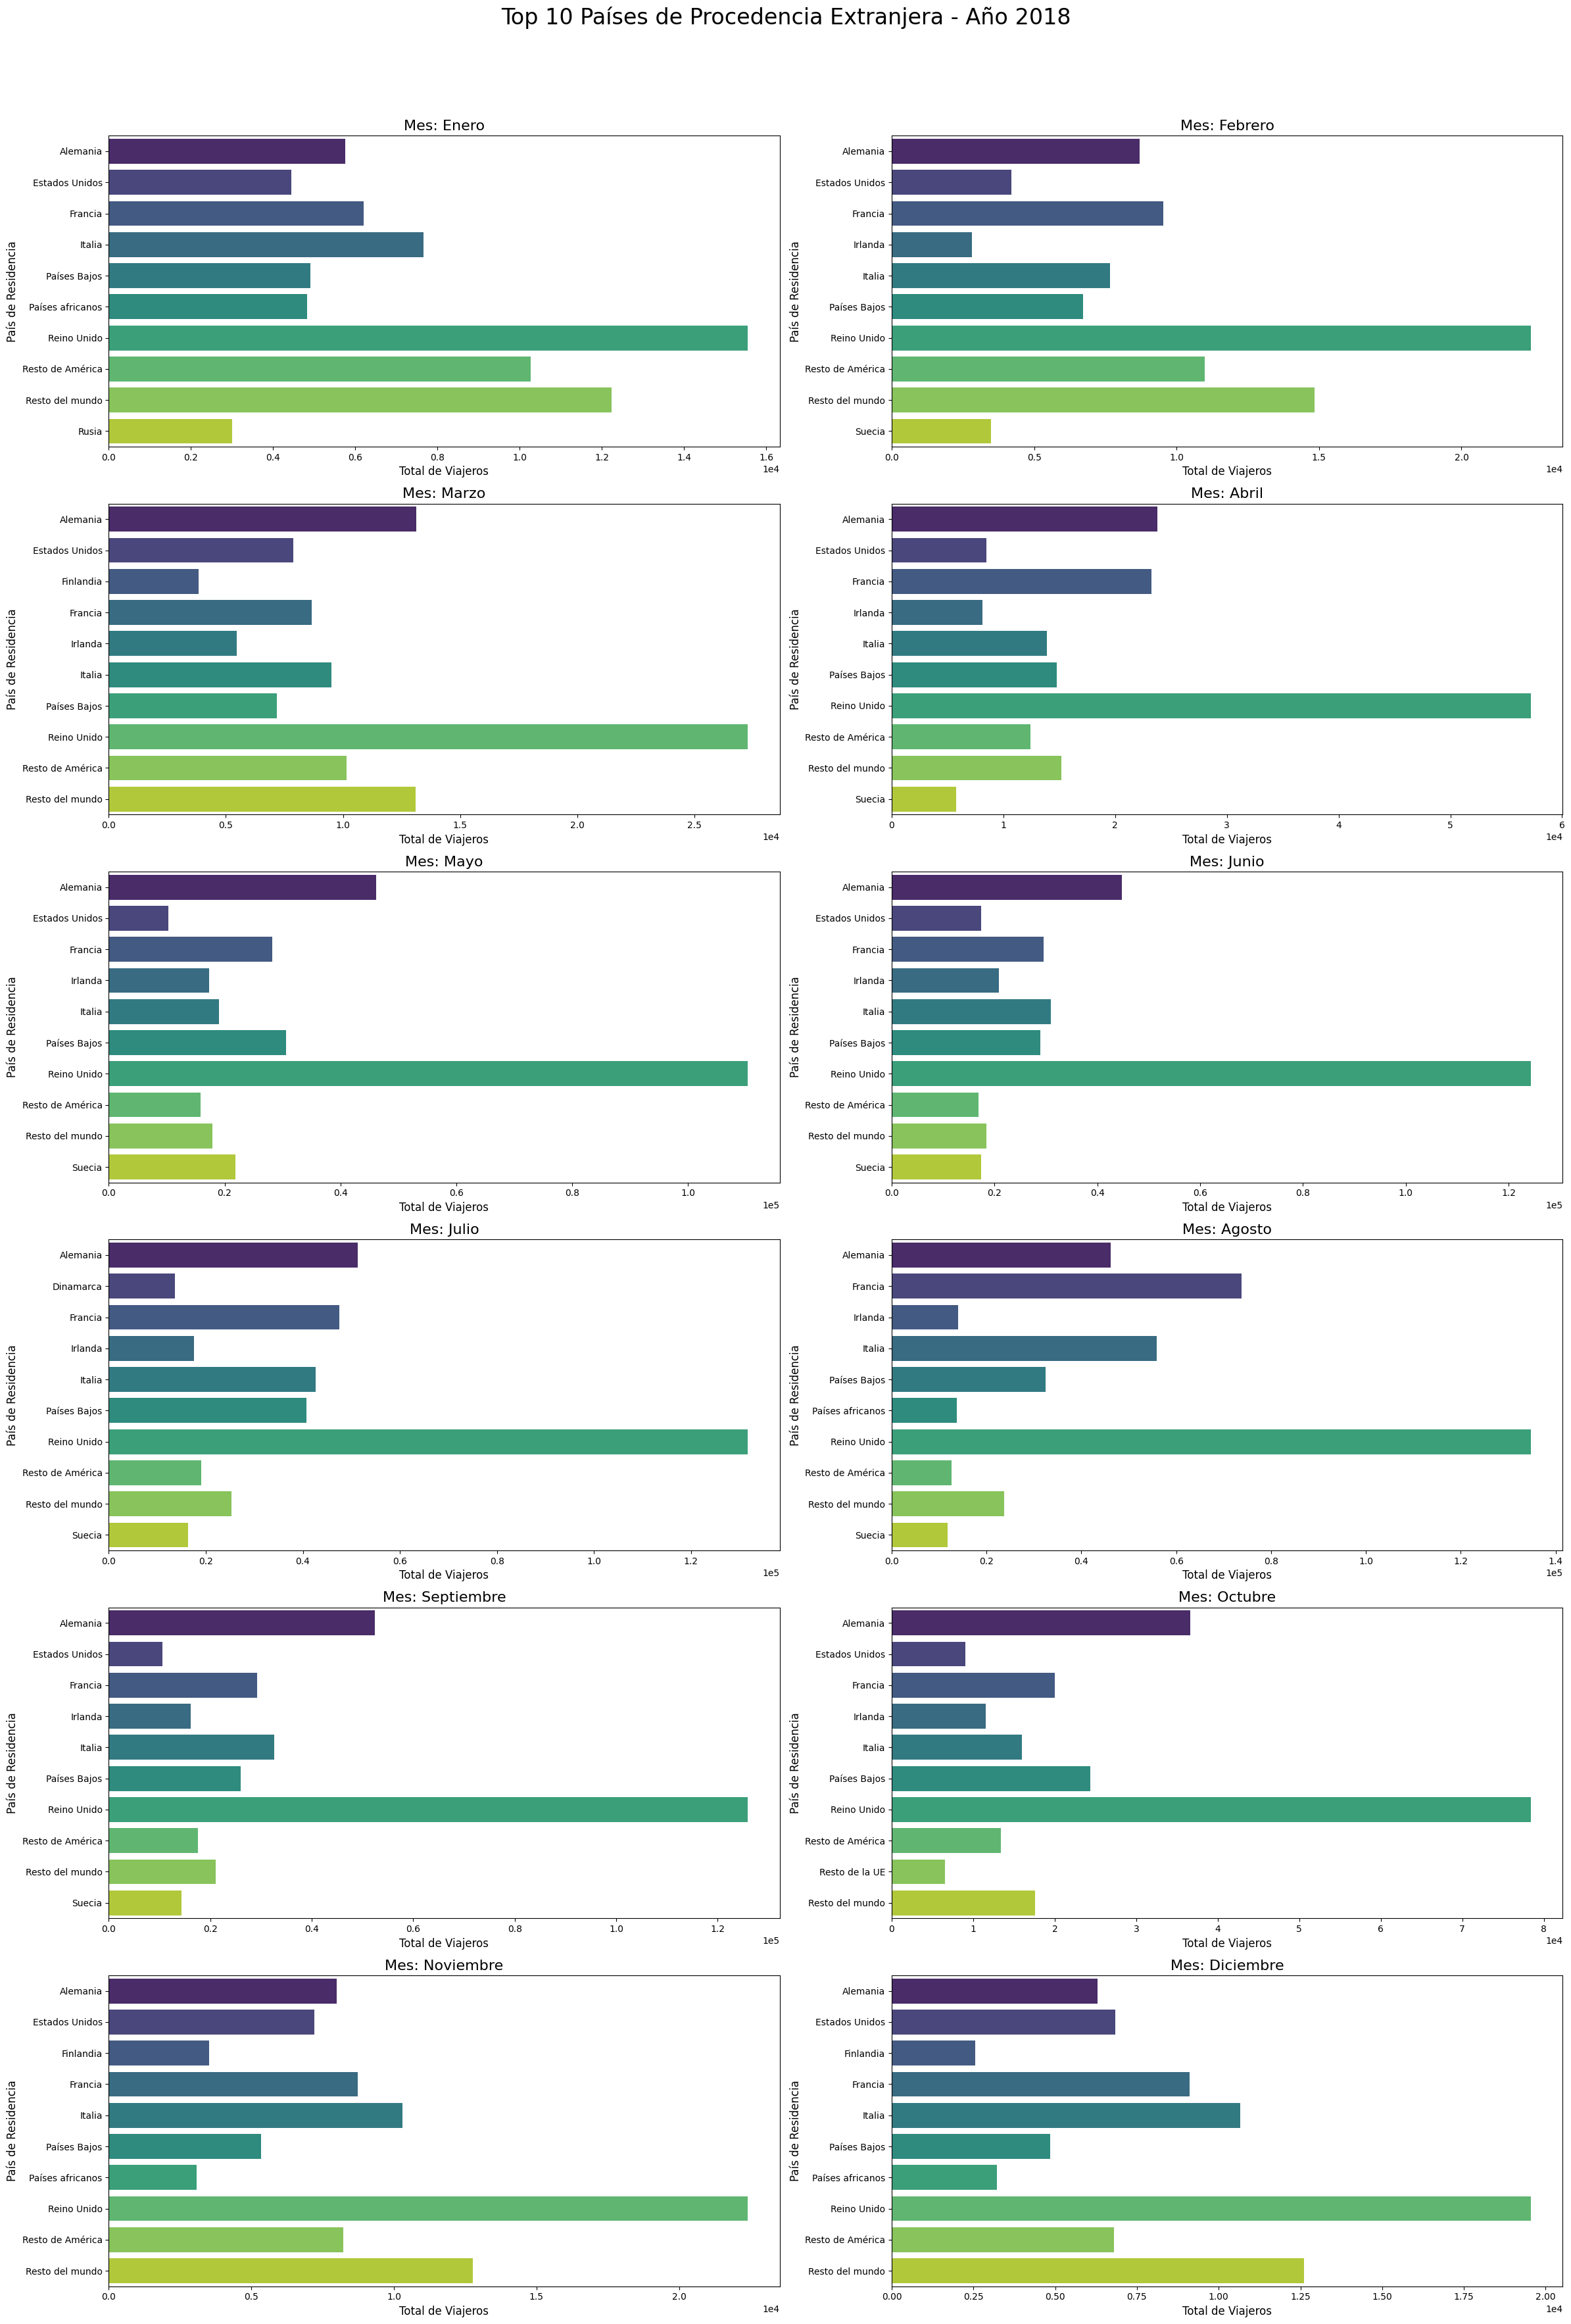

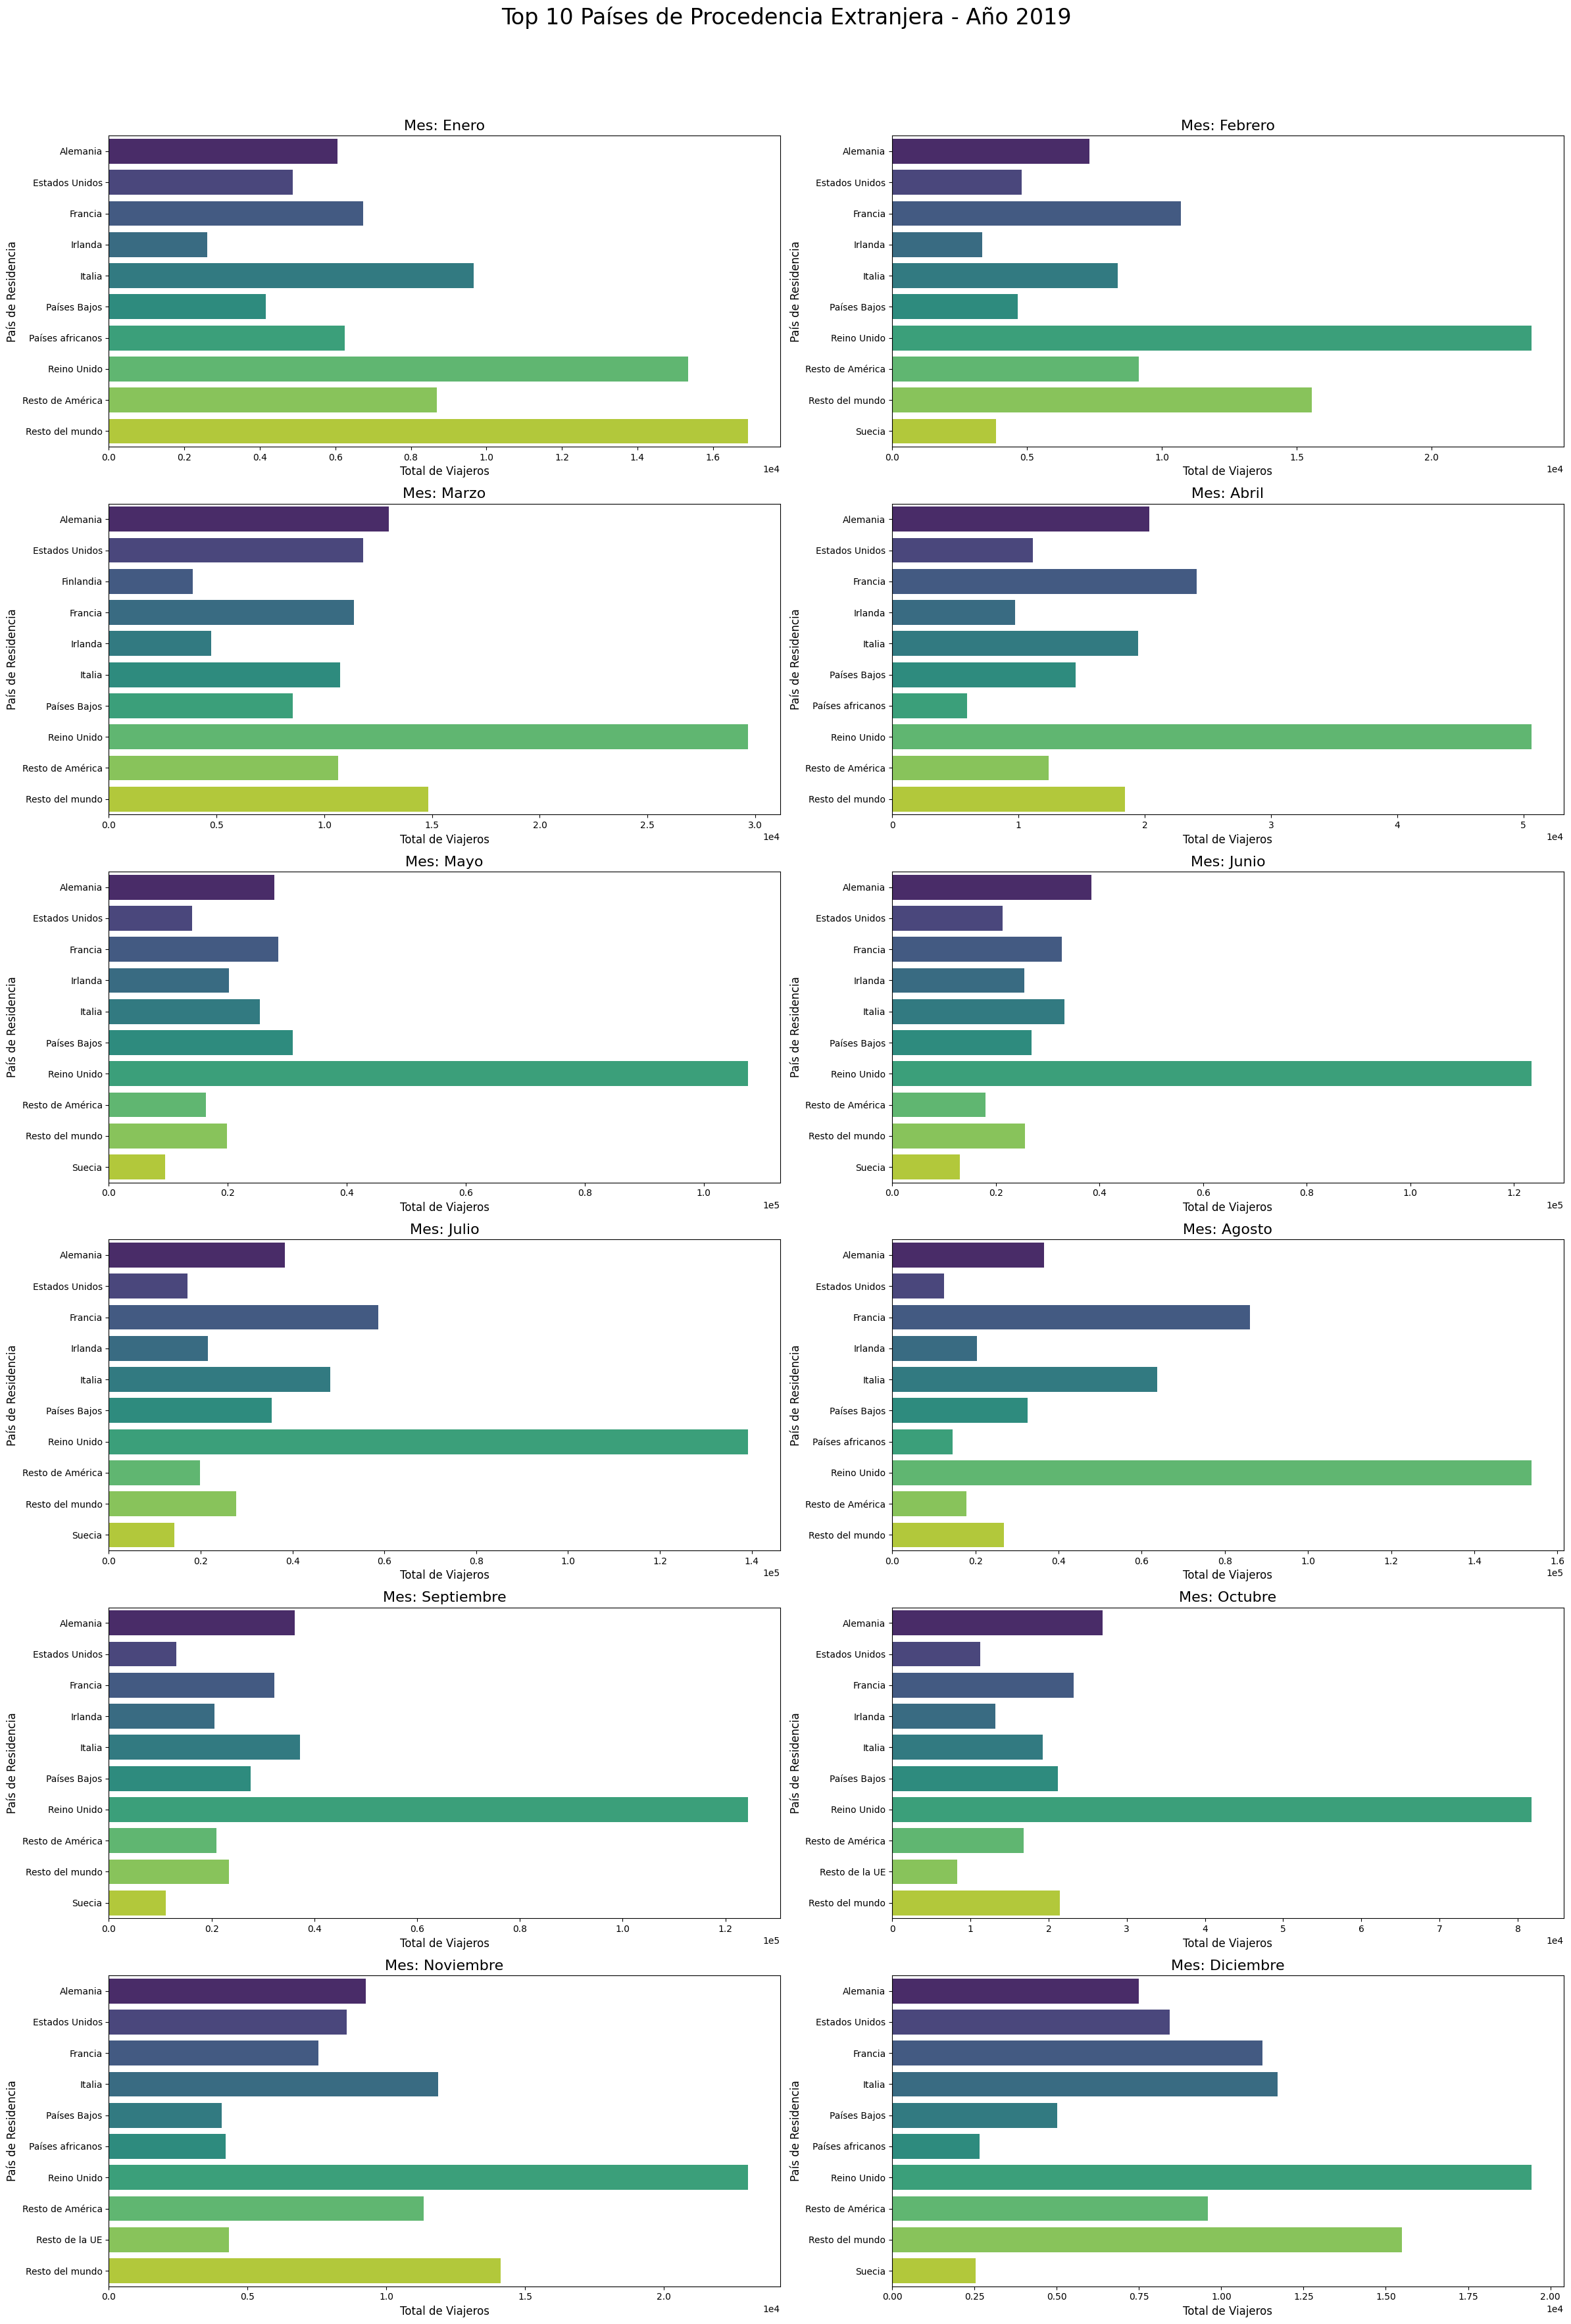

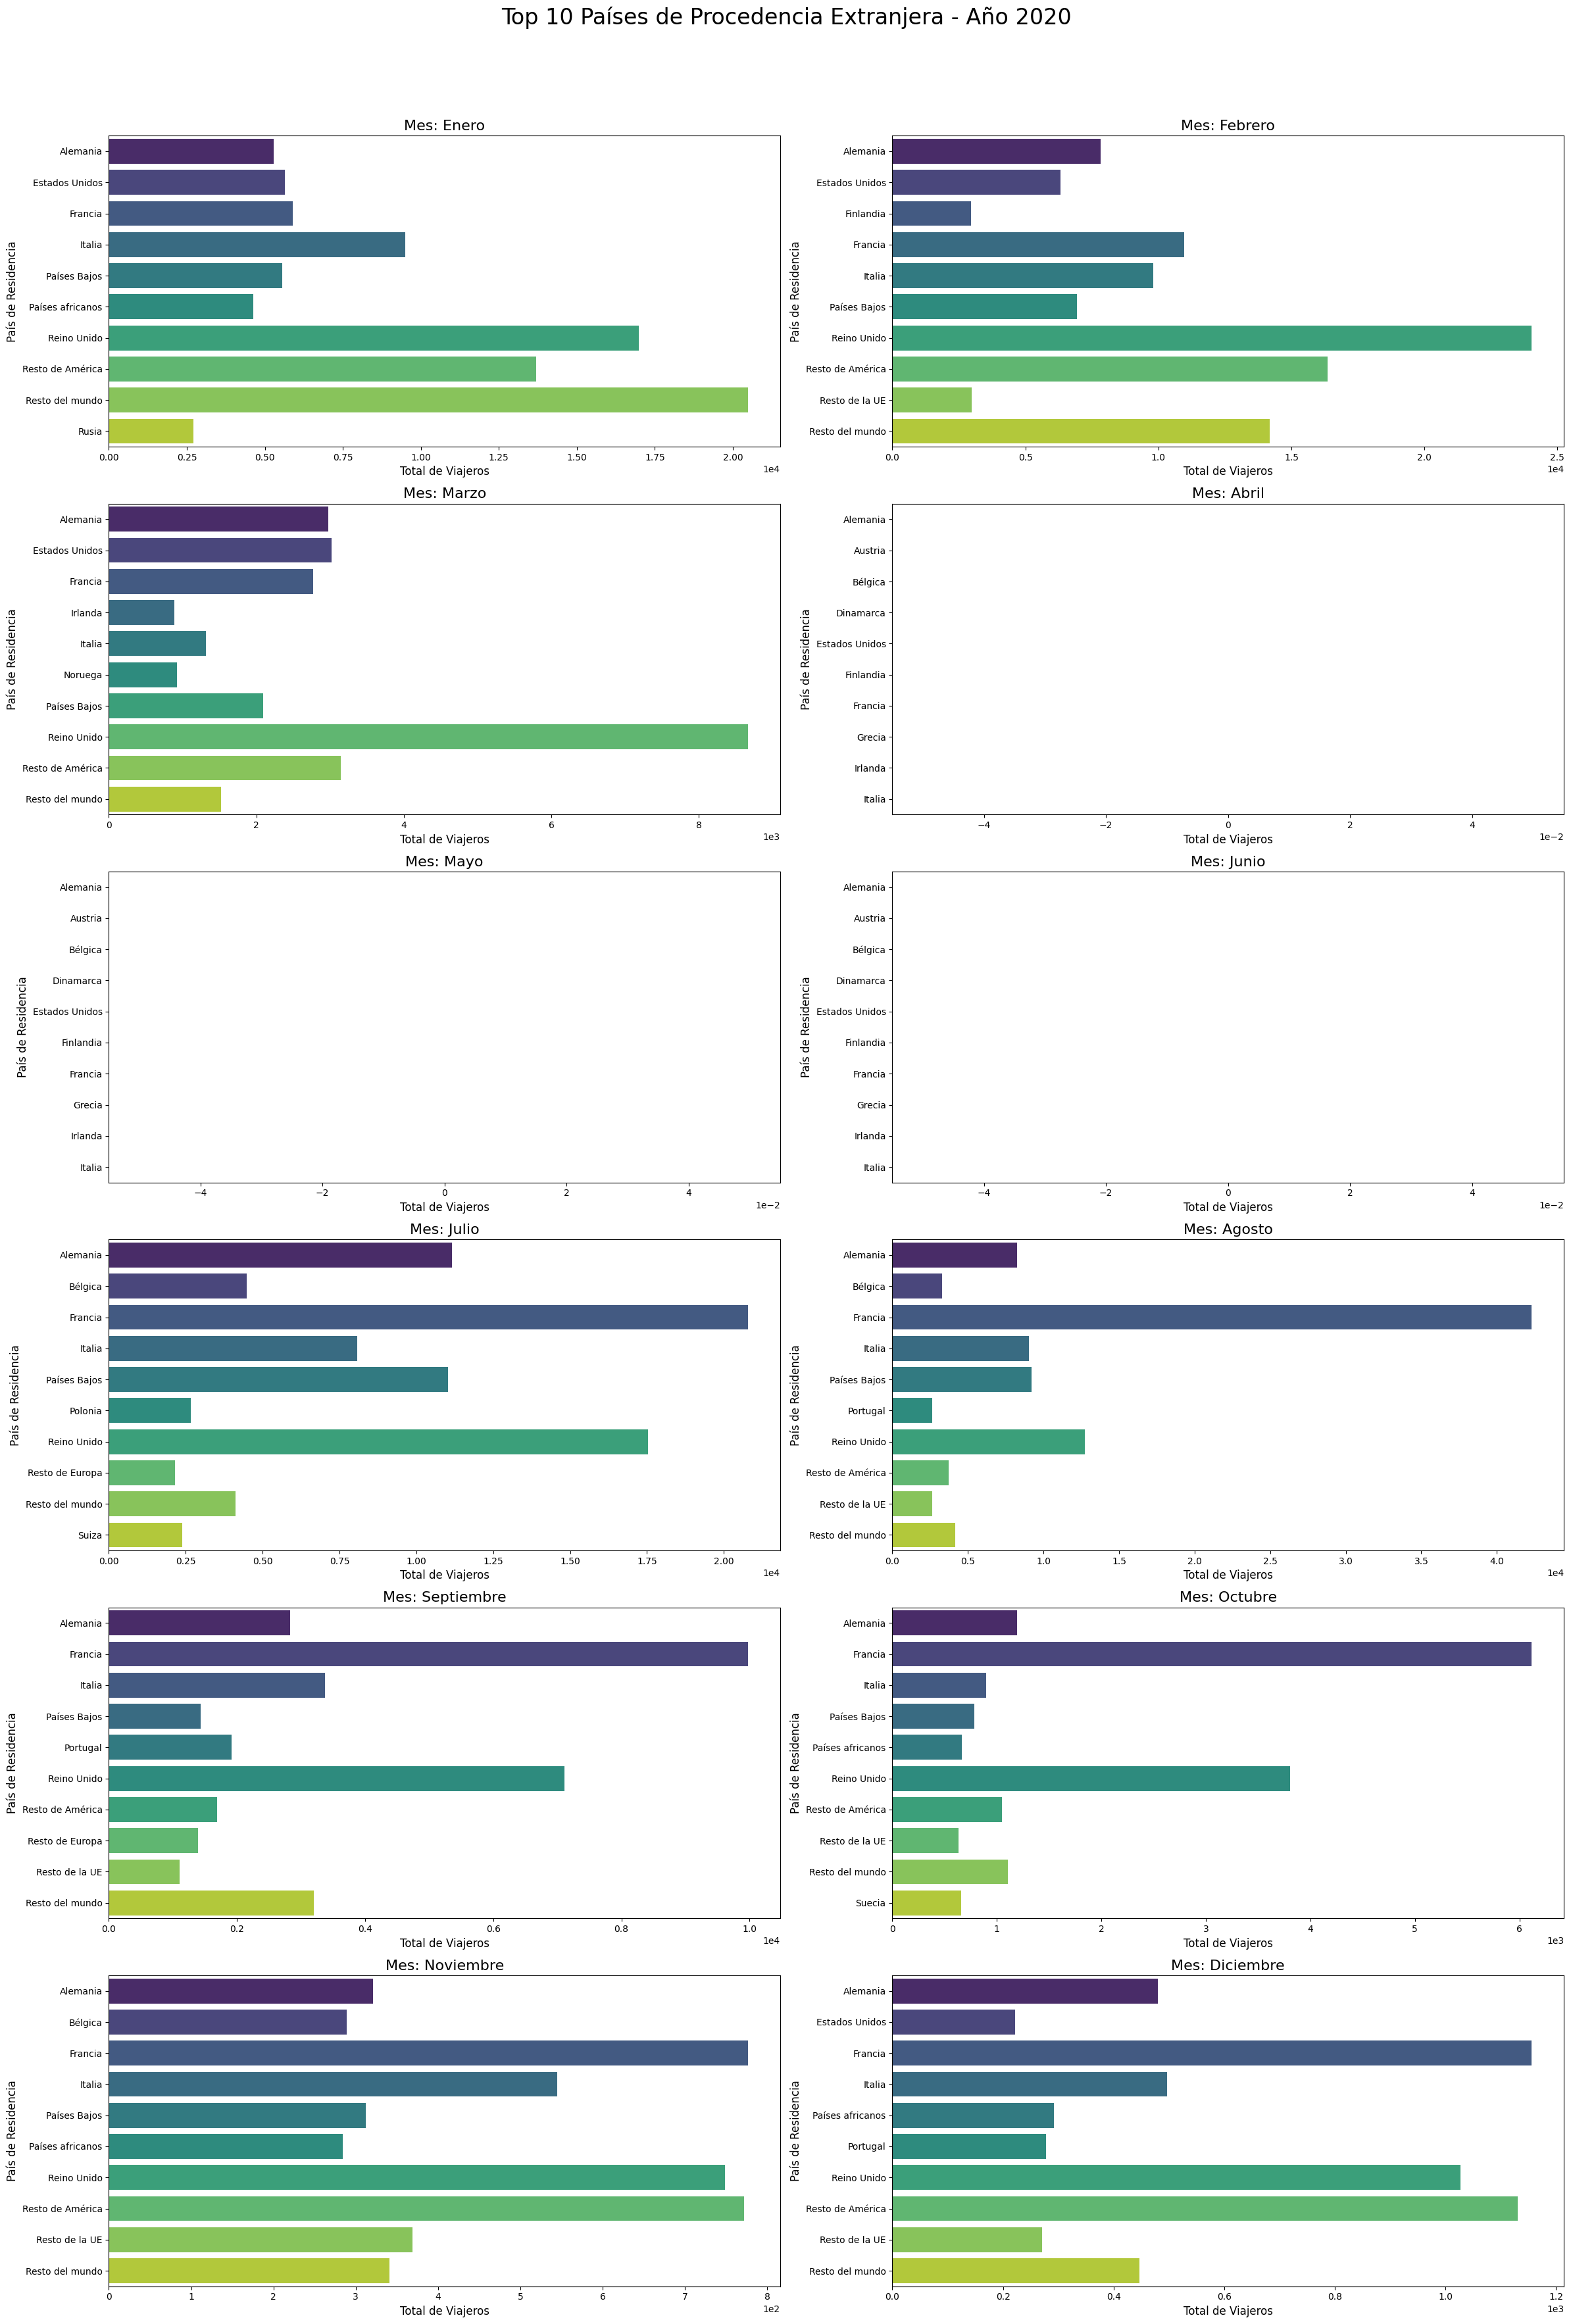

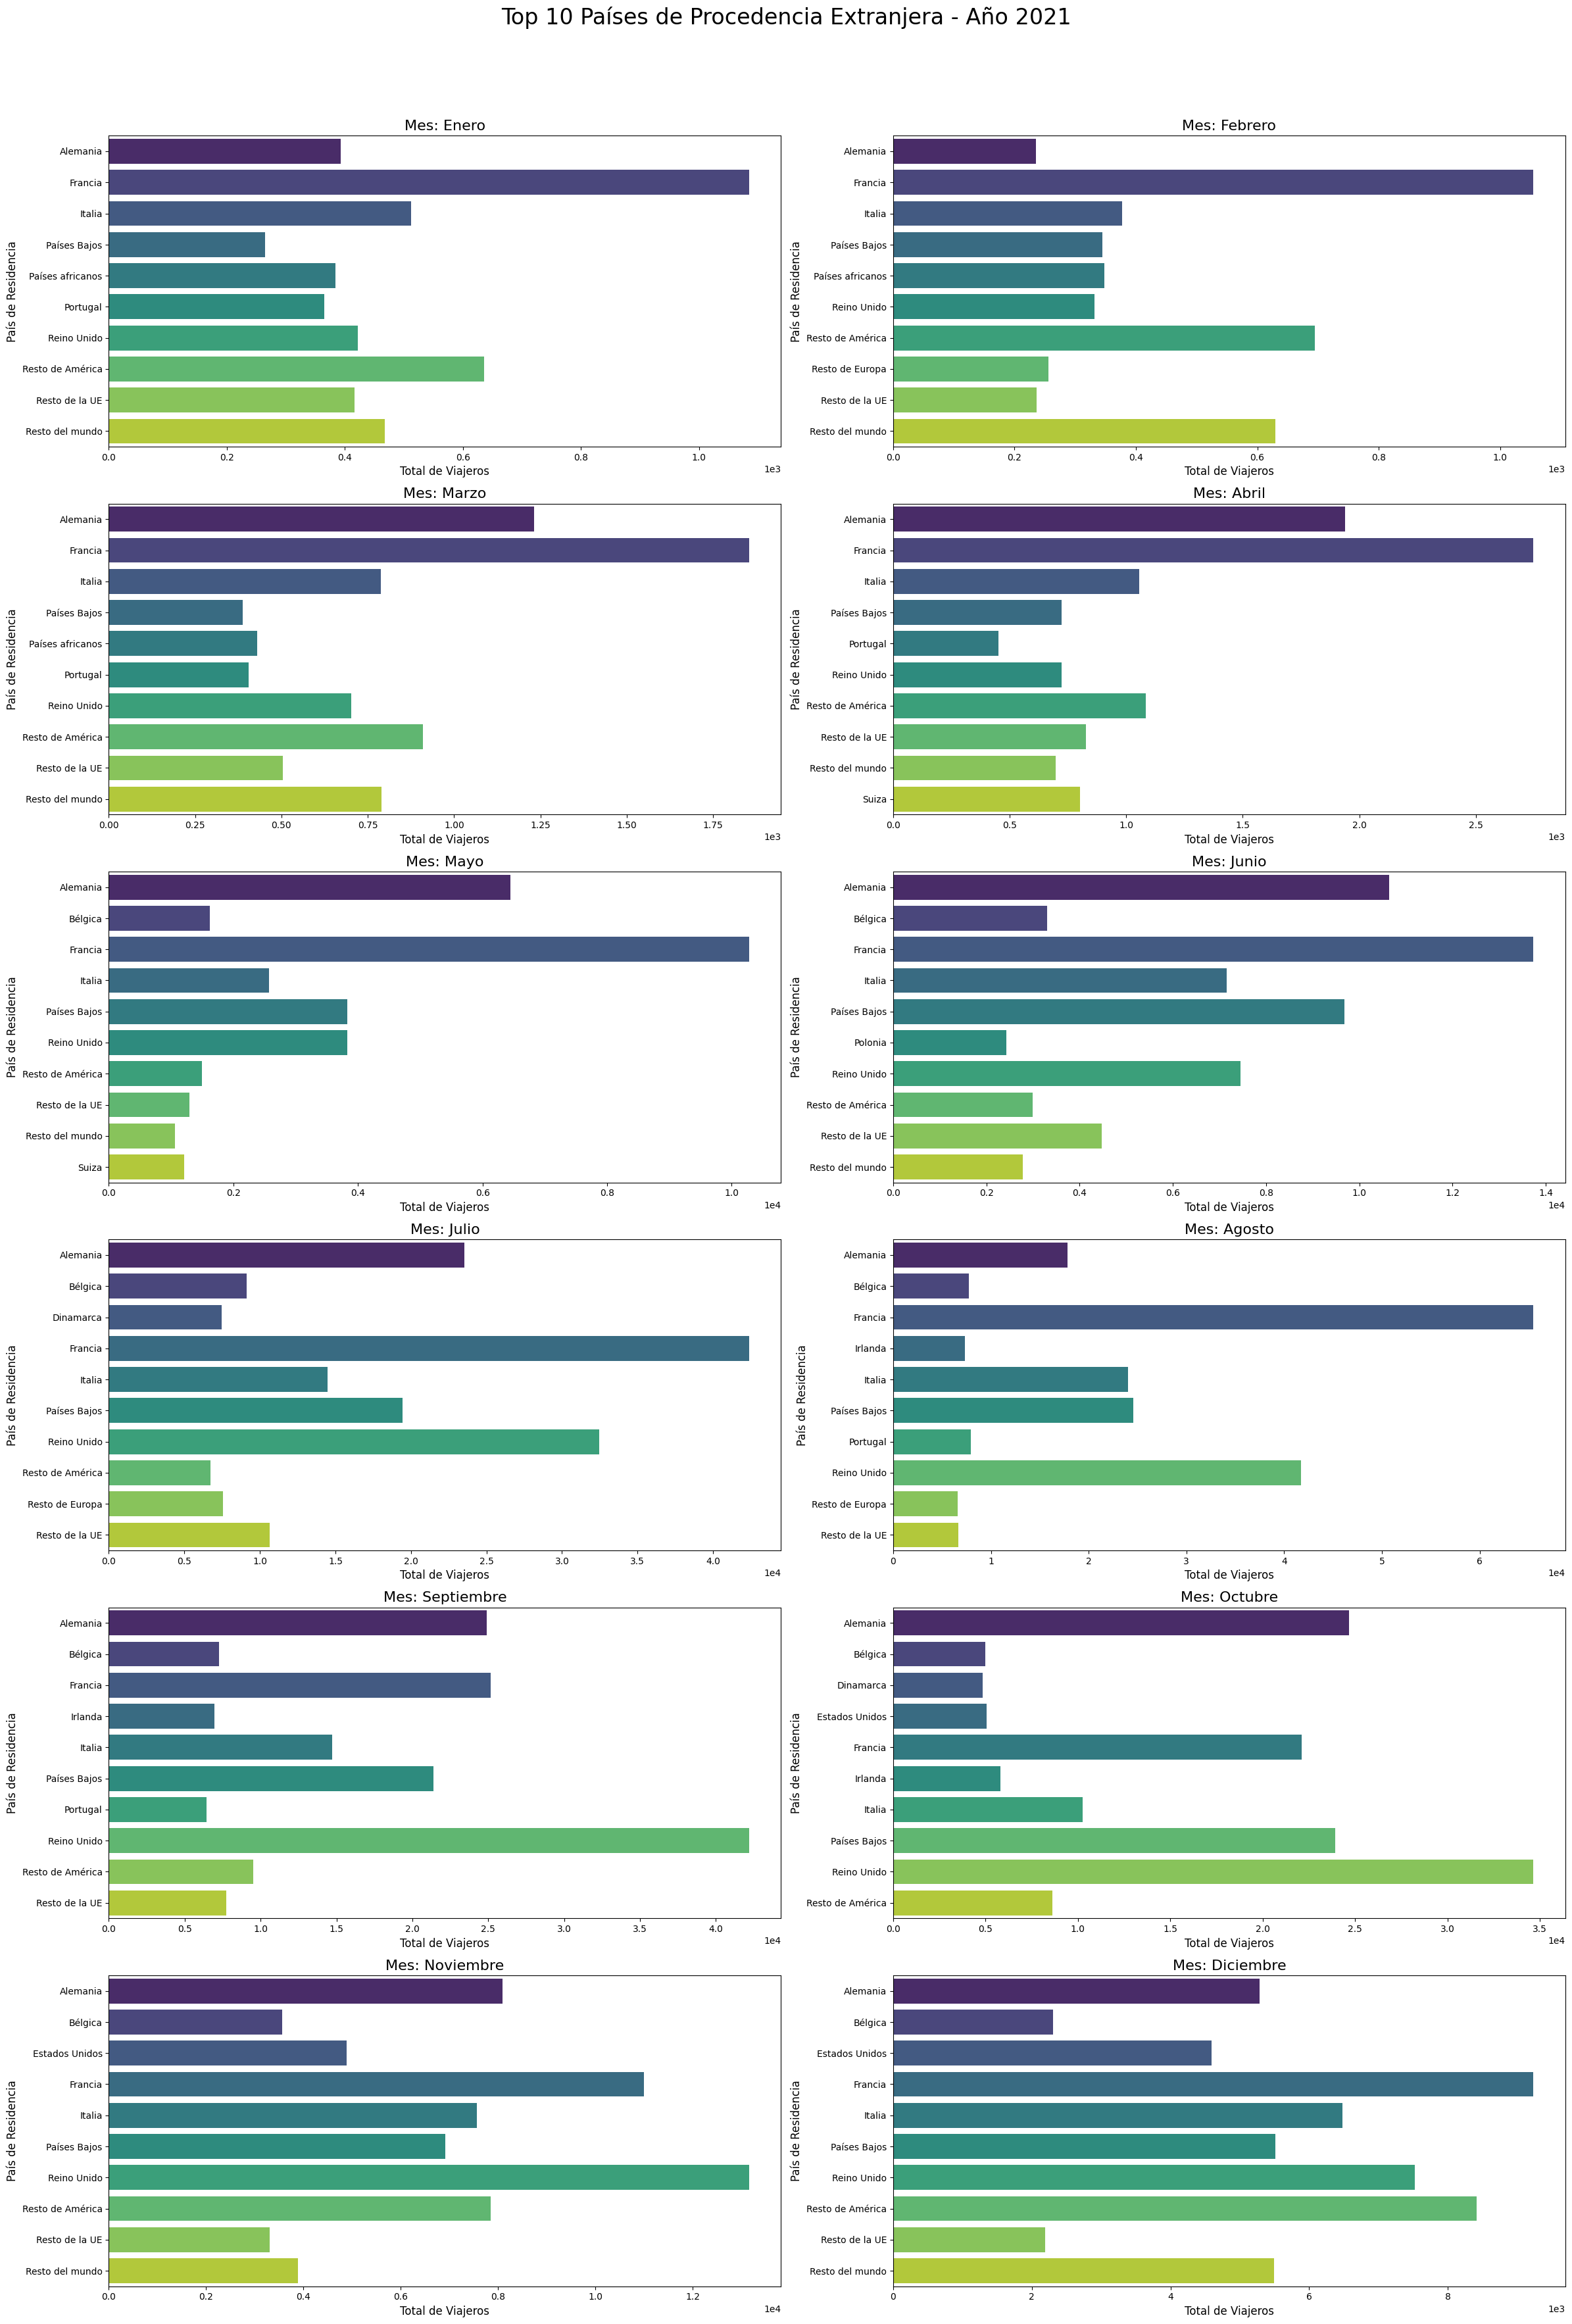

In [24]:
# --- 1. Preparación de Datos y Ordenación de Meses ---

# Definir el orden correcto de los meses en español
orden_meses = [
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
]

# Convertir la columna 'mes' a tipo Categórico Ordenado (necesario para la iteración)
df_paises['mes'] = pd.Categorical(
    df_paises['mes'], 
    categories=orden_meses, 
    ordered=True
)

# Agrupación base: Suma de viajeros por Año, Mes y País
df_top_base = df_paises.groupby(['año', 'mes', 'pais_residencia'])['total_viajeros'].sum().reset_index()

# Obtener la lista de años y meses para iterar
años_unicos = sorted(df_top_base['año'].unique())
meses_unicos = df_top_base['mes'].cat.categories # Usa el orden categórico

# --- 2. Generación de Gráficos (Bucle Anidado) ---

for año in años_unicos:
    # 2.1 Filtrar el DataFrame por el año actual
    df_anual = df_top_base[
        (df_top_base['año'] == año) & 
        (df_top_base['pais_residencia'] != 'España') # Excluir España
    ].copy()

    # 2.2 Crear una figura para todos los meses de este año (Estructura 2 columnas)
    
    # Calcular el número de filas necesarias
    ncols = 2
    n_meses = len(meses_unicos)
    nrows = math.ceil(n_meses / ncols) # math.ceil debe estar importado si no lo está

    fig, axes = plt.subplots(
        nrows=nrows, 
        ncols=ncols, 
        figsize=(12 * ncols, 6 * nrows), # Tamaño grande para legibilidad
        sharex=False # No comparten el eje X para que cada gráfico se adapte a sus 10 países
    )
    plt.suptitle(f'Top 10 Países de Procedencia Extranjera - Año {año}', fontsize=24, y=1.01)

    # Aplanar los ejes para facilitar la iteración
    axes = axes.flatten()
    
    for i, mes in enumerate(meses_unicos):
        # 2.3 Filtrar por el mes actual
        df_mensual = df_anual[df_anual['mes'] == mes].copy()
        
        # 2.4 Obtener el Top 10 para este mes y año
        top_10_paises = df_mensual.groupby('pais_residencia')['total_viajeros'].sum().nlargest(10).index
        df_top_10 = df_mensual[df_mensual['pais_residencia'].isin(top_10_paises)]

        # 2.5 Dibujar el gráfico de barras
        ax = axes[i]
        sns.barplot(
            ax=ax, 
            data=df_top_10, 
            x='total_viajeros', # Colocamos el valor en el eje X para barras horizontales (mejor para nombres largos)
            y='pais_residencia', 
            palette='viridis'
        )
        
        ax.set_title(f'Mes: {mes}', fontsize=16)
        ax.set_xlabel('Total de Viajeros', fontsize=12)
        ax.set_ylabel('País de Residencia', fontsize=12)
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # Formato científico
    
    # 2.6 Ocultar ejes sobrantes
    for j in range(n_meses, nrows * ncols):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    plt.show() # Muestra la figura completa para este año